# Repeating Data Wrangling process on all NE counties 2017-2019
* Adding 2017-2019 for NE

Repeat Data_Wrangling process on all NE counties

# Data wrangling: pollution in one state
Plan to explore a single state and then venture out to work on regions
# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

from IPython.core.display import display

# pd.set_option('max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

# Load data and constants

In [2]:
MA, CT, ME, NY, NH, NJ, PA, VT, DE, MD  = [25, 9, 23, 36, 33, 34, 42, 50, 10 , 24]
NORTH_EAST = [MA, CT, ME, NY, NH, NJ, PA, VT, DE, MD]

daily_aqi_by_county_2017 = pd.read_csv('../../data/raw/daily_aqi_by_county_2017.csv')
daily_aqi_by_county_2018 = pd.read_csv('../../data/raw/daily_aqi_by_county_2018.csv')
daily_aqi_by_county_2019 = pd.read_csv('../../data/raw/daily_aqi_by_county_2019.csv')

county_demographic = pd.read_csv('../../data/raw/county_cc-est2019-alldata.csv', encoding='latin-1')


def remove_col(df, col_name):
    '''Returns a dataframe with removed column or columns from old dataframe'''
    new_df = df.copy()

    if(type(col_name) != str and len(col_name) > 1):
        for index in col_name:
            new_df = new_df.drop(str(index), axis=1)
    else:
        new_df = new_df.drop(str(col_name), axis=1)
    return new_df

# Explore and clean aqi by county dataset

In [3]:
# work with one state NE 2019

print(daily_aqi_by_county_2019.columns)

daily_aqi_by_county_2017_2019 = pd.concat([daily_aqi_by_county_2017, daily_aqi_by_county_2018, daily_aqi_by_county_2019], axis=0)

def get_NE_States(df, col):
    '''Method used to return North Eastern US states'''
    NE_States = (df[col] == MA) | \
                (df[col] == CT) | \
                (df[col] == ME) | \
                (df[col] == NY) | \
                (df[col] == NH) | \
                (df[col] == NJ) | \
                (df[col] == PA) | \
                (df[col] == VT) | \
                (df[col] == DE) | \
                (df[col] == MD)
    return NE_States
NE_States_17 = get_NE_States(daily_aqi_by_county_2017, 'State Code')
NE_States_18 = get_NE_States(daily_aqi_by_county_2018, 'State Code')
NE_States_19 = get_NE_States(daily_aqi_by_county_2019, 'State Code')

NE_State_17_19 = get_NE_States(daily_aqi_by_county_2017_2019, 'State Code')

NE_aqi_2017 = daily_aqi_by_county_2017.loc[NE_States_17]
NE_aqi_2018 = daily_aqi_by_county_2018.loc[NE_States_18]
NE_aqi_2019 = daily_aqi_by_county_2019.loc[NE_States_19]

NE_aqi_2017_2019 = daily_aqi_by_county_2017_2019.loc[NE_State_17_19]
display(NE_aqi_2019)

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')


State Name county Name  State Code  County Code        Date  AQI  \
42469   Connecticut   Fairfield           9            1  2019-01-01   20   
42470   Connecticut   Fairfield           9            1  2019-01-02   31   
42471   Connecticut   Fairfield           9            1  2019-01-03   38   
42472   Connecticut   Fairfield           9            1  2019-01-04   55   
42473   Connecticut   Fairfield           9            1  2019-01-05   52   
...             ...         ...         ...          ...         ...  ...   
301885      Vermont     Windham          50           25  2019-12-14    0   
301886      Vermont     Windham          50           25  2019-12-17    3   
301887      Vermont     Windham          50           25  2019-12-20    5   
301888      Vermont     Windham          50           25  2019-12-23   18   
301889      Vermont     Windham          50           25  2019-12-29   10   

        Category Defining Parameter Defining Site  Number of Sites Reporting  
42469       Good              PM2.5   09-001-1123                          3  
42470       Good              PM2.5   09-001-1123                          3  
42471       Good              PM2.5   09-001-1123                          3  
42472   Moderate              PM2.5   09-001-0010                          3  
42473   Moderate              PM2.5   09-001-1123                          3  
...          ...                ...           ...                        ...  
301885      Good              PM2.5   50-025-9000                          1  
301886      Good              PM2.5   50-025-9000                          1  
301887      Good              PM2.5   50-025-9000                          1  
301888      Good              PM2.5   50-025-9000                          1  
301889      Good              PM2.5   50-025-9000                          1  

[51802 rows x 10 columns]

         State Code   County Code           AQI  Number of Sites Reporting
count  51508.000000  51508.000000  51508.000000               51508.000000
mean      32.467539     41.027355     39.424420                   1.774385
std        9.576826     53.066923     16.414367                   1.286400
min        9.000000      1.000000      0.000000                   1.000000
25%       25.000000     11.000000     31.000000                   1.000000
50%       36.000000     25.000000     38.000000                   1.000000
75%       42.000000     63.000000     46.000000                   2.000000
max       50.000000    510.000000    200.000000                  13.000000
         State Code   County Code           AQI  Number of Sites Reporting
count  51321.000000  51321.000000  51321.000000               51321.000000
mean      32.543851     41.255022     38.278054                   1.743282
std        9.586729     53.067420     17.725987                   1.262974
min        9.000000      

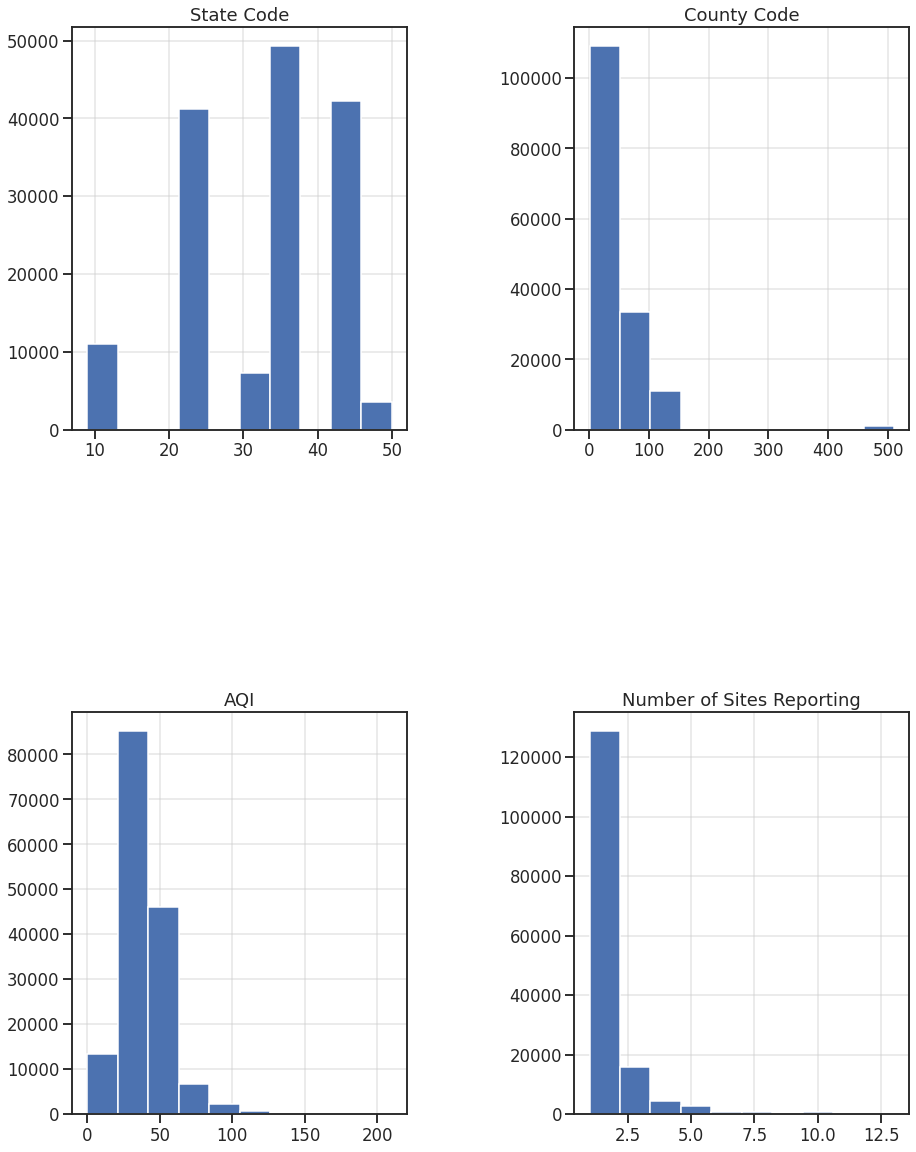

In [4]:
# klib.dist_plot(NE_aqi_2019)

print(NE_aqi_2017.describe())
print(NE_aqi_2018.describe())
print(NE_aqi_2019.describe())

print(NE_aqi_2017.isna().sum())
print(NE_aqi_2018.isna().sum())
print(NE_aqi_2019.isna().sum())

print(NE_aqi_2017_2019.isna().sum())
print(NE_aqi_2017_2019.shape)

NE_aqi_2017_2019.hist(figsize=(15,20))
plt.subplots_adjust(hspace=0.7, wspace=0.5)

* aqi of 3 years of NE seem to follow a normal distribution which is good
* number of sites reporting seem to be right skewed
* no missing values

<BarContainer object of 154631 artists>

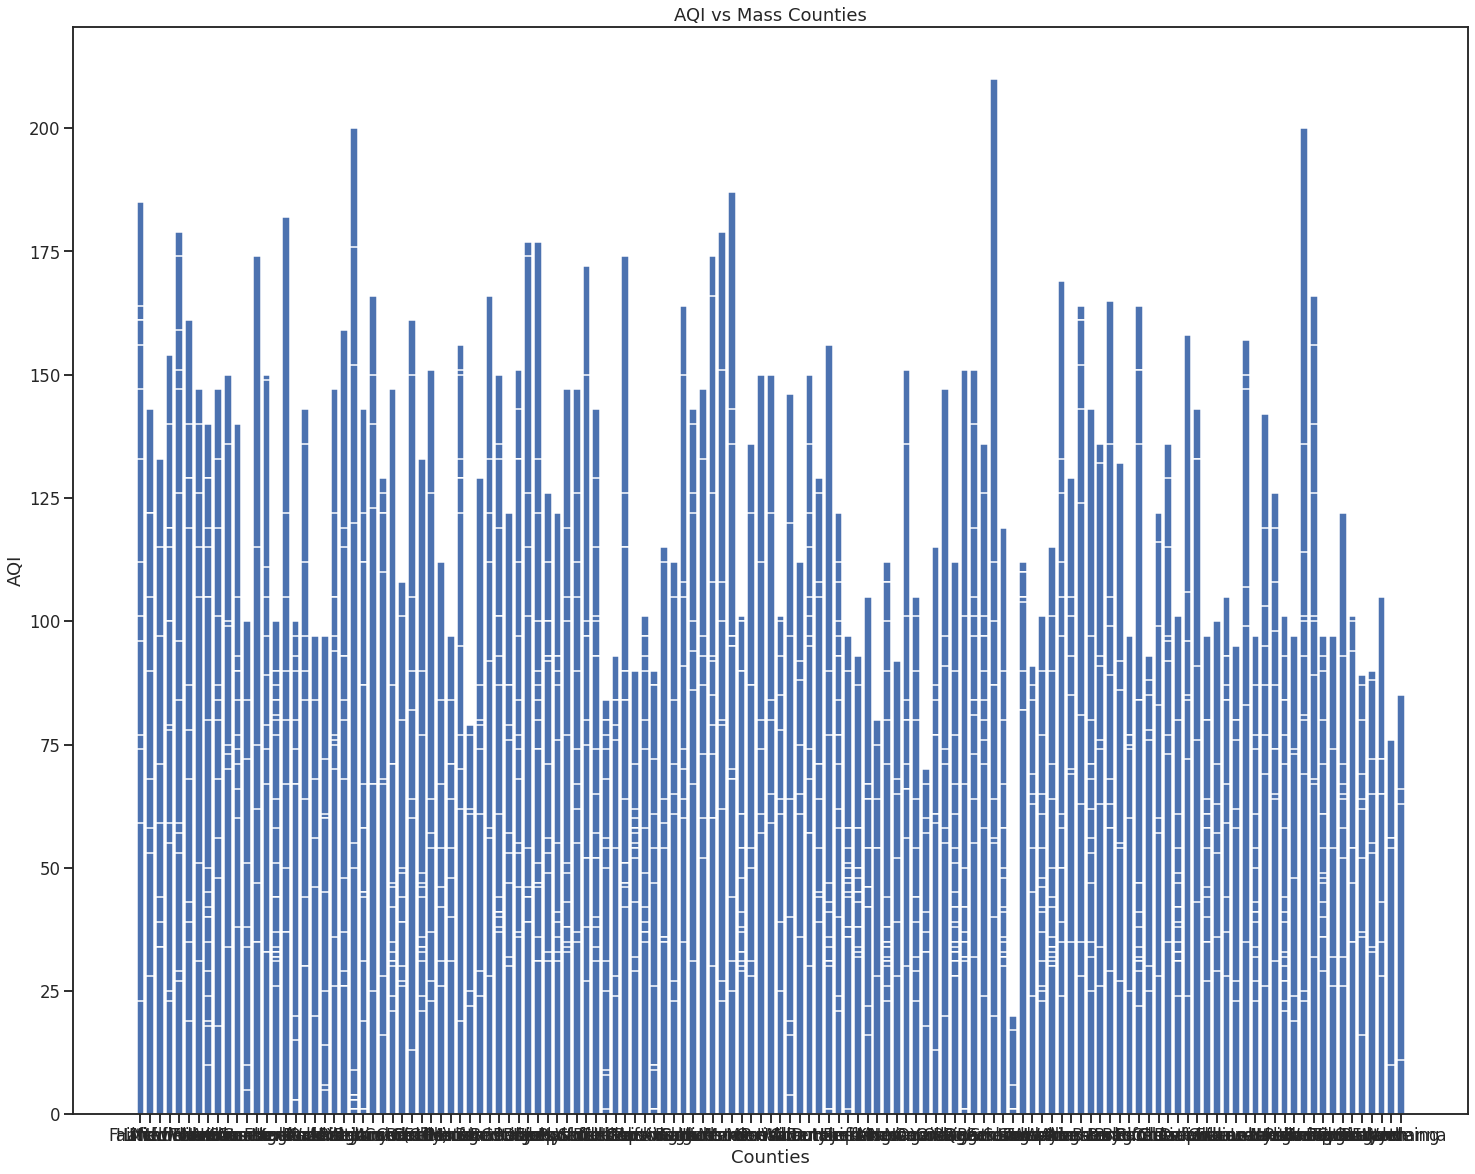

In [5]:
# plt.subplots(figsize=(25,20))
# plt.xlabel('Counties')
# plt.ylabel('AQI')
# plt.title('AQI vs Mass Counties')
# plt.bar(NE_aqi_2017_2019['county Name'], NE_aqi_2017_2019['AQI'])

* Lot of row data don't run as it takes matplot long time to generate
* 154631 rows
* values above 130-150 seem to be high and values below 25 seems to be low
* But there are no negative values which is good

In [6]:
above_150_aqi = NE_aqi_2017_2019.AQI > 150
display(NE_aqi_2017_2019.loc[above_150_aqi])
below_10_aqi = NE_aqi_2017_2019.AQI < 10
display(NE_aqi_2017_2019.loc[below_10_aqi])
print(NE_aqi_2017_2019.shape)

State Name county Name  State Code  County Code        Date  AQI  \
43441    Connecticut   Fairfield           9            1  2017-05-18  164   
43466    Connecticut   Fairfield           9            1  2017-06-12  179   
43467    Connecticut   Fairfield           9            1  2017-06-13  156   
43504    Connecticut   Fairfield           9            1  2017-07-20  161   
44469    Connecticut   Middlesex           9            7  2017-05-18  151   
...              ...         ...         ...          ...         ...  ...   
244369  Pennsylvania   Allegheny          42            3  2019-02-04  161   
244691  Pennsylvania   Allegheny          42            3  2019-12-23  152   
245596  Pennsylvania       Berks          42           11  2019-06-16  165   
248788  Pennsylvania     Dauphin          42           43  2019-04-23  158   
251938  Pennsylvania   Lancaster          42           71  2019-02-02  157   

         Category Defining Parameter Defining Site  Number of Sites Reporting  
43441   Unhealthy              Ozone   09-001-3007                          5  
43466   Unhealthy              Ozone   09-001-9003                          5  
43467   Unhealthy              Ozone   09-001-3007                          5  
43504   Unhealthy              Ozone   09-001-9003                          5  
44469   Unhealthy              Ozone   09-007-0007                          1  
...           ...                ...           ...                        ...  
244369  Unhealthy              PM2.5   42-003-0064                         10  
244691  Unhealthy              PM2.5   42-003-0064                         13  
245596  Unhealthy              PM2.5   42-011-0011                          1  
248788  Unhealthy              PM2.5   42-043-0401                          2  
251938  Unhealthy              PM2.5   42-071-0012                          2  

[82 rows x 10 columns]

State Name county Name  State Code  County Code        Date  AQI  \
43327   Connecticut   Fairfield           9            1  2017-01-24    6   
43330   Connecticut   Fairfield           9            1  2017-01-27    9   
43360   Connecticut   Fairfield           9            1  2017-02-26    9   
44056   Connecticut  Litchfield           9            5  2017-01-23    3   
44099   Connecticut  Litchfield           9            5  2017-03-07    3   
...             ...         ...         ...          ...         ...  ...   
301883      Vermont     Windham          50           25  2019-12-08    5   
301884      Vermont     Windham          50           25  2019-12-11    6   
301885      Vermont     Windham          50           25  2019-12-14    0   
301886      Vermont     Windham          50           25  2019-12-17    3   
301887      Vermont     Windham          50           25  2019-12-20    5   

       Category Defining Parameter Defining Site  Number of Sites Reporting  
43327      Good              PM2.5   09-001-1123                          2  
43330      Good              PM2.5   09-001-0010                          2  
43360      Good              PM2.5   09-001-1123                          2  
44056      Good              PM2.5   09-005-0005                          1  
44099      Good                 CO   09-005-0005                          1  
...         ...                ...           ...                        ...  
301883     Good              PM2.5   50-025-9000                          1  
301884     Good              PM2.5   50-025-9000                          1  
301885     Good              PM2.5   50-025-9000                          1  
301886     Good              PM2.5   50-025-9000                          1  
301887     Good              PM2.5   50-025-9000                          1  

[5809 rows x 10 columns]

(154631, 10)


* Not many values above 150
* More values that are low aqi
* Appear to have some counties with very low aqi


In [7]:
# bar plot of average aqi by county

mean_NE_AQI_2017 = NE_aqi_2017.groupby(['State Name', 'county Name'], as_index=False)[['AQI']].mean()
mean_NE_AQI_2018 = NE_aqi_2018.groupby(['State Name', 'county Name'], as_index=False)[['AQI']].mean()
mean_NE_AQI_2019 = NE_aqi_2019.groupby(['State Name', 'county Name'], as_index=False)[['AQI']].mean()

print(mean_NE_AQI_2017.shape)
print(mean_NE_AQI_2018.shape)
print(mean_NE_AQI_2019.shape)

mean_NE_AQI_2017_2019 = pd.concat([mean_NE_AQI_2017, mean_NE_AQI_2018, mean_NE_AQI_2019], axis=0)
print(mean_NE_AQI_2017_2019.shape)

(148, 3)
(149, 3)
(150, 3)
(447, 3)


* rather than doing mean of aqi for year 2017-2019 I should be do means of 2017, 2018, 2019 individually
* afterwards I should add them to the row data


<BarContainer object of 447 artists>

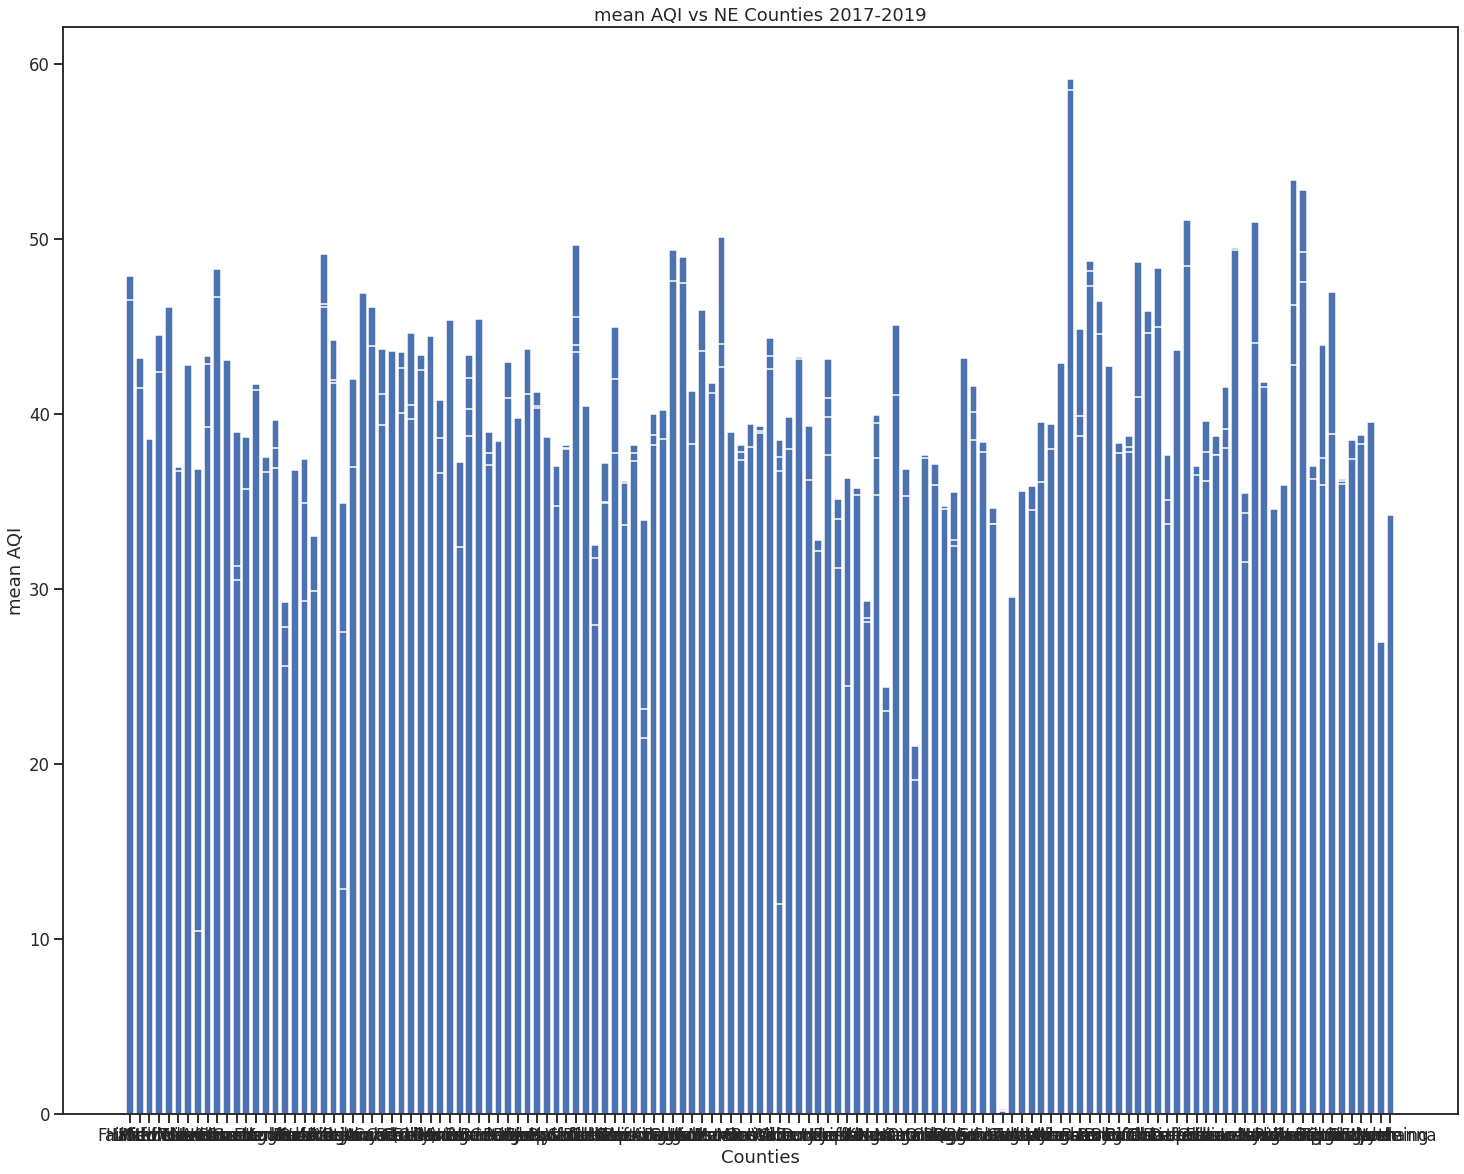

In [8]:
plt.subplots(figsize=(25,20))
plt.xlabel('Counties')
plt.ylabel('mean AQI')
plt.title('mean AQI vs NE Counties 2017-2019')
plt.bar(mean_NE_AQI_2017_2019['county Name'], mean_NE_AQI_2017_2019['AQI'])


* When averaging, we get a remainder of 389 row data as we put county data of 2017, 2018, 2019 individually rather
than the mean of that span of time
* seems that although we added more counties, our number of row data does not increase when average it out

In [9]:
above_40_aqi = mean_NE_AQI_2017_2019.AQI > 40
display(mean_NE_AQI_2017_2019.loc[above_40_aqi])
below_10_aqi = mean_NE_AQI_2017_2019.AQI < 10
display(mean_NE_AQI_2017_2019.loc[below_10_aqi])

State Name   county Name        AQI
0     Connecticut     Fairfield  46.315068
1     Connecticut      Hartford  43.202740
3     Connecticut     Middlesex  44.028986
4     Connecticut     New Haven  44.789041
6     Connecticut       Tolland  40.739336
..            ...           ...        ...
133  Pennsylvania        Mercer  42.695890
136  Pennsylvania   Northampton  42.782369
137  Pennsylvania  Philadelphia  47.542466
142  Pennsylvania    Washington  46.117808
145  Pennsylvania          York  41.761644

[181 rows x 3 columns]

State Name county Name       AQI
99   New York      Seneca  0.277937
80   New York    Franklin  0.090909
98   New York      Seneca  0.203297
80   New York    Franklin  0.014045
98   New York      Seneca  0.172222

* values above 40 seem to be on the higher end
* Seneca appears to be an outlier county with near 0 average aqi throughout 2017-2019 consistently
* it is the only county with aqi below 10
* Allegheny consistently higher than average but does not appear to much of outlier


In [10]:
max = NE_aqi_2017_2019.AQI == NE_aqi_2019.AQI.max()
min = NE_aqi_2017_2019.AQI == NE_aqi_2019.AQI.min()
display(NE_aqi_2017_2019.loc[max | min])

# check what are the defining parameters
NE_aqi_2017_2019['Defining Parameter'].unique()
display(NE_aqi_2017_2019.loc[NE_aqi_2017_2019['county Name'] == 'Seneca'])

State Name county Name  State Code  County Code        Date  AQI  \
44767    Connecticut   New Haven           9            9  2017-06-13  174   
45140    Connecticut  New London           9           11  2017-06-28    0   
45191    Connecticut  New London           9           11  2017-08-18    0   
45192    Connecticut  New London           9           11  2017-08-19    0   
126263         Maine    Franklin          23            7  2017-04-17    0   
...              ...         ...         ...          ...         ...  ...   
257222  Pennsylvania      Warren          42          123  2019-09-30    0   
257228  Pennsylvania      Warren          42          123  2019-10-06    0   
257244  Pennsylvania      Warren          42          123  2019-10-22    0   
257284  Pennsylvania      Warren          42          123  2019-12-01    0   
301885       Vermont     Windham          50           25  2019-12-14    0   

         Category Defining Parameter Defining Site  Number of Sites Reporting  
44767   Unhealthy              Ozone   09-009-9002                          3  
45140        Good              PM2.5   09-011-0124                          1  
45191        Good              PM2.5   09-011-0124                          1  
45192        Good              PM2.5   09-011-0124                          1  
126263       Good              PM2.5   23-007-2002                          1  
...           ...                ...           ...                        ...  
257222       Good                SO2   42-123-0005                          2  
257228       Good                SO2   42-123-0005                          2  
257244       Good                SO2   42-123-0005                          2  
257284       Good                SO2   42-123-0005                          2  
301885       Good              PM2.5   50-025-9000                          1  

[2463 rows x 10 columns]

State Name county Name  State Code  County Code        Date  AQI  \
197579   New York      Seneca          36           99  2017-01-06    0   
197580   New York      Seneca          36           99  2017-01-07    0   
197581   New York      Seneca          36           99  2017-01-08    0   
197582   New York      Seneca          36           99  2017-01-12    0   
197583   New York      Seneca          36           99  2017-01-13    0   
...           ...         ...         ...          ...         ...  ...   
197414   New York      Seneca          36           99  2019-12-27    0   
197415   New York      Seneca          36           99  2019-12-28    0   
197416   New York      Seneca          36           99  2019-12-29    0   
197417   New York      Seneca          36           99  2019-12-30    0   
197418   New York      Seneca          36           99  2019-12-31    0   

       Category Defining Parameter Defining Site  Number of Sites Reporting  
197579     Good                SO2   36-099-0002                          1  
197580     Good                SO2   36-099-0002                          1  
197581     Good                SO2   36-099-0002                          1  
197582     Good                SO2   36-099-0002                          1  
197583     Good                SO2   36-099-0002                          1  
...         ...                ...           ...                        ...  
197414     Good                SO2   36-099-0002                          1  
197415     Good                SO2   36-099-0002                          1  
197416     Good                SO2   36-099-0002                          1  
197417     Good                SO2   36-099-0002                          1  
197418     Good                SO2   36-099-0002                          1  

[1073 rows x 10 columns]

* shows that even when looking year 2017-2019 data hasnt changed much; makes sense; as air quality doesnt fluctuate much over 3 yrs
* Seneca has 1073 rows around 0 aqi with defining parameter, sulfur dioxide
* Seneca has mean of 0.21 aqi
* maybe track a particular pollutant

# Wii not explore income as deem income does not influence AQI from previous wrangling


# Explore and clean demographic data set 2017-2019

In [11]:
print(county_demographic.columns)
print(county_demographic.dtypes)
# seems demographic is all numeric type which is good

print(county_demographic.shape)
# we have 80 columns

display(county_demographic.head())
print(county_demographic.SUMLEV.unique())

NE_counties = get_NE_States(county_demographic, 'STATE')
NE_dems = county_demographic.loc[NE_counties]

display(NE_dems)

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE',
       'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE',
       'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE',
       'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE',
       'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE',
       'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE',
       'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE',
       'NHTOM_MALE', 'NHTOM_FEMALE', 'NHWAC_MALE', 'NHWAC_FEMALE',
       'NHBAC_MALE', 'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE',
       'NHAAC_MALE', 'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE',
       'H_FEMALE', 'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE',
       'HIA_MALE', 'HIA_FEMALE', 'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE',
       'HNA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE

SUMLEV  STATE  COUNTY   STNAME         CTYNAME  YEAR  AGEGRP  TOT_POP  \
0      50      1       1  Alabama  Autauga County     1       0    54571   
1      50      1       1  Alabama  Autauga County     1       1     3579   
2      50      1       1  Alabama  Autauga County     1       2     3991   
3      50      1       1  Alabama  Autauga County     1       3     4290   
4      50      1       1  Alabama  Autauga County     1       4     4290   

   TOT_MALE  TOT_FEMALE  ...  HWAC_MALE  HWAC_FEMALE  HBAC_MALE  HBAC_FEMALE  \
0     26569       28002  ...        607          538         57           48   
1      1866        1713  ...         77           56          9            5   
2      2001        1990  ...         64           66          2            3   
3      2171        2119  ...         51           57         13            7   
4      2213        2077  ...         48           44          7            5   

   HIAC_MALE  HIAC_FEMALE  HAAC_MALE  HAAC_FEMALE  HNAC_MALE  HNAC_FEMALE  
0         26           32          9           11         19           10  
1          4            1          0            0          2            1  
2          2            7          2            3          2            0  
3          5            5          2            1          1            1  
4          0            2          2            1          3            1  

[5 rows x 80 columns]

SUMLEV  STATE  COUNTY       STNAME           CTYNAME  YEAR  AGEGRP  \
70224       50      9       1  Connecticut  Fairfield County     1       0   
70225       50      9       1  Connecticut  Fairfield County     1       1   
70226       50      9       1  Connecticut  Fairfield County     1       2   
70227       50      9       1  Connecticut  Fairfield County     1       3   
70228       50      9       1  Connecticut  Fairfield County     1       4   
...        ...    ...     ...          ...               ...   ...     ...   
642955      50     50      27      Vermont    Windsor County    12      14   
642956      50     50      27      Vermont    Windsor County    12      15   
642957      50     50      27      Vermont    Windsor County    12      16   
642958      50     50      27      Vermont    Windsor County    12      17   
642959      50     50      27      Vermont    Windsor County    12      18   

        TOT_POP  TOT_MALE  TOT_FEMALE  ...  HWAC_MALE  HWAC_FEMALE  HBAC_MALE  \
70224    916829    445601      471228  ...      70171        67235       7428   
70225     56899     29226       27673  ...       6110         5833        994   
70226     62907     32165       30742  ...       5742         5281        839   
70227     66606     34212       32394  ...       5539         5384        739   
70228     62192     31816       30376  ...       5707         5151        759   
...         ...       ...         ...  ...        ...          ...        ...   
642955     4339      2124        2215  ...         15           11          0   
642956     3548      1654        1894  ...         16            7          0   
642957     2414      1184        1230  ...          4            0          0   
642958     1567       704         863  ...          4            4          0   
642959     1465       575         890  ...          3            6          0   

        HBAC_FEMALE  HIAC_MALE  HIAC_FEMALE  HAAC_MALE  HAAC_FEMALE  \
70224          7882       2393         2100        915          830   
70225           931        234          192        124           93   
70226           817        199          188        101           77   
70227           804        171          169         88           94   
70228           738        198          176         69           73   
...             ...        ...          ...        ...          ...   
642955            0          1            2          0            0   
642956            0          0            3          0            2   
642957            0          0            0          0            0   
642958            0          0            0          0            0   
642959            0          0            0          0            0   

        HNAC_MALE  HNAC_FEMALE  
70224         527          403  
70225          45           31  
70226          25           32  
70227          47           43  
70228          35           31  
...           ...          ...  
642955          0            0  
642956          0            0  
642957          0            0  
642958          0            0  
642959          0            0  

[54492 rows x 80 columns]

In [12]:
# keep only years 17-19

NE_dems = NE_dems.loc[NE_dems.YEAR > 9]
# keep only totals of dem; disregard ages
NE_dems = NE_dems.loc[NE_dems.AGEGRP == 0]
NE_dems

print(NE_dems.isna().sum())

SUMLEV         0
STATE          0
COUNTY         0
STNAME         0
CTYNAME        0
              ..
HIAC_FEMALE    0
HAAC_MALE      0
HAAC_FEMALE    0
HNAC_MALE      0
HNAC_FEMALE    0
Length: 80, dtype: int64


In [13]:
print(NE_dems.shape)
ethn = NE_dems.columns.values[10:]

width = 0.35
# fig, ax = plt.subplots(figsize=(45,20))
#
# # rec1 = ax.bar(NE_dems.CTYNAME, NE_dems.loc[:,'TOT_POP'], width, label='tot pop')
# for eth in ethn:
#     ax.bar(NE_dems.CTYNAME, NE_dems[eth], width, label=eth)
#
# ax.legend(bbox_to_anchor=(1.05,1))
# plt.show()


(717, 80)


* chart is also not as useful as too many columns to display for all the counties
* serWarning: Creating legend with loc="best" can be slow with large amounts of data.
* no need to draw this plot as it takes long for matplot to draw

## Change demographic column into ratio per the county

In [14]:
# need to build ratios and filter out duplicate ethnicities; such as the nots and in combinations or alones
NE_dems
# make 3 df yr2017, yr2018, yr2019

demographic = NE_dems.columns.values[8:]
NE_dem_ratio = NE_dems

for dem in demographic:
    NE_dem_ratio[dem + '_ratio'] = NE_dems[dem] / NE_dems['TOT_POP'] * 100
    # print(dem + ' ratio')

In [15]:
NE_dem_ratio_2017_2019 = remove_col(NE_dem_ratio, demographic)
display(NE_dem_ratio_2017_2019.columns)

NE_dem_ratio_2017_2019.head(10)

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE_ratio', 'TOT_FEMALE_ratio', 'WA_MALE_ratio',
       'WA_FEMALE_ratio', 'BA_MALE_ratio', 'BA_FEMALE_ratio', 'IA_MALE_ratio',
       'IA_FEMALE_ratio', 'AA_MALE_ratio', 'AA_FEMALE_ratio', 'NA_MALE_ratio',
       'NA_FEMALE_ratio', 'TOM_MALE_ratio', 'TOM_FEMALE_ratio',
       'WAC_MALE_ratio', 'WAC_FEMALE_ratio', 'BAC_MALE_ratio',
       'BAC_FEMALE_ratio', 'IAC_MALE_ratio', 'IAC_FEMALE_ratio',
       'AAC_MALE_ratio', 'AAC_FEMALE_ratio', 'NAC_MALE_ratio',
       'NAC_FEMALE_ratio', 'NH_MALE_ratio', 'NH_FEMALE_ratio',
       'NHWA_MALE_ratio', 'NHWA_FEMALE_ratio', 'NHBA_MALE_ratio',
       'NHBA_FEMALE_ratio', 'NHIA_MALE_ratio', 'NHIA_FEMALE_ratio',
       'NHAA_MALE_ratio', 'NHAA_FEMALE_ratio', 'NHNA_MALE_ratio',
       'NHNA_FEMALE_ratio', 'NHTOM_MALE_ratio', 'NHTOM_FEMALE_ratio',
       'NHWAC_MALE_ratio', 'NHWAC_FEMALE_ratio', 'NHBAC_MALE_ratio',
       'NHBAC_FEMALE_ratio', 'NHIAC_M

SUMLEV  STATE  COUNTY       STNAME            CTYNAME  YEAR  AGEGRP  \
70395      50      9       1  Connecticut   Fairfield County    10       0   
70414      50      9       1  Connecticut   Fairfield County    11       0   
70433      50      9       1  Connecticut   Fairfield County    12       0   
70623      50      9       3  Connecticut    Hartford County    10       0   
70642      50      9       3  Connecticut    Hartford County    11       0   
70661      50      9       3  Connecticut    Hartford County    12       0   
70851      50      9       5  Connecticut  Litchfield County    10       0   
70870      50      9       5  Connecticut  Litchfield County    11       0   
70889      50      9       5  Connecticut  Litchfield County    12       0   
71079      50      9       7  Connecticut   Middlesex County    10       0   

       TOT_POP  TOT_MALE_ratio  TOT_FEMALE_ratio  ...  HWAC_MALE_ratio  \
70395   943038       48.698144         51.301856  ...         8.771863   
70414   943971       48.708488         51.291512  ...         8.943071   
70433   943332       48.700776         51.299224  ...         9.077186   
70623   893076       48.577389         51.422611  ...         7.358612   
70642   892580       48.560017         51.439983  ...         7.534003   
70661   891720       48.580720         51.419280  ...         7.626834   
70851   181667       49.403029         50.596971  ...         2.739078   
70870   181095       49.435931         50.564069  ...         2.973577   
70889   180333       49.515618         50.484382  ...         3.141965   
71079   162942       48.714266         51.285734  ...         2.658001   

       HWAC_FEMALE_ratio  HBAC_MALE_ratio  HBAC_FEMALE_ratio  HIAC_MALE_ratio  \
70395           8.578764         1.047678           1.109499         0.298079   
70414           8.786817         1.085838           1.145798         0.307001   
70433           8.966514         1.128341           1.183995         0.319082   
70623           7.653212         1.394618           1.551380         0.293480   
70642           7.856327         1.422730           1.596496         0.301149   
70661           7.970103         1.458642           1.633585         0.303234   
70851           2.630637         0.390825           0.361100         0.142569   
70870           2.829454         0.425191           0.387642         0.155719   
70889           3.005551         0.454714           0.417561         0.167468   
71079           2.714463         0.386641           0.427146         0.088375   

       HIAC_FEMALE_ratio  HAAC_MALE_ratio  HAAC_FEMALE_ratio  HNAC_MALE_ratio  \
70395           0.263828         0.113781           0.094164         0.076773   
70414           0.280199         0.118542           0.098944         0.075426   
70433           0.286113         0.119788           0.099647         0.077173   
70623           0.299639         0.128544           0.121266         0.068415   
70642           0.312801         0.132425           0.121446         0.070806   
70661           0.315458         0.137711           0.124815         0.069304   
70851           0.131559         0.040183           0.039633         0.030826   
70870           0.137497         0.043071           0.046937         0.025401   
70889           0.144732         0.053789           0.051017         0.030499   
71079           0.102490         0.055848           0.054007         0.025162   

       HNAC_FEMALE_ratio  
70395           0.055883  
70414           0.059536  
70433           0.059682  
70623           0.050612  
70642           0.051872  
70661           0.052819  
70851           0.019816  
70870           0.023744  
70889           0.022736  
71079           0.025162  

[10 rows x 80 columns]

* have ratio for years 2017-2019
* maybe need to link the ethnicities correctly

In [16]:
# make a bar chart of all demographs in county 19
# demographic_ratios = NE_dem_ratio.columns.values[8:]
#
# fig, ax = plt.subplots(figsize=(45,20))
#
# # rec1 = ax.bar(NE_dems.CTYNAME, NE_dems.loc[:,'TOT_POP'], width, label='tot pop')
# for dem in demographic_ratios:
#     ax.bar(NE_dem_ratio_19.CTYNAME, NE_dem_ratio_19[dem], width, label=dem)
#
# ax.legend(bbox_to_anchor=(1.05,1))
# plt.show()
# why are the bar charts not all equal
# maybe do them for every year

* did not run large number of county and row data would be useless to see

In [17]:
# do all counties have at least 40% for wac

NE_dem_ratio_2017_2019.columns.values[10:12]
NE_counties = NE_dem_ratio_2017_2019.CTYNAME.values

below_40_WA = []

for county in NE_counties:
   m_ratio = (NE_dem_ratio_2017_2019.loc[NE_dem_ratio_2017_2019.CTYNAME == county]['WA_MALE_ratio'])
   f_ratio = (NE_dem_ratio_2017_2019.loc[NE_dem_ratio_2017_2019.CTYNAME == county]['WA_FEMALE_ratio'])
   if((m_ratio < 40).values[0] | (f_ratio < 40).values[0]):
       print(county, m_ratio.values, f_ratio.values)
       below_40_WA.append(county)

print(len(below_40_WA))

Fairfield County [38.82961238 38.6874173  38.49895901] [40.20771167 40.05017103 39.85934962]
Fairfield County [38.82961238 38.6874173  38.49895901] [40.20771167 40.05017103 39.85934962]
Fairfield County [38.82961238 38.6874173  38.49895901] [40.20771167 40.05017103 39.85934962]
Hartford County [36.71311288 36.51919156 36.32788319] [38.90867071 38.70689462 38.45556901]
Hartford County [36.71311288 36.51919156 36.32788319] [38.90867071 38.70689462 38.45556901]
Hartford County [36.71311288 36.51919156 36.32788319] [38.90867071 38.70689462 38.45556901]
New Haven County [37.80457664 37.67362023 37.47380835] [40.19595499 40.0201407  39.82242906]
New Haven County [37.80457664 37.67362023 37.47380835] [40.19595499 40.0201407  39.82242906]
New Haven County [37.80457664 37.67362023 37.47380835] [40.19595499 40.0201407  39.82242906]
Kent County [32.62681375 32.29192338 31.96597082 39.11634605 39.03468149 39.20296571] [34.21152528 33.88092304 33.67738652 42.28988787 42.36389832 42.09659149]
Kent C

* only 165 counties over years have less than 40% of white demographic


# combine the data sets
make the foreign key

In [18]:
print(NE_aqi_2017_2019.columns)
print(NE_dem_ratio_2017_2019.columns)

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')
Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE_ratio', 'TOT_FEMALE_ratio', 'WA_MALE_ratio',
       'WA_FEMALE_ratio', 'BA_MALE_ratio', 'BA_FEMALE_ratio', 'IA_MALE_ratio',
       'IA_FEMALE_ratio', 'AA_MALE_ratio', 'AA_FEMALE_ratio', 'NA_MALE_ratio',
       'NA_FEMALE_ratio', 'TOM_MALE_ratio', 'TOM_FEMALE_ratio',
       'WAC_MALE_ratio', 'WAC_FEMALE_ratio', 'BAC_MALE_ratio',
       'BAC_FEMALE_ratio', 'IAC_MALE_ratio', 'IAC_FEMALE_ratio',
       'AAC_MALE_ratio', 'AAC_FEMALE_ratio', 'NAC_MALE_ratio',
       'NAC_FEMALE_ratio', 'NH_MALE_ratio', 'NH_FEMALE_ratio',
       'NHWA_MALE_ratio', 'NHWA_FEMALE_ratio', 'NHBA_MALE_ratio',
       'NHBA_FEMALE_ratio', 'NHIA_MALE_ratio', 'NHIA_FEMALE_ratio',
       'NHAA_MALE_ratio', 'NHAA_FEMALE_ratio'

In [19]:
# add GeoFIPS for mass-dem_ratio_19

state_dem = NE_dem_ratio_2017_2019.STATE.astype(str).values
county_dem = NE_dem_ratio_2017_2019.COUNTY.astype(str).values
geofips_dem = []
for stateID, countyID in zip(state_dem, county_dem):
    id = ''
    stateLen = len(stateID)
    countyLen = len(countyID)
    if(stateLen < 2):
        id += '0' + stateID
    else:
        id += stateID
    if(countyLen == 1):
        id += '00' + countyID
    elif(countyLen == 2):
        id += '0' + countyID
    else:
        id += countyID
    geofips_dem.append(id)

NE_dem_ratio_2017_2019['GeoFIPS'] = geofips_dem
display(NE_dem_ratio_2017_2019)

SUMLEV  STATE  COUNTY       STNAME           CTYNAME  YEAR  AGEGRP  \
70395       50      9       1  Connecticut  Fairfield County    10       0   
70414       50      9       1  Connecticut  Fairfield County    11       0   
70433       50      9       1  Connecticut  Fairfield County    12       0   
70623       50      9       3  Connecticut   Hartford County    10       0   
70642       50      9       3  Connecticut   Hartford County    11       0   
...        ...    ...     ...          ...               ...   ...     ...   
642694      50     50      25      Vermont    Windham County    11       0   
642713      50     50      25      Vermont    Windham County    12       0   
642903      50     50      27      Vermont    Windsor County    10       0   
642922      50     50      27      Vermont    Windsor County    11       0   
642941      50     50      27      Vermont    Windsor County    12       0   

        TOT_POP  TOT_MALE_ratio  TOT_FEMALE_ratio  ...  HWAC_FEMALE_ratio  \
70395    943038       48.698144         51.301856  ...           8.578764   
70414    943971       48.708488         51.291512  ...           8.786817   
70433    943332       48.700776         51.299224  ...           8.966514   
70623    893076       48.577389         51.422611  ...           7.653212   
70642    892580       48.560017         51.439983  ...           7.856327   
...         ...             ...               ...  ...                ...   
642694    42635       48.992612         51.007388  ...           1.008561   
642713    42222       48.938942         51.061058  ...           1.025532   
642903    55224       48.821165         51.178835  ...           0.756917   
642922    55204       48.884139         51.115861  ...           0.780741   
642941    55062       48.966619         51.033381  ...           0.824525   

        HBAC_MALE_ratio  HBAC_FEMALE_ratio  HIAC_MALE_ratio  \
70395          1.047678           1.109499         0.298079   
70414          1.085838           1.145798         0.307001   
70433          1.128341           1.183995         0.319082   
70623          1.394618           1.551380         0.293480   
70642          1.422730           1.596496         0.301149   
...                 ...                ...              ...   
642694         0.119620           0.147766         0.079747   
642713         0.118422           0.146843         0.073421   
642903         0.070621           0.067000         0.050703   
642922         0.076081           0.061590         0.054344   
642941         0.088991           0.072645         0.058116   

        HIAC_FEMALE_ratio  HAAC_MALE_ratio  HAAC_FEMALE_ratio  \
70395            0.263828         0.113781           0.094164   
70414            0.280199         0.118542           0.098944   
70433            0.286113         0.119788           0.099647   
70623            0.299639         0.128544           0.121266   
70642            0.312801         0.132425           0.121446   
...                   ...              ...                ...   
642694           0.068019         0.025800           0.023455   
642713           0.066316         0.033158           0.028421   
642903           0.057946         0.027162           0.025351   
642922           0.059778         0.023549           0.018115   
642941           0.058116         0.019977           0.021794   

        HNAC_MALE_ratio  HNAC_FEMALE_ratio  GeoFIPS  
70395          0.076773           0.055883    09001  
70414          0.075426           0.059536    09001  
70433          0.077173           0.059682    09001  
70623          0.068415           0.050612    09003  
70642          0.070806           0.051872    09003  
...                 ...                ...      ...  
642694         0.018764           0.004691    50025  
642713         0.011842           0.004737    50025  
642903         0.005432           0.005432    50027  
642922         0.009057           0.003623    50027  
642941        

In [20]:
# add GeoFIPS for mass_aqi_2019
state_aqi = NE_aqi_2017_2019['State Code'].astype(str).values
county_aqi = NE_aqi_2017_2019['County Code'].astype(str).values

geofips_aqi = []
for stateID, countyID in zip(state_aqi, county_aqi):
    id = ''
    stateLen = len(stateID)
    countyLen = len(countyID)
    if(stateLen < 2):
        id += '0' + stateID
    else:
        id += stateID
    if(countyLen == 1):
        id += '00' + countyID
    elif(countyLen == 2):
        id += '0' + countyID
    else:
        id += countyID
    geofips_aqi.append(id)

NE_aqi_2017_2019['GeoFIPS'] = geofips_aqi
display(NE_aqi_2017_2019)

<ipython-input-20-118fb4bec580>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NE_aqi_2017_2019['GeoFIPS'] = geofips_aqi


State Name county Name  State Code  County Code        Date  AQI  \
43304   Connecticut   Fairfield           9            1  2017-01-01   51   
43305   Connecticut   Fairfield           9            1  2017-01-02   68   
43306   Connecticut   Fairfield           9            1  2017-01-03   15   
43307   Connecticut   Fairfield           9            1  2017-01-04   18   
43308   Connecticut   Fairfield           9            1  2017-01-05   27   
...             ...         ...         ...          ...         ...  ...   
301885      Vermont     Windham          50           25  2019-12-14    0   
301886      Vermont     Windham          50           25  2019-12-17    3   
301887      Vermont     Windham          50           25  2019-12-20    5   
301888      Vermont     Windham          50           25  2019-12-23   18   
301889      Vermont     Windham          50           25  2019-12-29   10   

        Category Defining Parameter Defining Site  Number of Sites Reporting  \
43304   Moderate              PM2.5   09-001-1123                          2   
43305   Moderate              PM2.5   09-001-1123                          2   
43306       Good              PM2.5   09-001-1123                          2   
43307       Good              PM2.5   09-001-1123                          2   
43308       Good              PM2.5   09-001-0010                          2   
...          ...                ...           ...                        ...   
301885      Good              PM2.5   50-025-9000                          1   
301886      Good              PM2.5   50-025-9000                          1   
301887      Good              PM2.5   50-025-9000                          1   
301888      Good              PM2.5   50-025-9000                          1   
301889      Good              PM2.5   50-025-9000                          1   

       GeoFIPS  
43304    09001  
43305    09001  
43306    09001  
43307    09001  
43308    09001  
...        ...  
301885   50025  
301886   50025  
301887   50025  
301888   50025  
301889   50025  

[154631 rows x 11 columns]

In [23]:
# combine them

# NE_aqi_dem_2017_2019 = pd.merge(NE_aqi_2017_2019, NE_dem_ratio_2017_2019, on='GeoFIPS')
#
# display(NE_aqi_dem_2017_2019)

NE_aqi_2017_2019
NE_dem_ratio_2017_2019

NE_dem_ratio_17 = NE_dem_ratio_2017_2019.loc[NE_dems.YEAR == 10]
NE_dem_ratio_18 = NE_dem_ratio_2017_2019.loc[NE_dems.YEAR == 11]
NE_dem_ratio_19 = NE_dem_ratio_2017_2019.loc[NE_dems.YEAR == 12]

NE_aqi_2017 = NE_aqi_2017_2019.loc[NE_aqi_2017_2019.Date.str.contains('2017')]
NE_aqi_2018 = NE_aqi_2017_2019.loc[NE_aqi_2017_2019.Date.str.contains('2018')]
NE_aqi_2019 = NE_aqi_2017_2019.loc[NE_aqi_2017_2019.Date.str.contains('2019')]

NE_aqi_dem_2017 = pd.merge(NE_aqi_2017, NE_dem_ratio_17, on='GeoFIPS')
NE_aqi_dem_2018 = pd.merge(NE_aqi_2018, NE_dem_ratio_18, on='GeoFIPS')
NE_aqi_dem_2019 = pd.merge(NE_aqi_2019, NE_dem_ratio_19, on='GeoFIPS')

NE_aqi_dem_2017_2019 = pd.concat([NE_aqi_dem_2017, NE_aqi_dem_2018, NE_aqi_dem_2019], axis=0)
# combine each separate aqi with dem_ratios

In [24]:
print(NE_aqi_2017_2019.shape)

(154631, 11)


* Want to keep the separate records for each county year; datasets are individually merged

## Make dataset for average aqi by county for years 2017 - 2019

In [28]:
NE_aqi_dem_2017.columns
NE_county_col = list(NE_aqi_dem_2017.columns[[0, 1]]) + list(NE_aqi_dem_2017.columns[18:])
NE_county_col

['State Name',
 'county Name',
 'TOT_POP',
 'TOT_MALE_ratio',
 'TOT_FEMALE_ratio',
 'WA_MALE_ratio',
 'WA_FEMALE_ratio',
 'BA_MALE_ratio',
 'BA_FEMALE_ratio',
 'IA_MALE_ratio',
 'IA_FEMALE_ratio',
 'AA_MALE_ratio',
 'AA_FEMALE_ratio',
 'NA_MALE_ratio',
 'NA_FEMALE_ratio',
 'TOM_MALE_ratio',
 'TOM_FEMALE_ratio',
 'WAC_MALE_ratio',
 'WAC_FEMALE_ratio',
 'BAC_MALE_ratio',
 'BAC_FEMALE_ratio',
 'IAC_MALE_ratio',
 'IAC_FEMALE_ratio',
 'AAC_MALE_ratio',
 'AAC_FEMALE_ratio',
 'NAC_MALE_ratio',
 'NAC_FEMALE_ratio',
 'NH_MALE_ratio',
 'NH_FEMALE_ratio',
 'NHWA_MALE_ratio',
 'NHWA_FEMALE_ratio',
 'NHBA_MALE_ratio',
 'NHBA_FEMALE_ratio',
 'NHIA_MALE_ratio',
 'NHIA_FEMALE_ratio',
 'NHAA_MALE_ratio',
 'NHAA_FEMALE_ratio',
 'NHNA_MALE_ratio',
 'NHNA_FEMALE_ratio',
 'NHTOM_MALE_ratio',
 'NHTOM_FEMALE_ratio',
 'NHWAC_MALE_ratio',
 'NHWAC_FEMALE_ratio',
 'NHBAC_MALE_ratio',
 'NHBAC_FEMALE_ratio',
 'NHIAC_MALE_ratio',
 'NHIAC_FEMALE_ratio',
 'NHAAC_MALE_ratio',
 'NHAAC_FEMALE_ratio',
 'NHNAC_MALE_ratio'

In [36]:
NE_county_col = list(NE_aqi_dem_2017.columns[[0, 1]]) + list(NE_aqi_dem_2017.columns[18:])

NE_avg_aqi_dem_2017 = NE_aqi_dem_2017.groupby(NE_county_col, as_index=False)[['AQI']].mean()
NE_avg_aqi_dem_2018 = NE_aqi_dem_2018.groupby(NE_county_col, as_index=False)[['AQI']].mean()
NE_avg_aqi_dem_2019 = NE_aqi_dem_2019.groupby(NE_county_col, as_index=False)[['AQI']].mean()

NE_avg_aqi_dem_2017_2019 = pd.concat([NE_avg_aqi_dem_2017, NE_avg_aqi_dem_2018, NE_avg_aqi_dem_2019], axis=0)
print(NE_avg_aqi_dem_2017_2019.shape)
print(NE_avg_aqi_dem_2017_2019.columns)
print(NE_aqi_dem_2017_2019.columns)


(447, 76)
Index(['State Name', 'county Name', 'TOT_POP', 'TOT_MALE_ratio',
       'TOT_FEMALE_ratio', 'WA_MALE_ratio', 'WA_FEMALE_ratio', 'BA_MALE_ratio',
       'BA_FEMALE_ratio', 'IA_MALE_ratio', 'IA_FEMALE_ratio', 'AA_MALE_ratio',
       'AA_FEMALE_ratio', 'NA_MALE_ratio', 'NA_FEMALE_ratio', 'TOM_MALE_ratio',
       'TOM_FEMALE_ratio', 'WAC_MALE_ratio', 'WAC_FEMALE_ratio',
       'BAC_MALE_ratio', 'BAC_FEMALE_ratio', 'IAC_MALE_ratio',
       'IAC_FEMALE_ratio', 'AAC_MALE_ratio', 'AAC_FEMALE_ratio',
       'NAC_MALE_ratio', 'NAC_FEMALE_ratio', 'NH_MALE_ratio',
       'NH_FEMALE_ratio', 'NHWA_MALE_ratio', 'NHWA_FEMALE_ratio',
       'NHBA_MALE_ratio', 'NHBA_FEMALE_ratio', 'NHIA_MALE_ratio',
       'NHIA_FEMALE_ratio', 'NHAA_MALE_ratio', 'NHAA_FEMALE_ratio',
       'NHNA_MALE_ratio', 'NHNA_FEMALE_ratio', 'NHTOM_MALE_ratio',
       'NHTOM_FEMALE_ratio', 'NHWAC_MALE_ratio', 'NHWAC_FEMALE_ratio',
       'NHBAC_MALE_ratio', 'NHBAC_FEMALE_ratio', 'NHIAC_MALE_ratio',
       'NHIAC_FEMALE_rat

In [37]:
# drop redundant columns
# rename more descriptive names
col_to_drop = ['SUMLEV', 'State Code', 'County Code', 'STATE', 'COUNTY', 'STNAME', 'YEAR']
NE_2017_2019_df = remove_col(NE_aqi_dem_2017_2019, col_to_drop)
NE_avg_2017_2019_df = NE_avg_aqi_dem_2017_2019
display(NE_2017_2019_df)
display(NE_avg_2017_2019_df)

State Name county Name        Date  AQI  Category Defining Parameter  \
0      Connecticut   Fairfield  2017-01-01   51  Moderate              PM2.5   
1      Connecticut   Fairfield  2017-01-02   68  Moderate              PM2.5   
2      Connecticut   Fairfield  2017-01-03   15      Good              PM2.5   
3      Connecticut   Fairfield  2017-01-04   18      Good              PM2.5   
4      Connecticut   Fairfield  2017-01-05   27      Good              PM2.5   
...            ...         ...         ...  ...       ...                ...   
51797      Vermont     Windham  2019-12-14    0      Good              PM2.5   
51798      Vermont     Windham  2019-12-17    3      Good              PM2.5   
51799      Vermont     Windham  2019-12-20    5      Good              PM2.5   
51800      Vermont     Windham  2019-12-23   18      Good              PM2.5   
51801      Vermont     Windham  2019-12-29   10      Good              PM2.5   

      Defining Site  Number of Sites Reporting GeoFIPS           CTYNAME  ...  \
0       09-001-1123                          2   09001  Fairfield County  ...   
1       09-001-1123                          2   09001  Fairfield County  ...   
2       09-001-1123                          2   09001  Fairfield County  ...   
3       09-001-1123                          2   09001  Fairfield County  ...   
4       09-001-0010                          2   09001  Fairfield County  ...   
...             ...                        ...     ...               ...  ...   
51797   50-025-9000                          1   50025    Windham County  ...   
51798   50-025-9000                          1   50025    Windham County  ...   
51799   50-025-9000                          1   50025    Windham County  ...   
51800   50-025-9000                          1   50025    Windham County  ...   
51801   50-025-9000                          1   50025    Windham County  ...   

       HWAC_MALE_ratio  HWAC_FEMALE_ratio  HBAC_MALE_ratio  HBAC_FEMALE_ratio  \
0             8.771863           8.578764         1.047678           1.109499   
1             8.771863           8.578764         1.047678           1.109499   
2             8.771863           8.578764         1.047678           1.109499   
3             8.771863           8.578764         1.047678           1.109499   
4             8.771863           8.578764         1.047678           1.109499   
...                ...                ...              ...                ...   
51797         1.162901           1.025532         0.118422           0.146843   
51798         1.162901           1.025532         0.118422           0.146843   
51799         1.162901           1.025532         0.118422           0.146843   
51800         1.162901           1.025532         0.118422           0.146843   
51801         1.162901           1.025532         0.118422           0.146843   

       HIAC_MALE_ratio  HIAC_FEMALE_ratio  HAAC_MALE_ratio  HAAC_FEMALE_ratio  \
0             0.298079           0.263828         0.113781           0.094164   
1             0.298079           0.263828         0.113781           0.094164   
2             0.298079           0.263828         0.113781           0.094164   
3             0.298079           0.263828         0.113781           0.094164   
4             0.298079           0.263828         0.113781           0.094164   
...                ...                ...              ...                ...   
51797         0.073421           0.066316         0.033158           0.028421   
51798         0.073421           0.066316         0.033158           0.028421   
51799         0.073421           0.066316         0.033158           0.028421   
51800         0.073421           0.066316         0.033158           0.028421   
51801         0.073421           0.066316         0.033158           0.028421   

       HNAC_MALE_ratio  HNAC_FEMALE_ratio  
0             0.076773           0.055883  
1             0.076773           0.05588

State Name county Name  TOT_POP  TOT_MALE_ratio  TOT_FEMALE_ratio  \
0     Connecticut   Fairfield   943038       48.698144         51.301856   
1     Connecticut    Hartford   893076       48.577389         51.422611   
2     Connecticut  Litchfield   181667       49.403029         50.596971   
3     Connecticut   Middlesex   162942       48.714266         51.285734   
4     Connecticut   New Haven   857748       48.214627         51.785373   
..            ...         ...      ...             ...               ...   
145  Pennsylvania        York   449058       49.432145         50.567855   
146       Vermont  Bennington    35470       48.700310         51.299690   
147       Vermont  Chittenden   163774       48.908252         51.091748   
148       Vermont     Rutland    58191       49.519685         50.480315   
149       Vermont     Windham    42222       48.938942         51.061058   

     WA_MALE_ratio  WA_FEMALE_ratio  BA_MALE_ratio  BA_FEMALE_ratio  \
0        38.829612        40.207712       5.820020         6.748509   
1        36.713113        38.908671       7.458828         8.052954   
2        46.221383        47.592023       1.153209         0.968806   
3        43.542488        45.679444       2.628543         2.723055   
4        37.804577        40.195955       6.927792         7.800659   
..             ...              ...            ...              ...   
145      43.777864        44.899991       3.600648         3.453229   
146      46.447702        49.049901       0.778122         0.586411   
147      44.127884        46.172775       1.391552         1.158304   
148      47.770274        48.651853       0.458834         0.261209   
149      46.336033        48.365781       0.935531         0.599214   

     IA_MALE_ratio  ...  HWAC_FEMALE_ratio  HBAC_MALE_ratio  \
0         0.269766  ...           8.578764         1.047678   
1         0.274669  ...           7.653212         1.394618   
2         0.167890  ...           2.630637         0.390825   
3         0.125812  ...           2.714463         0.386641   
4         0.265113  ...           7.797512         1.208747   
..             ...  ...                ...              ...   
145       0.202646  ...           3.162175         0.806355   
146       0.211446  ...           1.062870         0.095856   
147       0.109908  ...           1.138154         0.120288   
148       0.144352  ...           0.704576         0.089361   
149       0.130264  ...           1.025532         0.118422   

     HBAC_FEMALE_ratio  HIAC_MALE_ratio  HIAC_FEMALE_ratio  HAAC_MALE_ratio  \
0             1.109499         0.298079           0.263828         0.113781   
1             1.551380         0.293480           0.299639         0.128544   
2             0.361100         0.142569           0.131559         0.040183   
3             0.427146         0.088375           0.102490         0.055848   
4             1.338155         0.262198           0.275372         0.093034   
..                 ...              ...                ...              ...   
145           0.775401         0.172583           0.157218         0.057899   
146           0.115591         0.093036           0.067663         0.022554   
147           0.125172         0.066555           0.088537         0.026866   
148           0.044680         0.054991           0.049836         0.024059   
149           0.146843         0.073421           0.066316         0.033158   

     HAAC_FEMALE_ratio  HNAC_MALE_ratio  HNAC_FEMALE_ratio        AQI  
0             0.094164         0.076773           0.055883  46.315068  
1             0.121266         0.068415           0.050612  43.202740  
2             0.039633         0.030826           0.019816  38.250689  
3             0.054007         0.025162           0.025162  44.028986  
4             0.090236         0.044419           0.045701  44.789041  
..                 ...              ...                ...        ...  
145           0.059458         

# Explore dataset with scatterplot, distro, etc..

# Explore pop demographic and aqi demographics



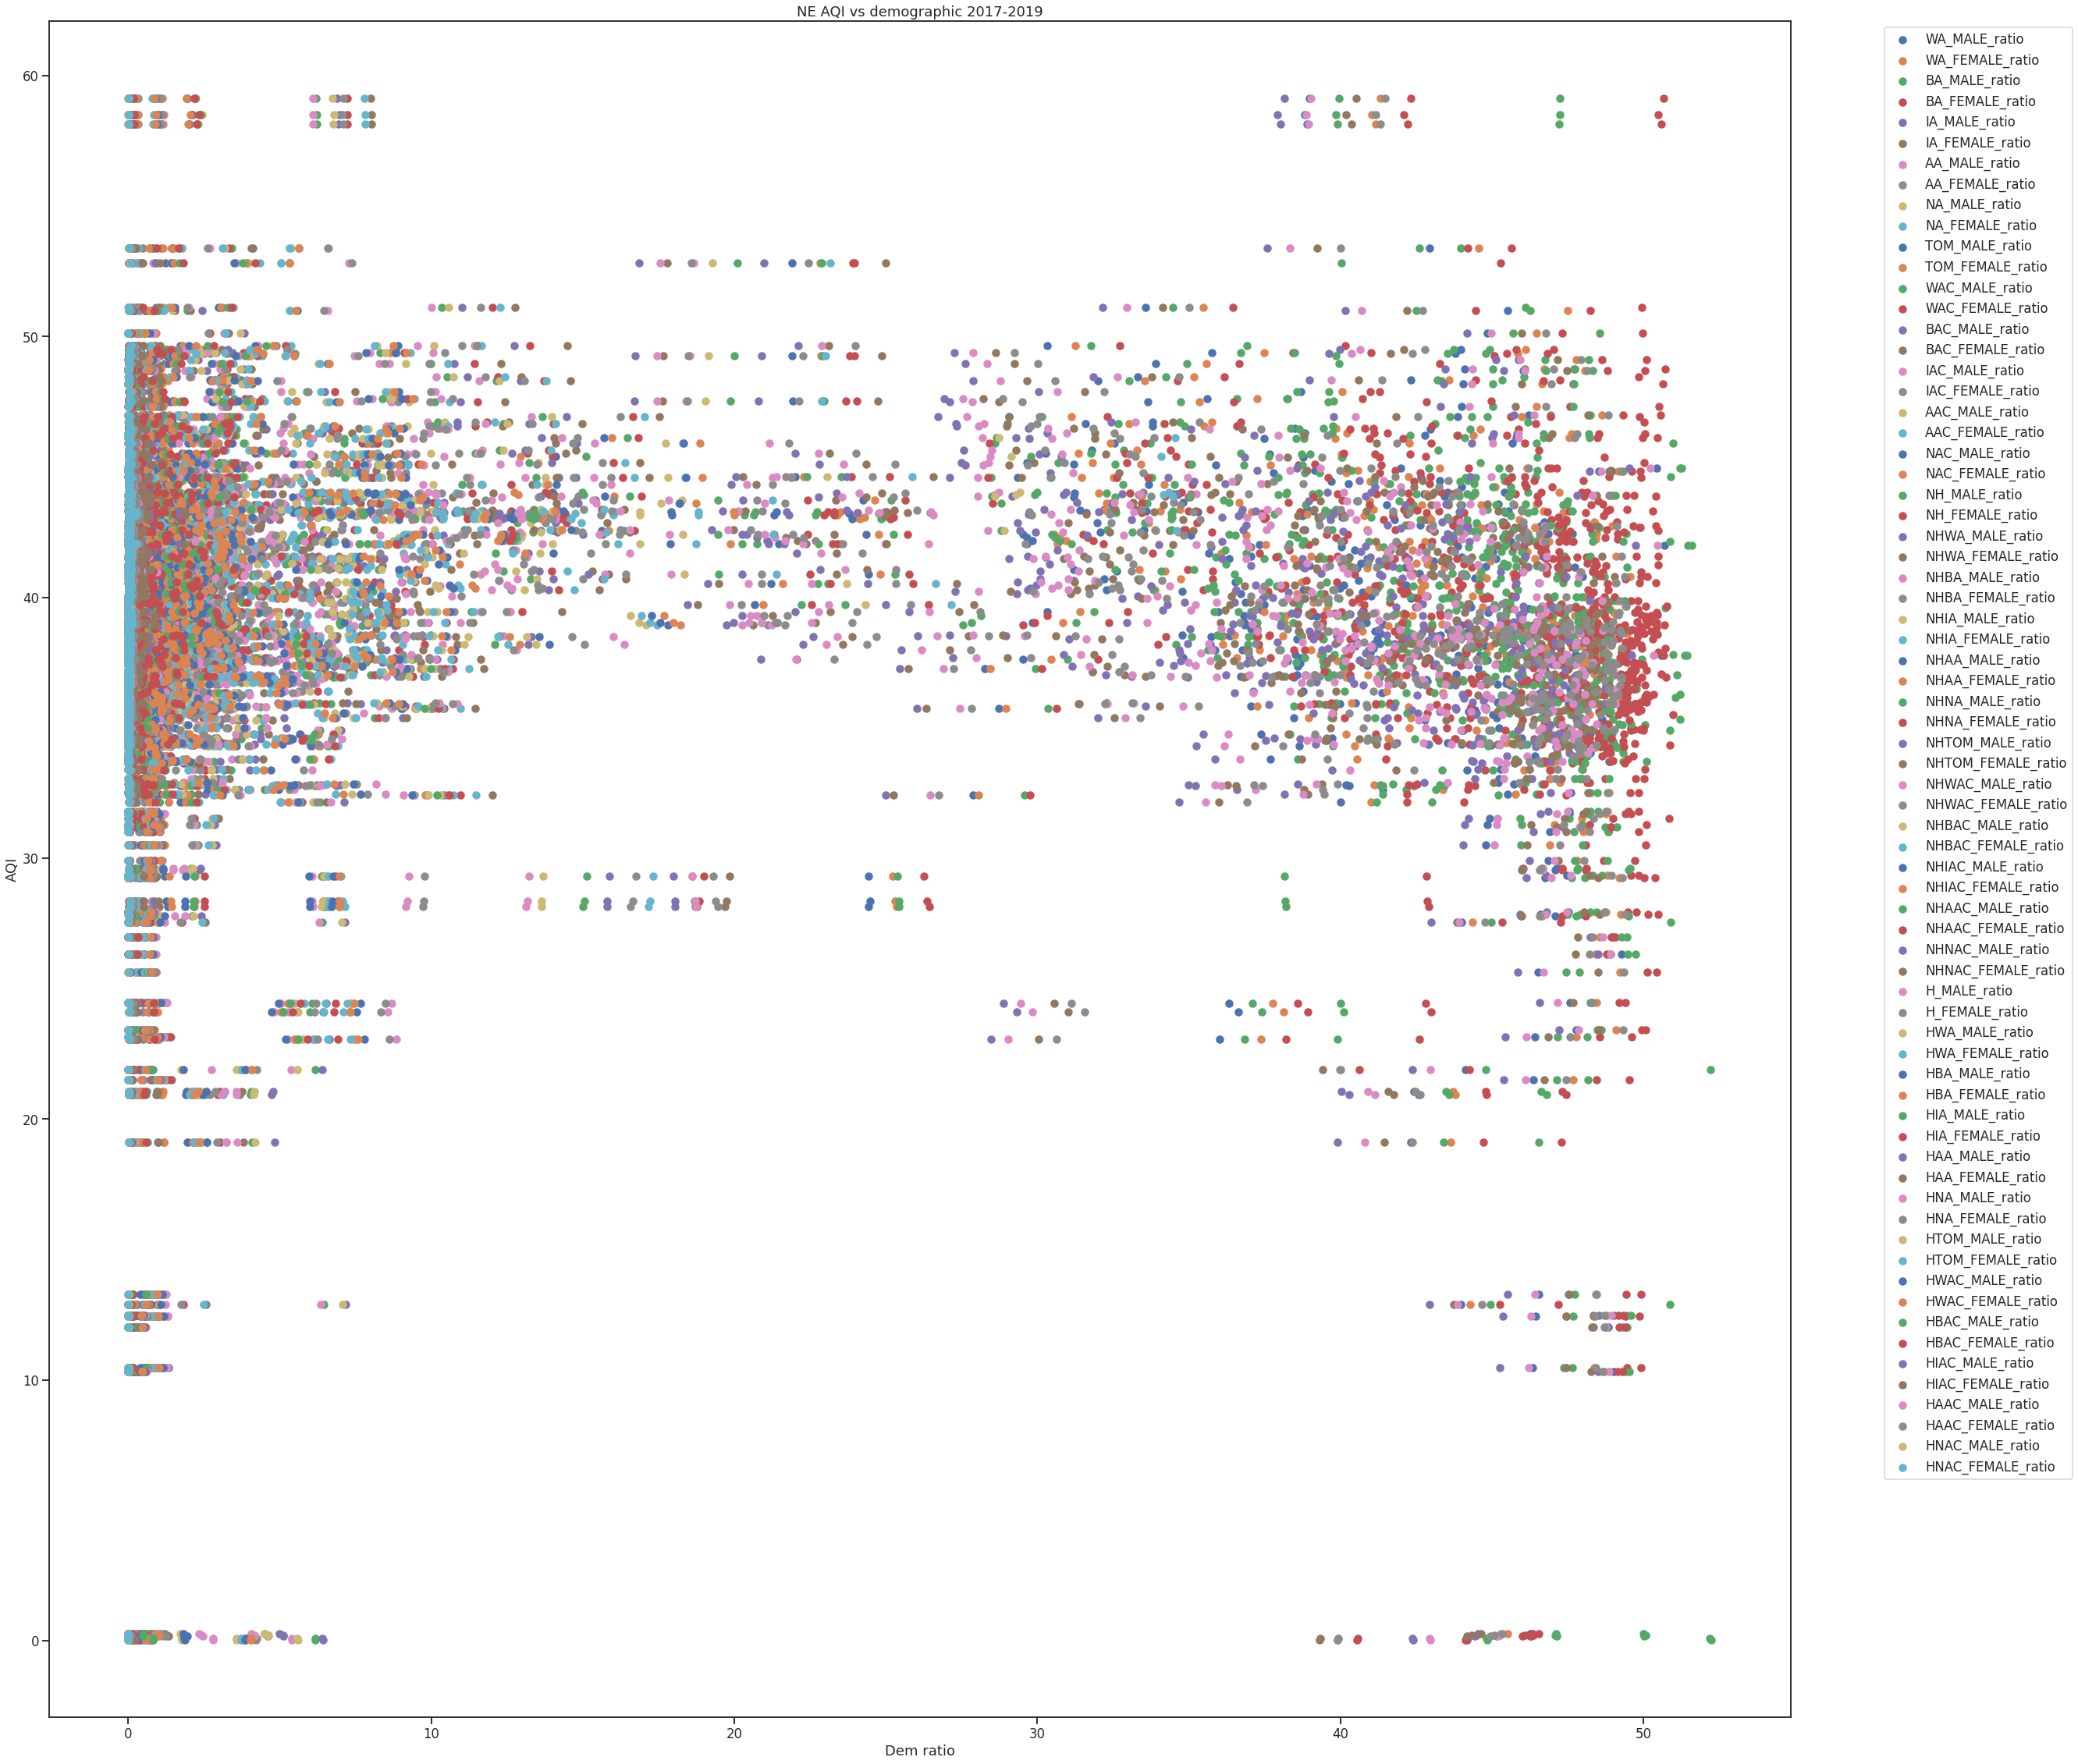

In [47]:
demographic = NE_aqi_dem_2017_2019.columns.values[21:]
demographic

fig, ax = plt.subplots(figsize=(40,40))

plt.title('NE AQI vs demographic 2017-2019')
plt.xlabel('Dem ratio')
plt.ylabel('AQI')
for dem in demographic:
    ax.scatter(NE_avg_aqi_dem_2017_2019[dem], NE_avg_aqi_dem_2017_2019['AQI'], label=dem)

ax.legend(bbox_to_anchor=(1.05,1))
plt.show()



In [48]:
## each horizontal line is one county and it shows many different demographics



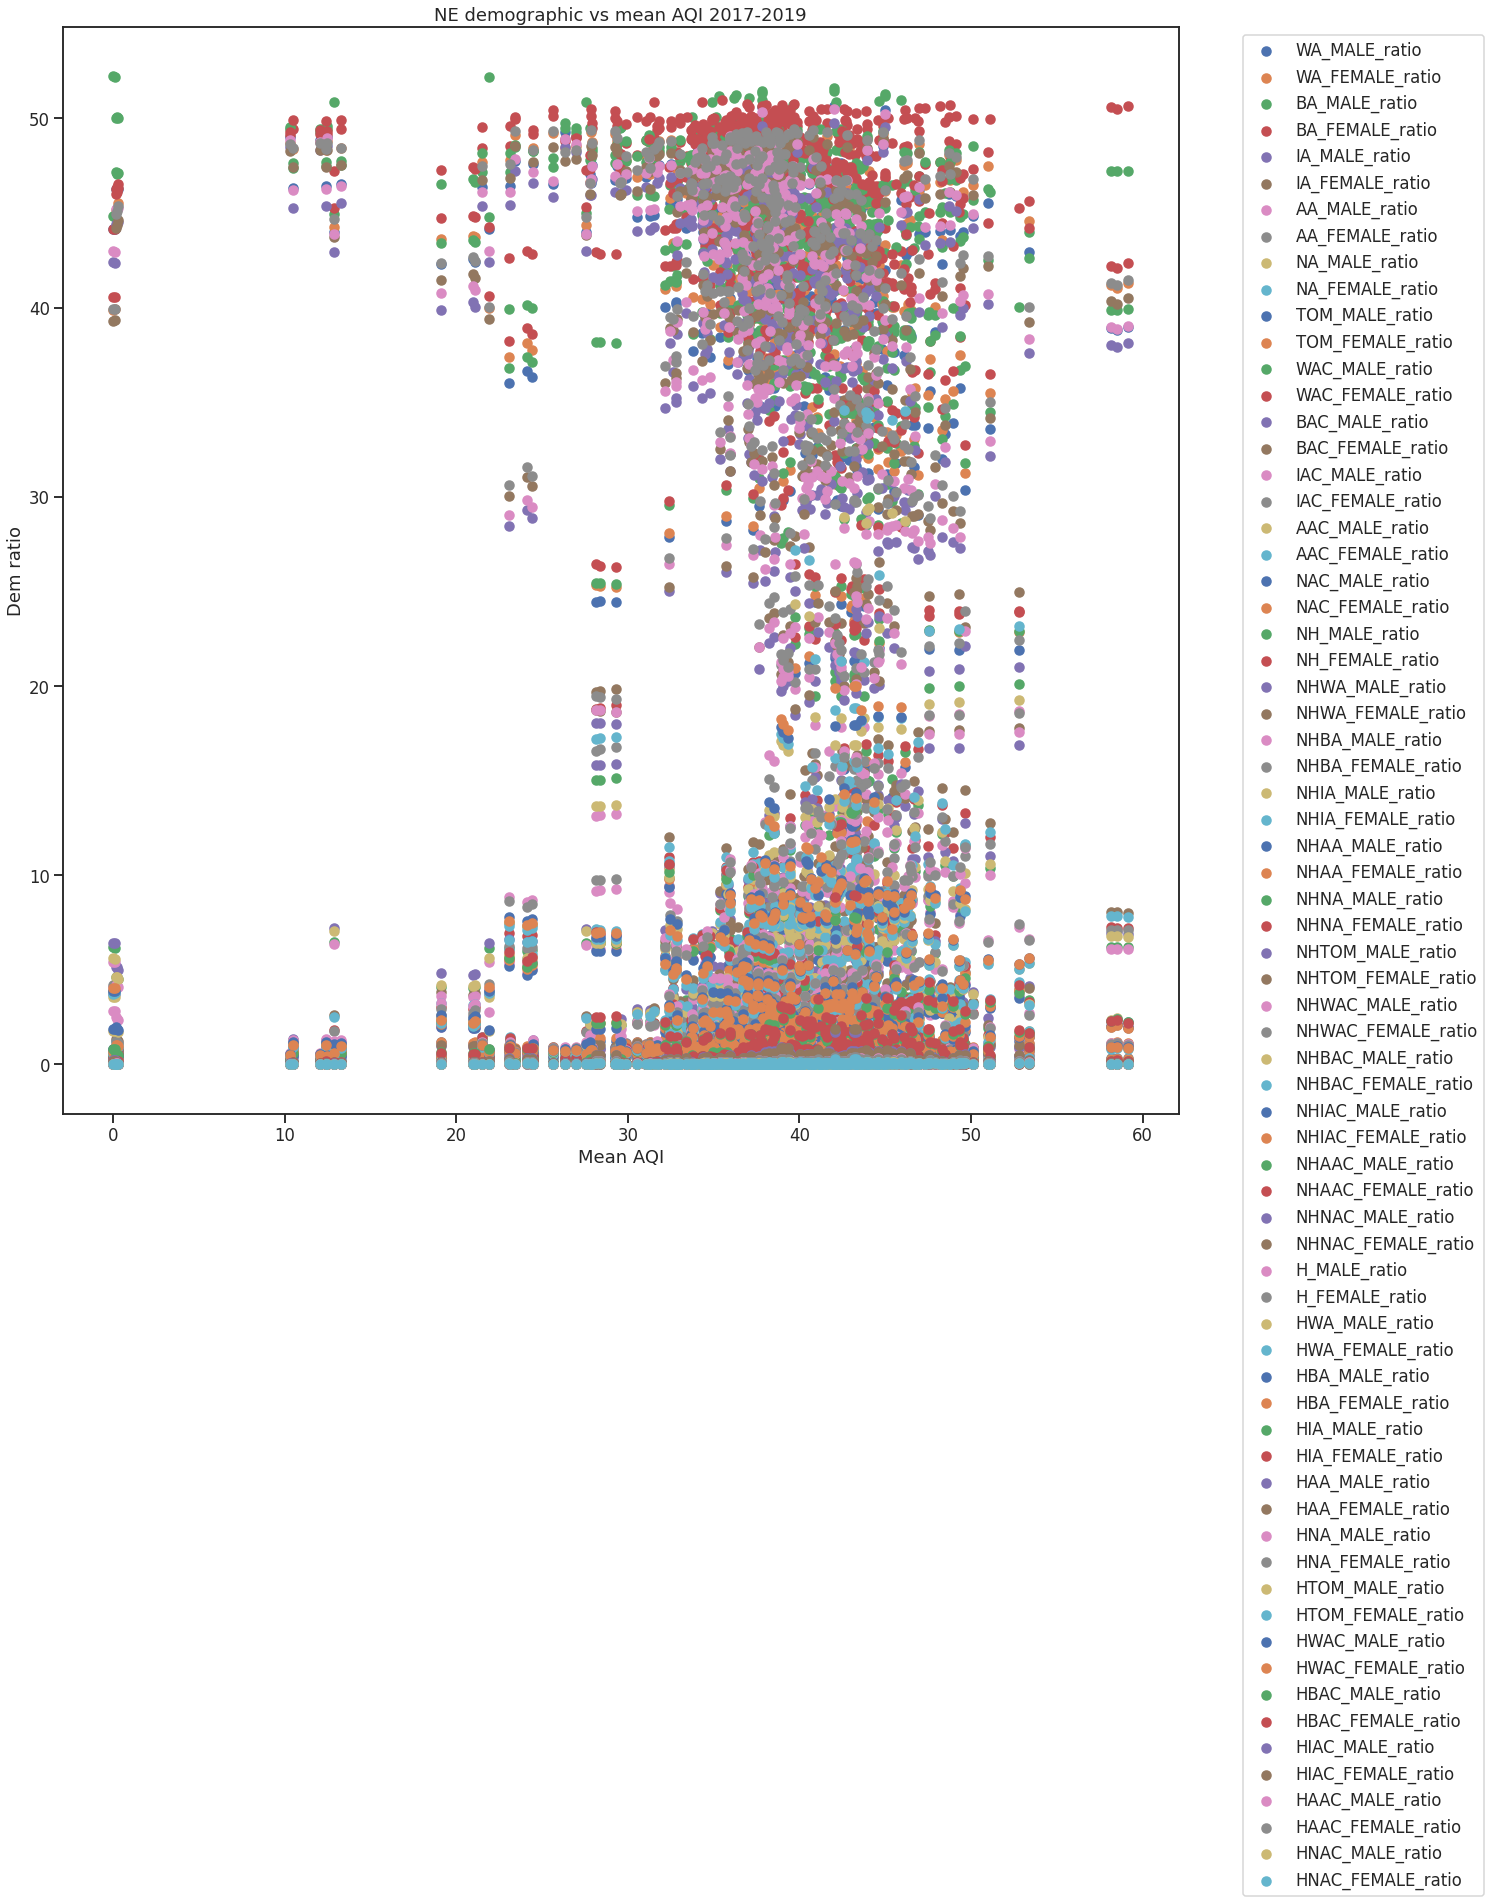

In [49]:
# flip the axis comparison

fig, ax = plt.subplots(figsize=(20,20))

plt.title('NE demographic vs mean AQI 2017-2019')
plt.xlabel('Mean AQI')
plt.ylabel('Dem ratio')
for dem in demographic:
    ax.scatter(NE_avg_aqi_dem_2017_2019['AQI'], NE_avg_aqi_dem_2017_2019[dem], label=dem)

ax.legend(bbox_to_anchor=(1.05,1))
plt.show()

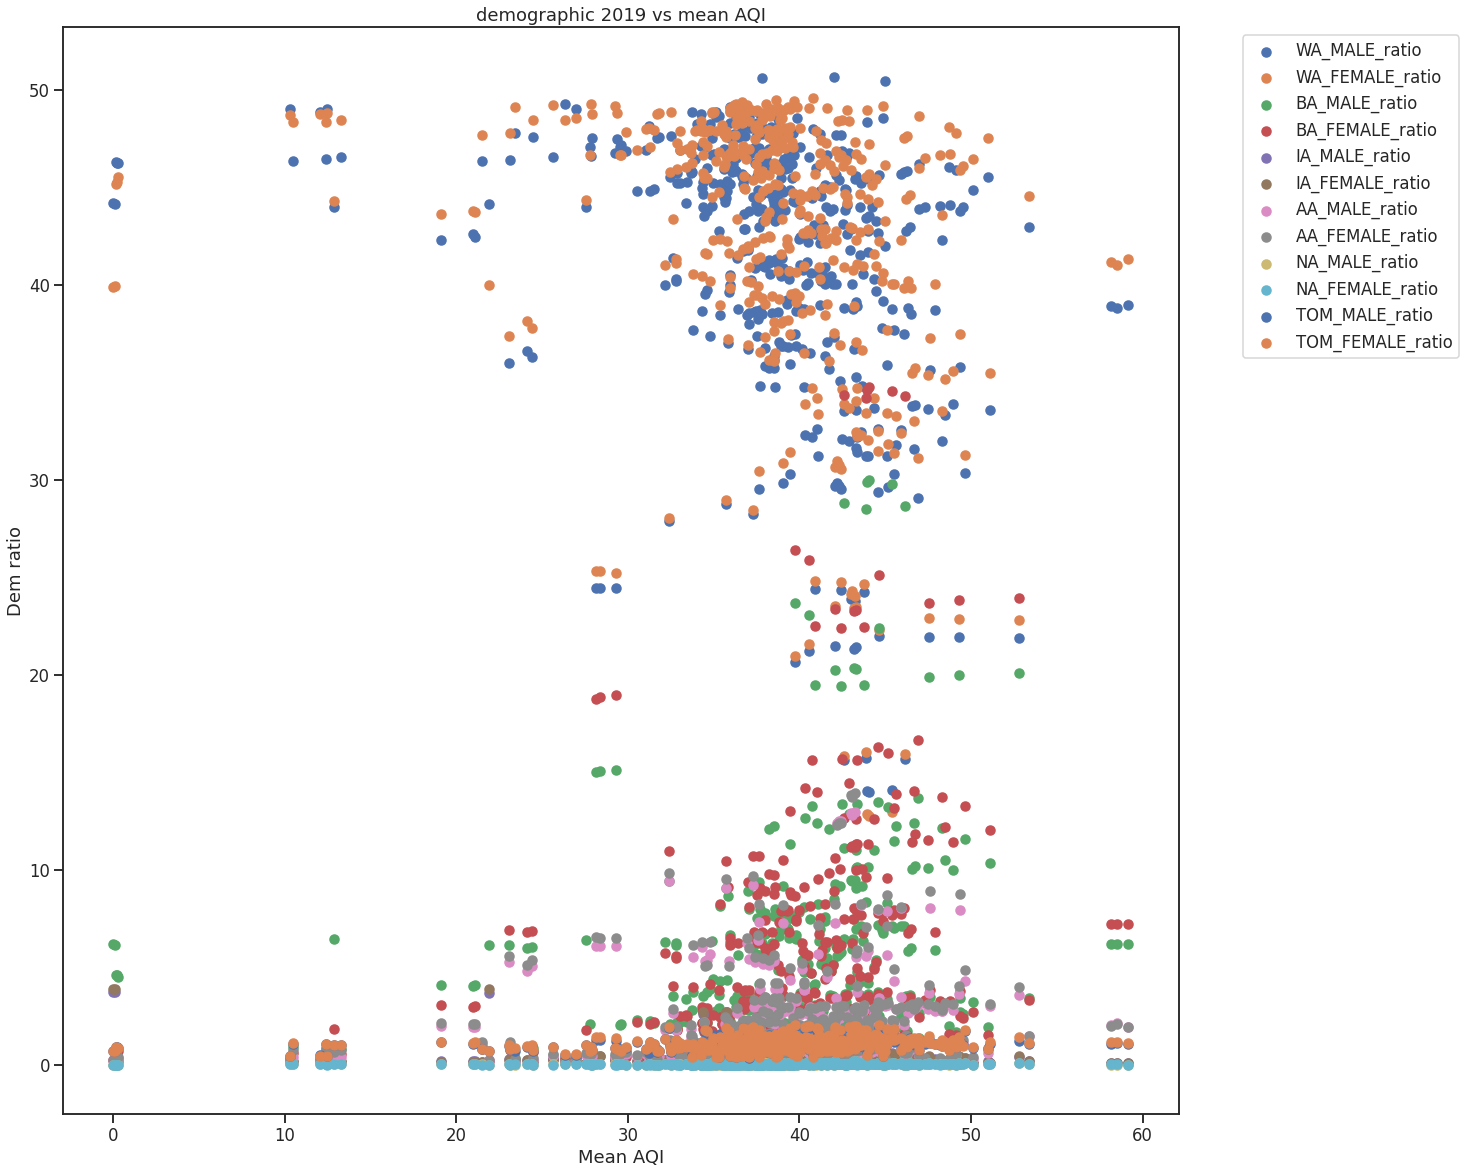

In [50]:
demographic_alone_combo = NE_aqi_dem_2017_2019.columns.values[21:33]
demographic_alone_combo

fig, ax = plt.subplots(figsize=(20,20))

plt.title('demographic 2019 vs mean AQI')
plt.xlabel('Mean AQI')
plt.ylabel('Dem ratio')
for dem in demographic_alone_combo:
    ax.scatter(NE_avg_aqi_dem_2017_2019['AQI'], NE_avg_aqi_dem_2017_2019[dem], label=dem)

ax.legend(bbox_to_anchor=(1.05,1))
plt.show()


# scatterplot for each individual demographic in the counties


<ipython-input-51-3ffaea691463>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20,20))


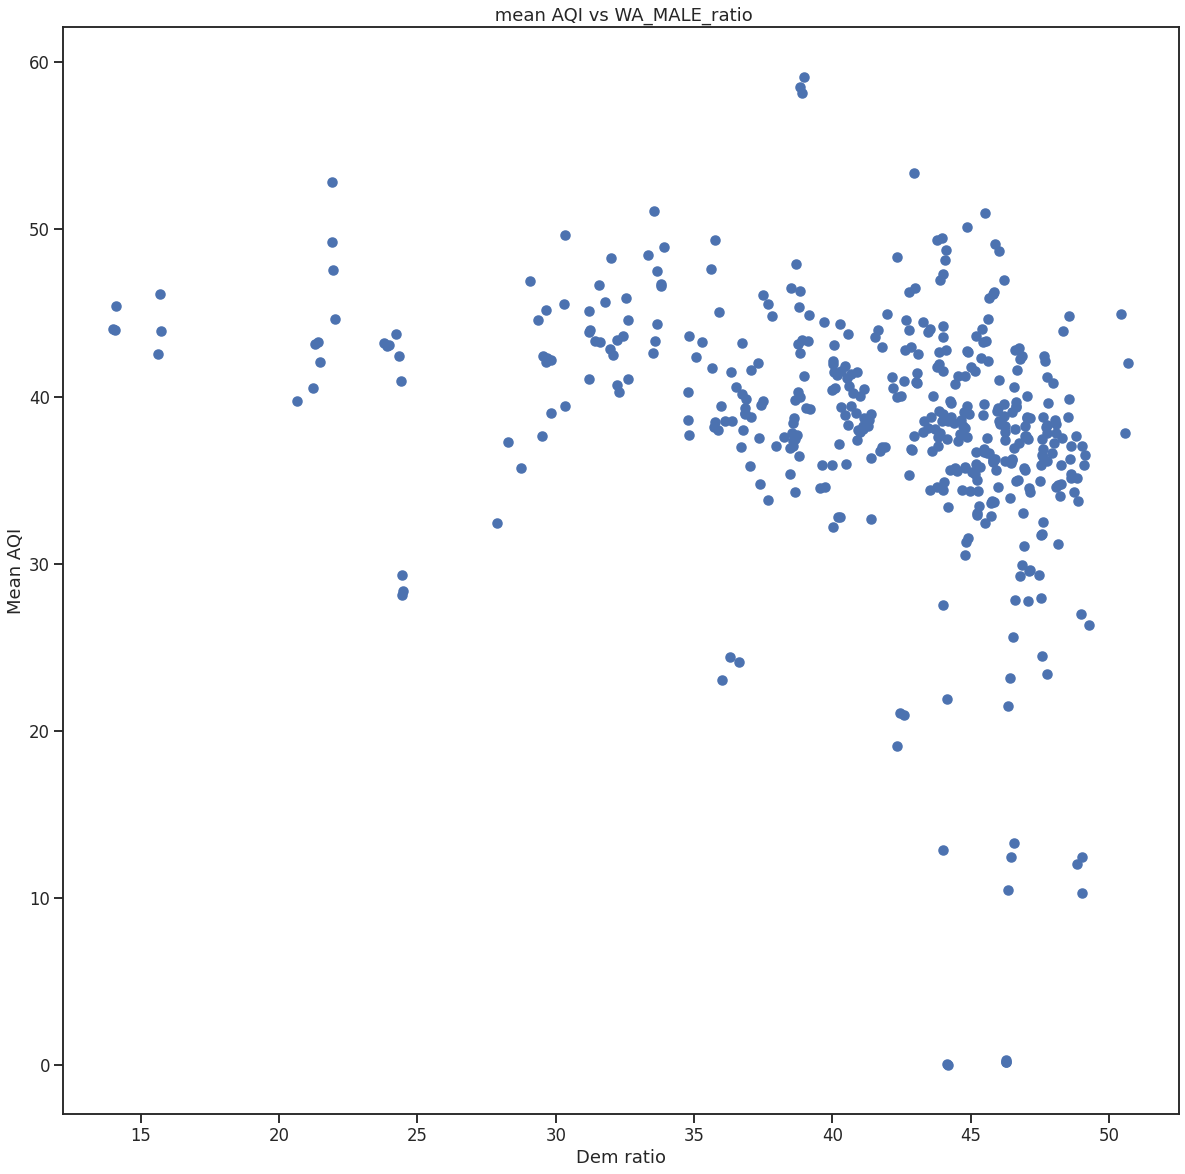

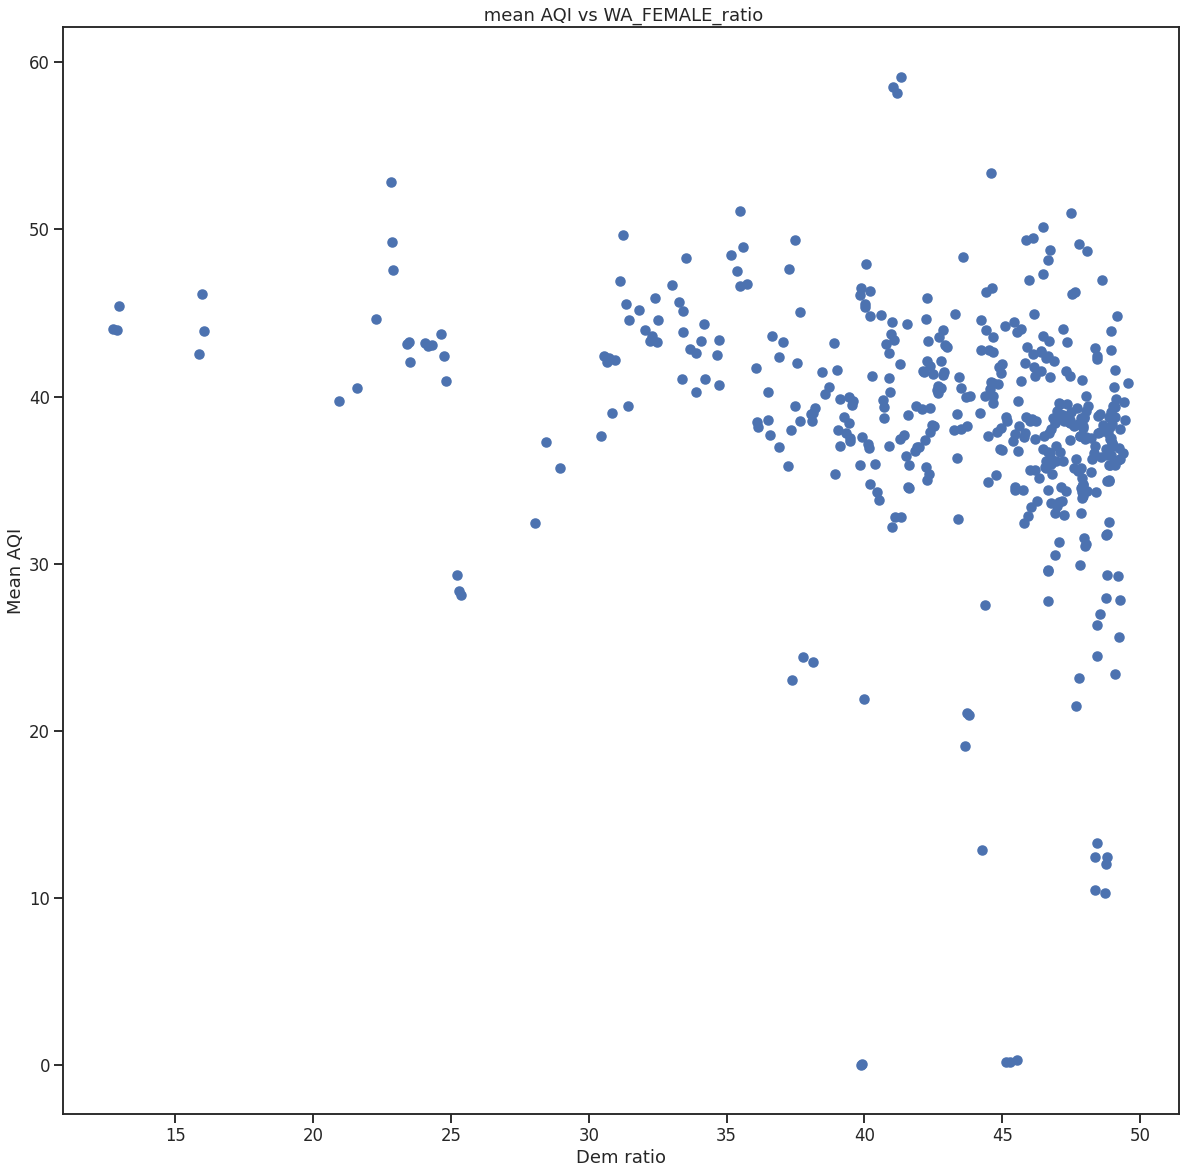

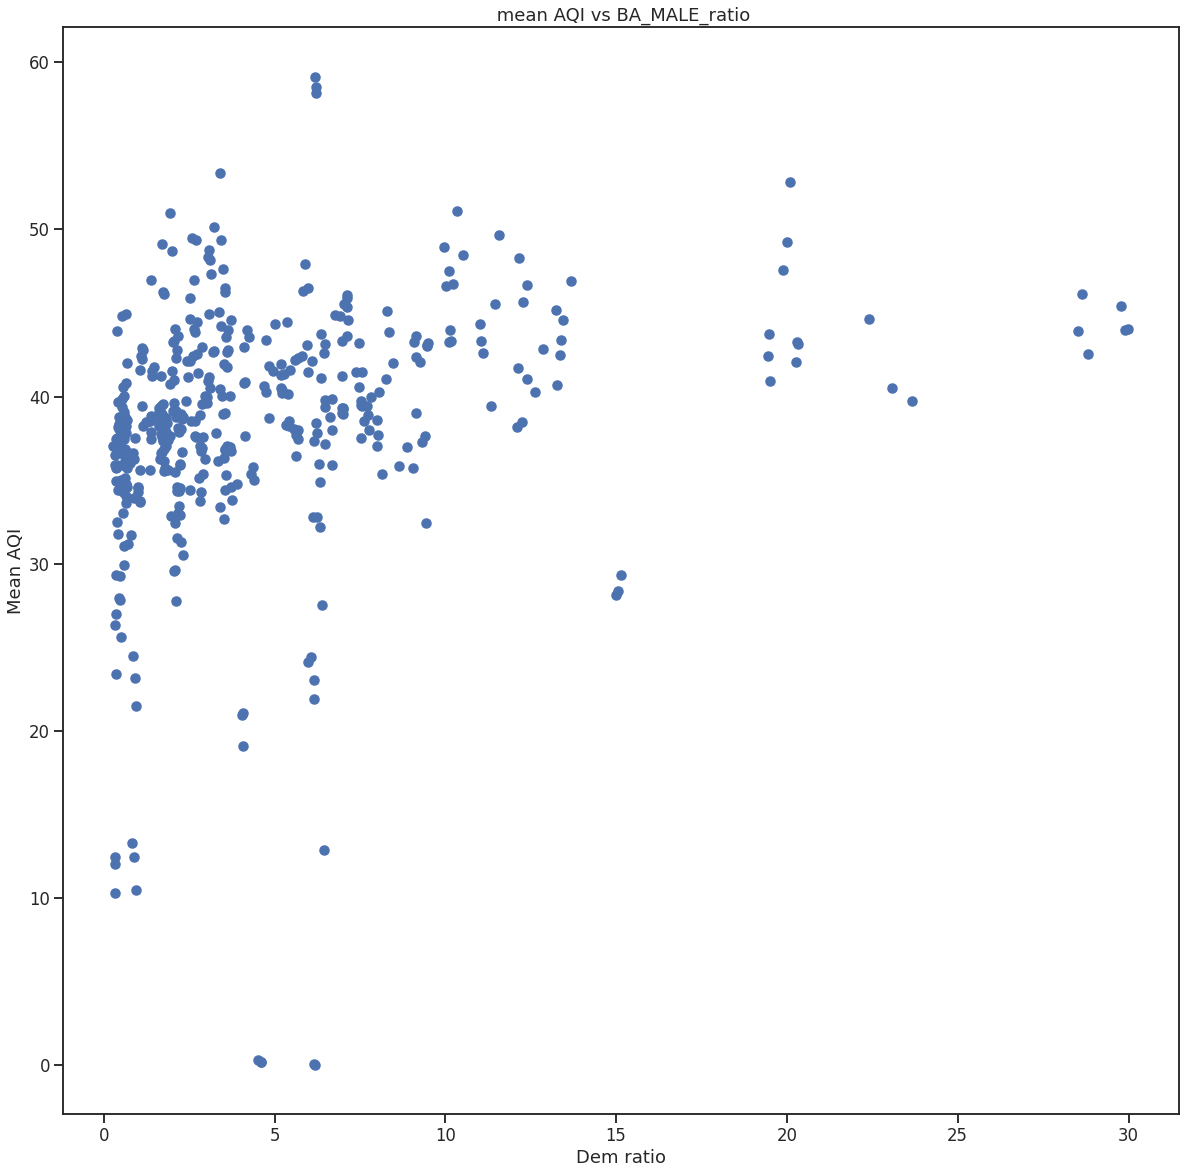

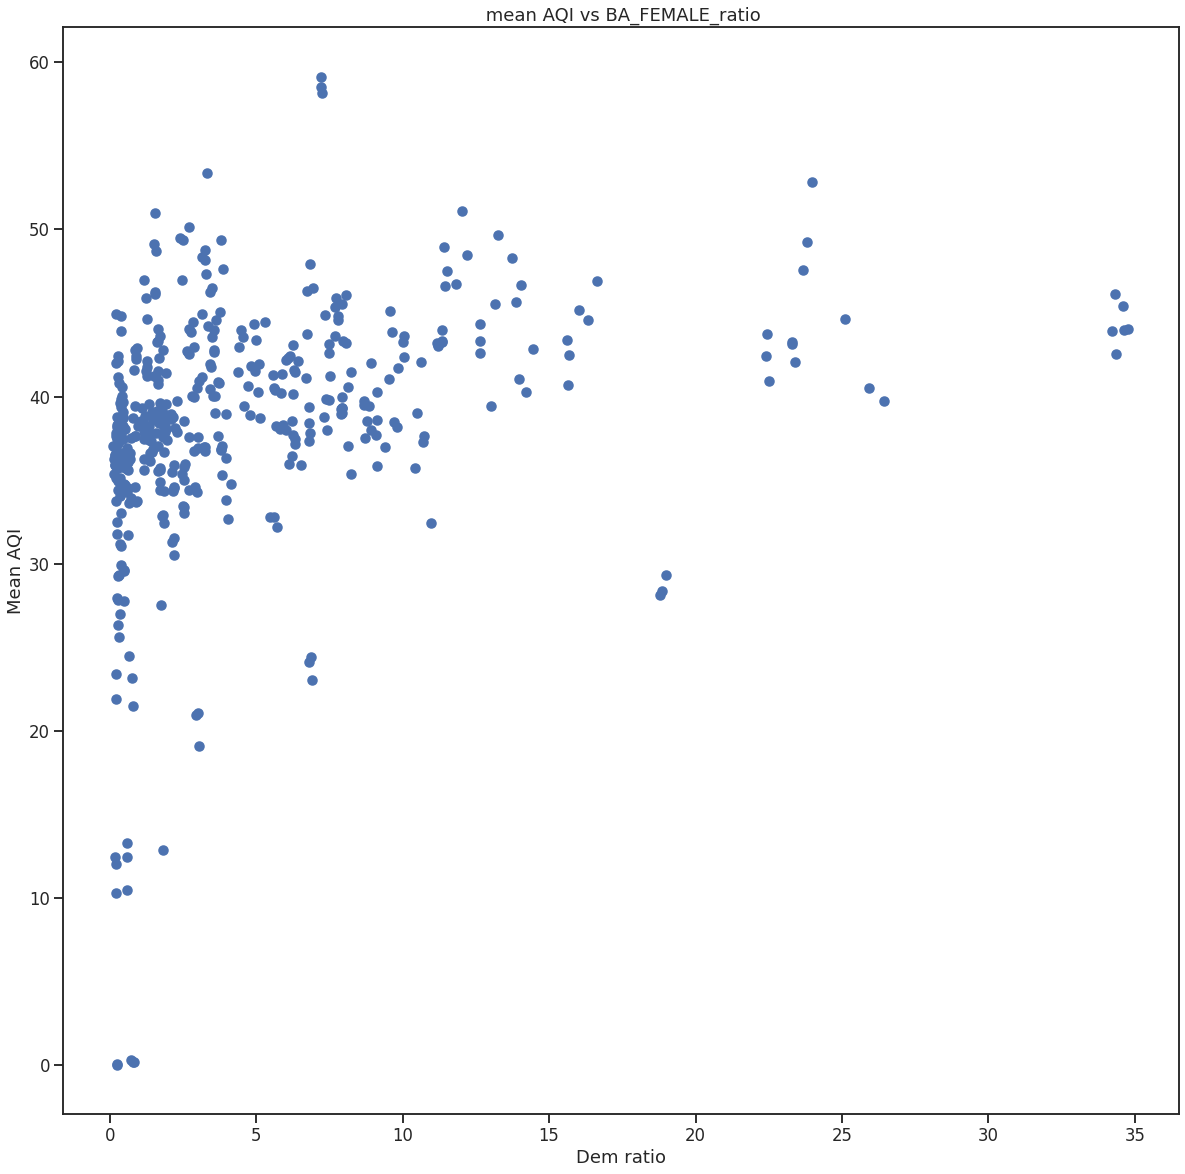

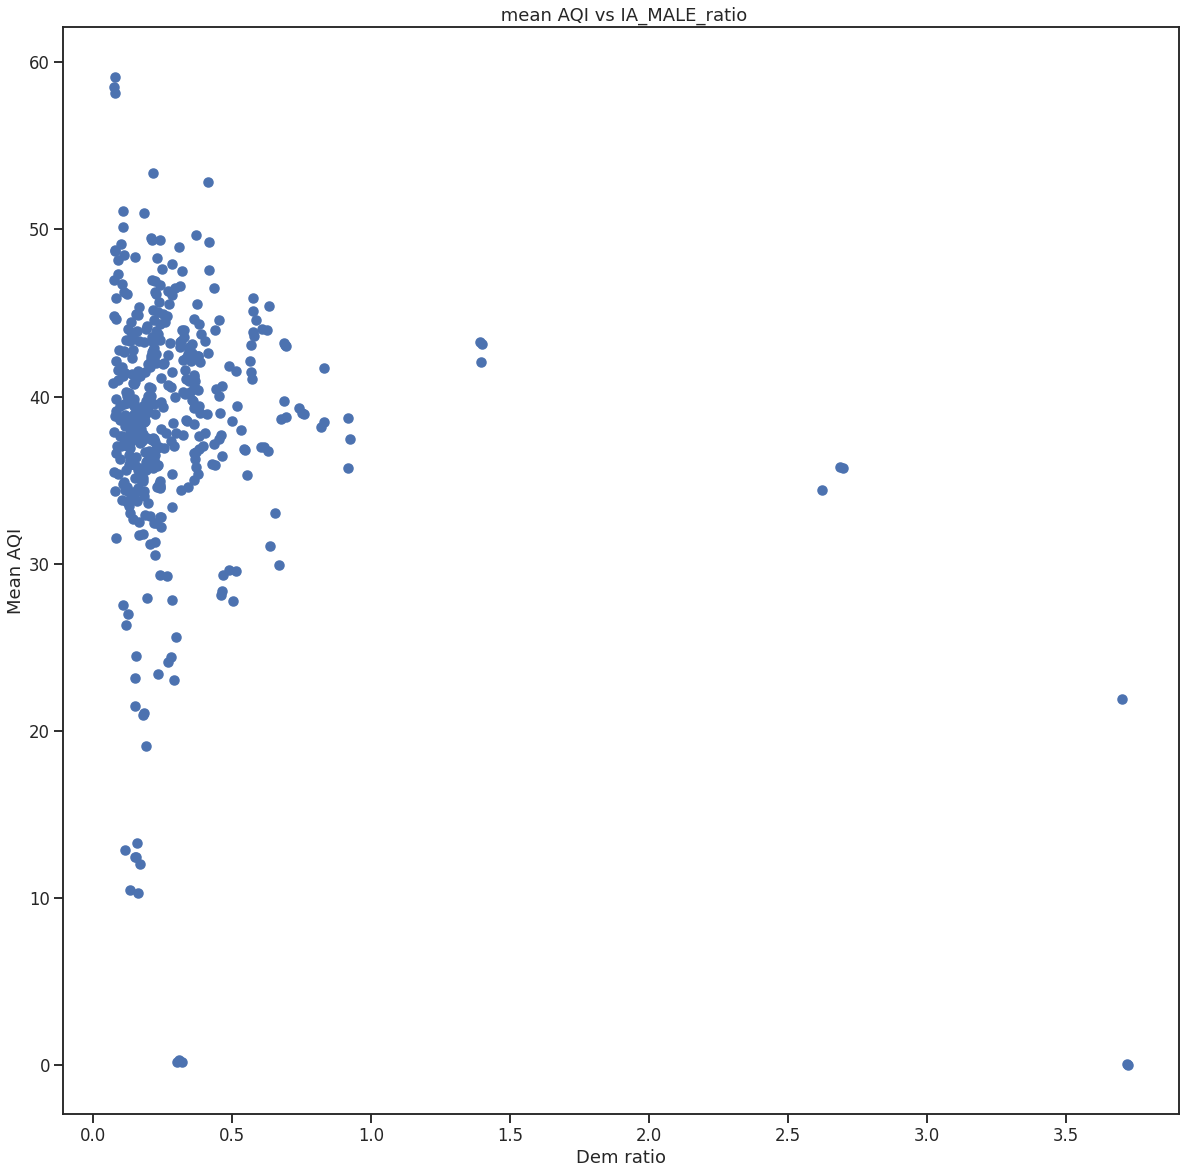

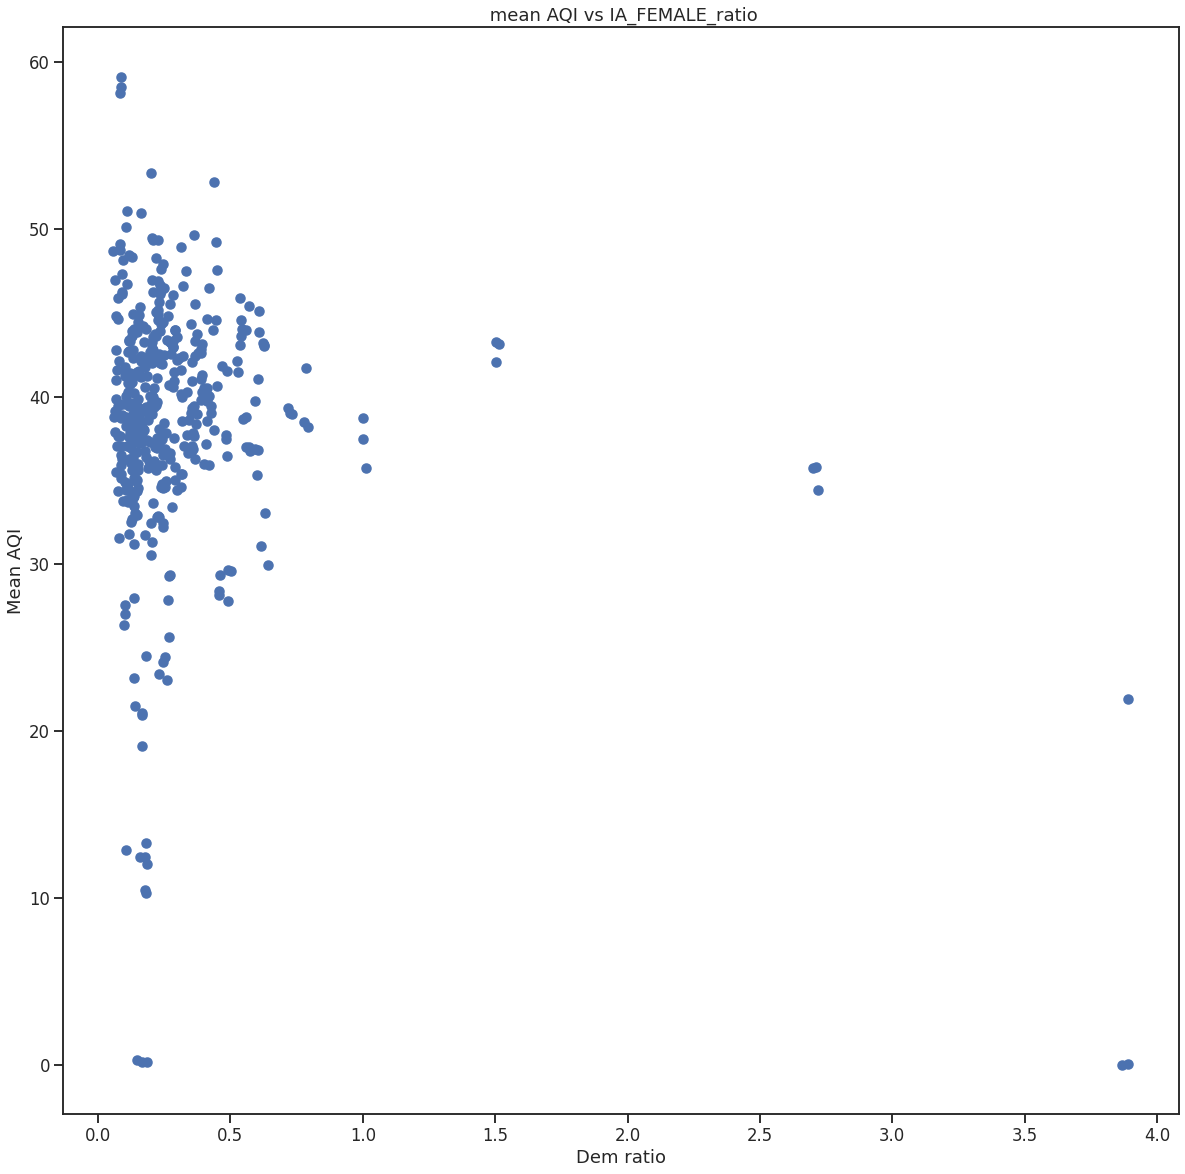

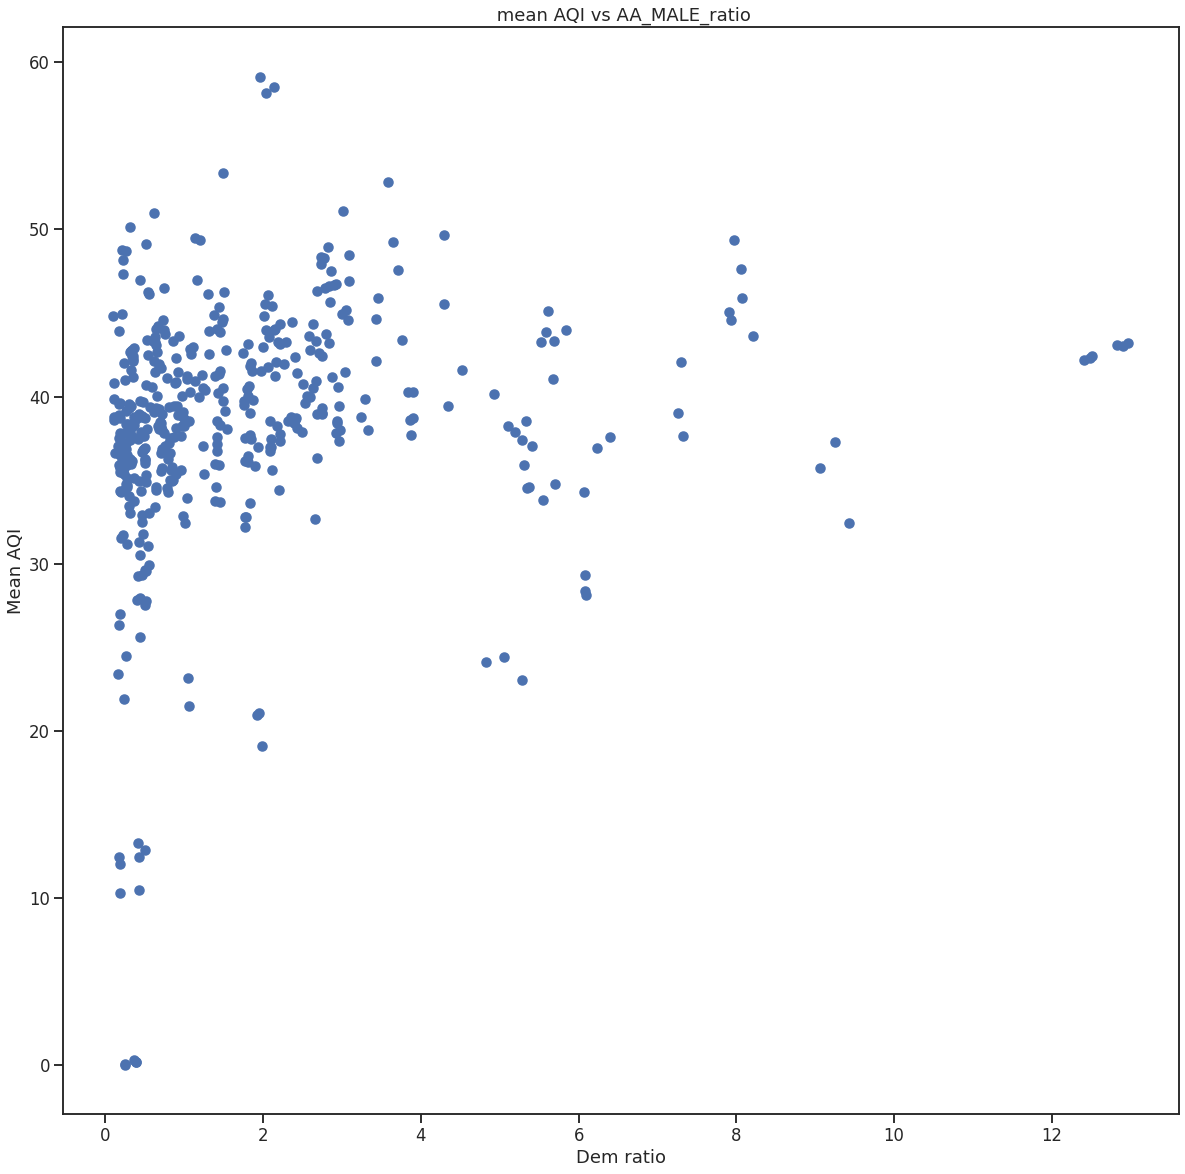

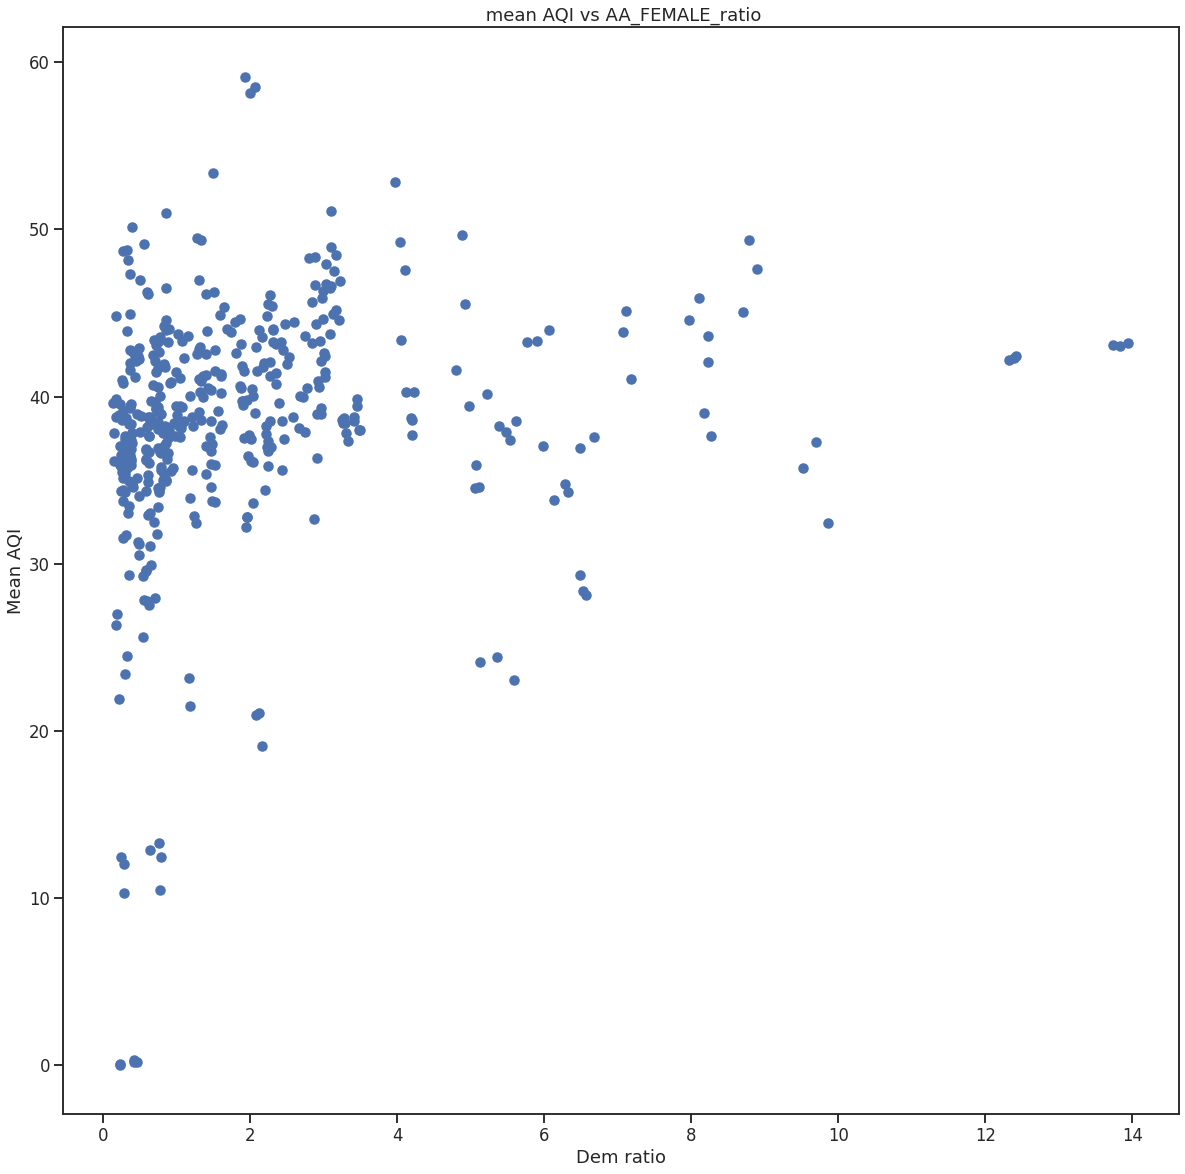

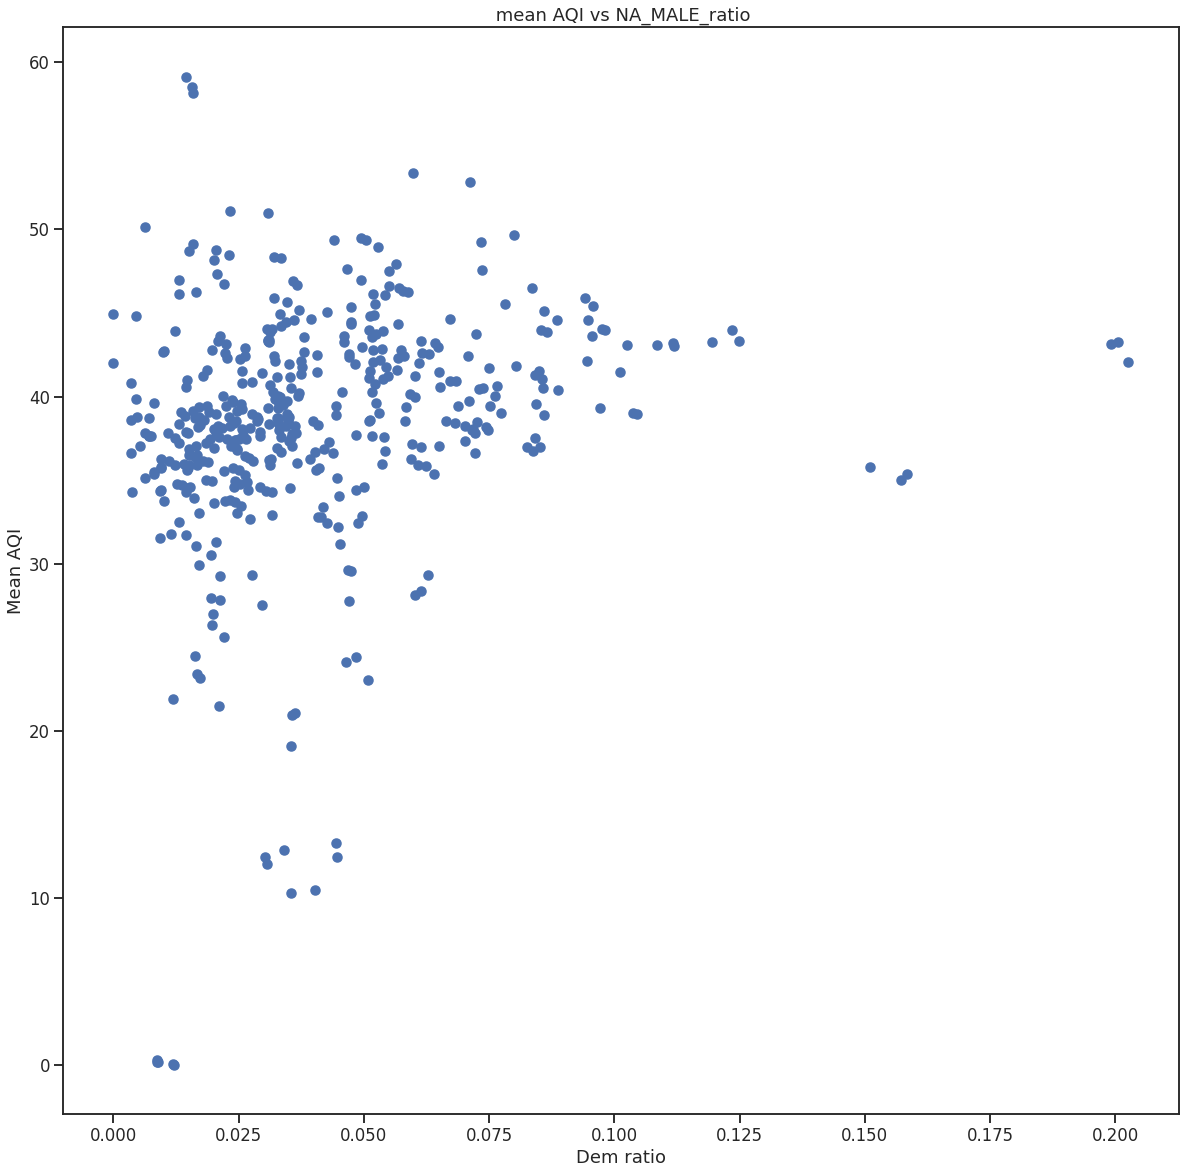

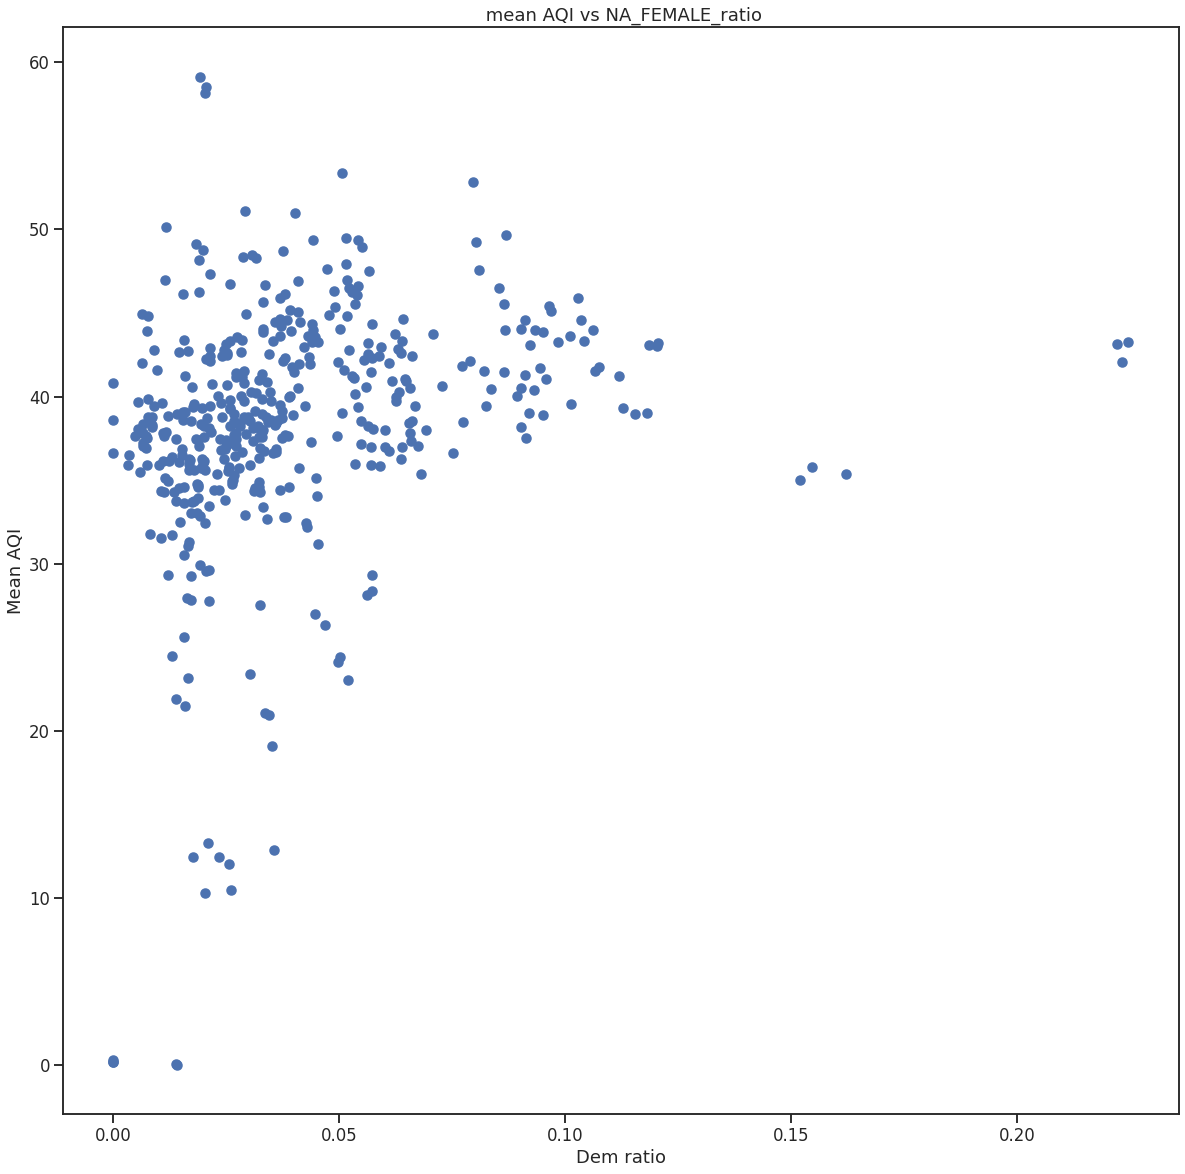

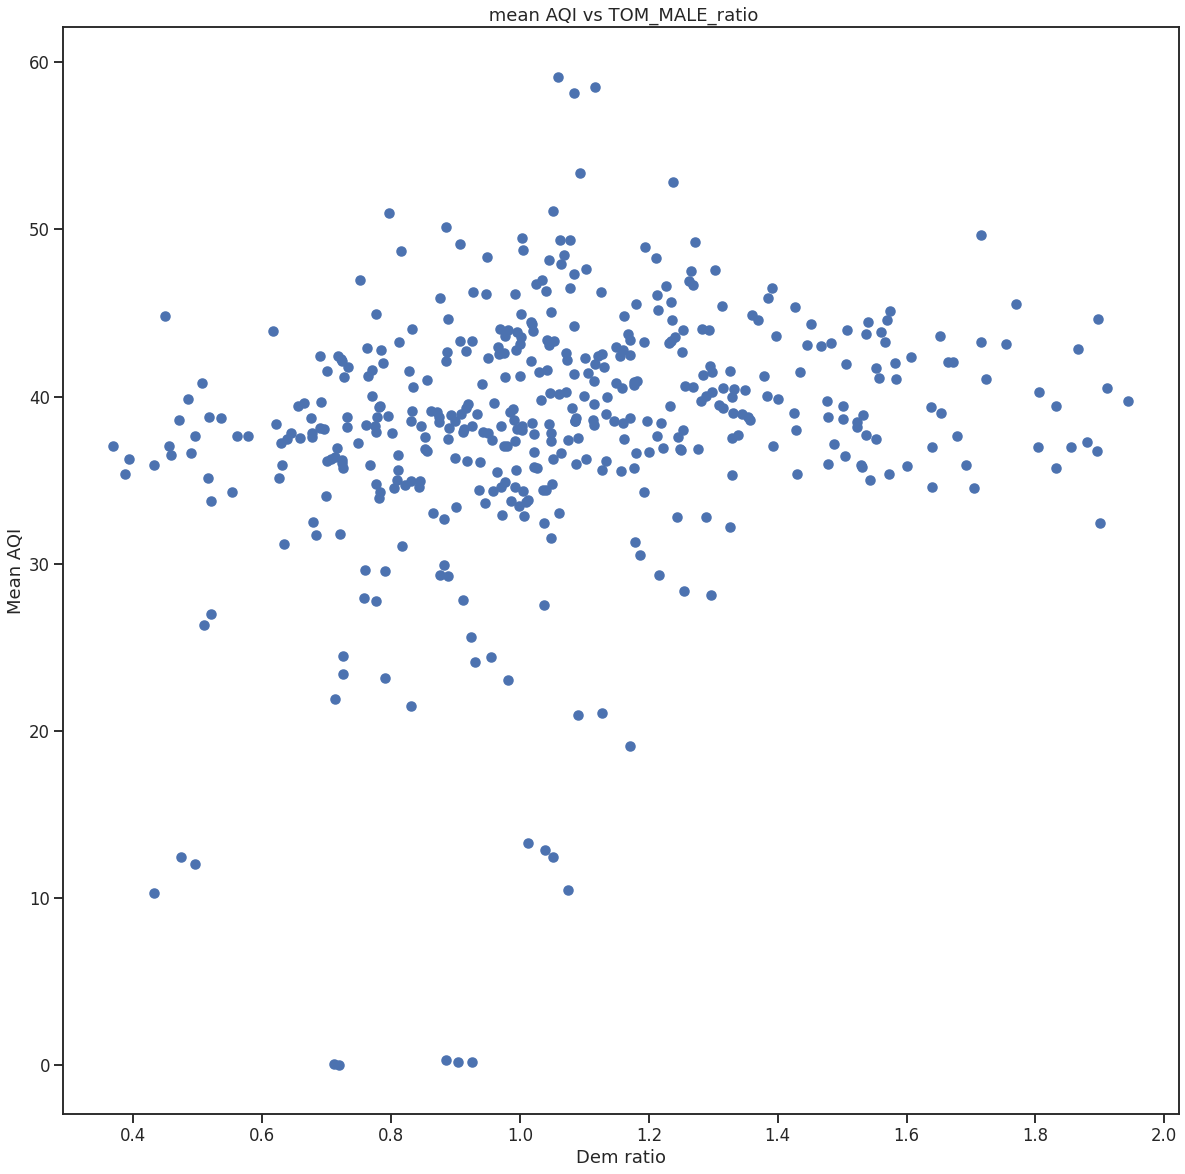

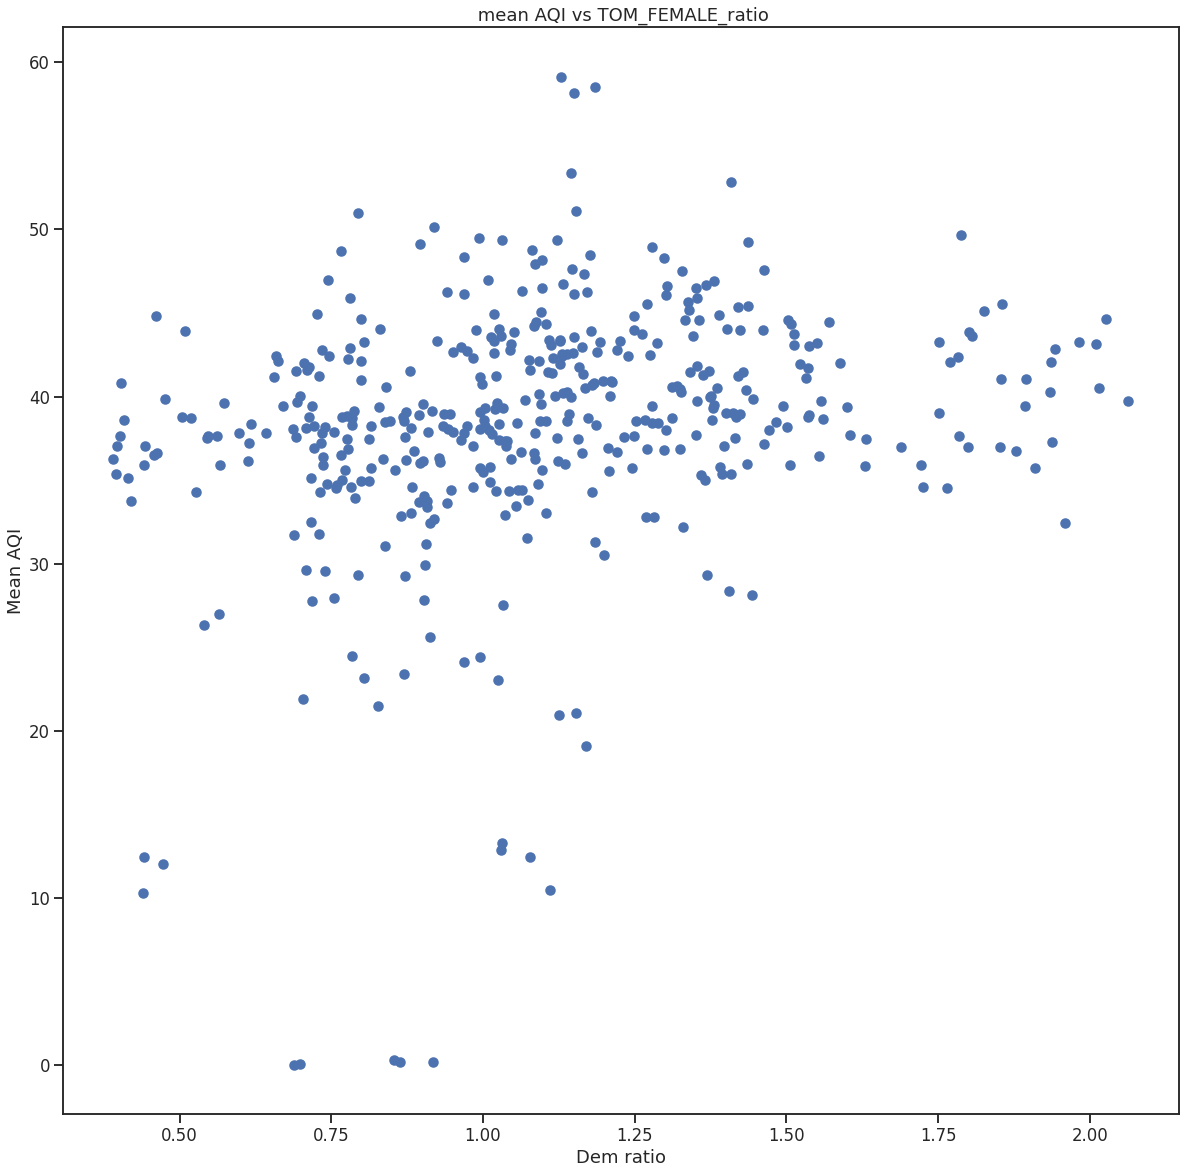

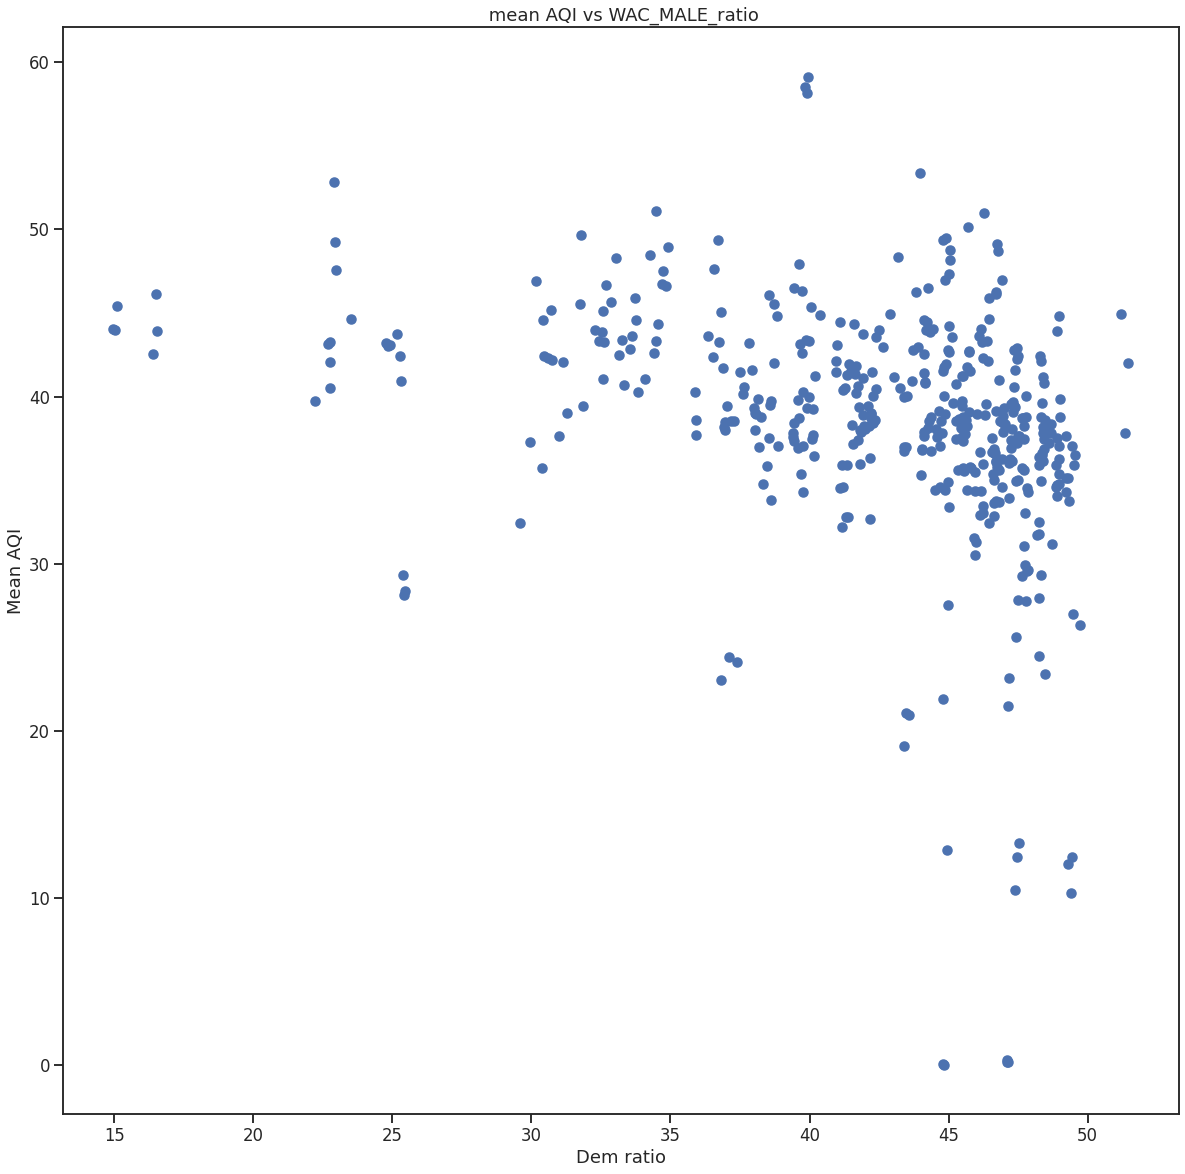

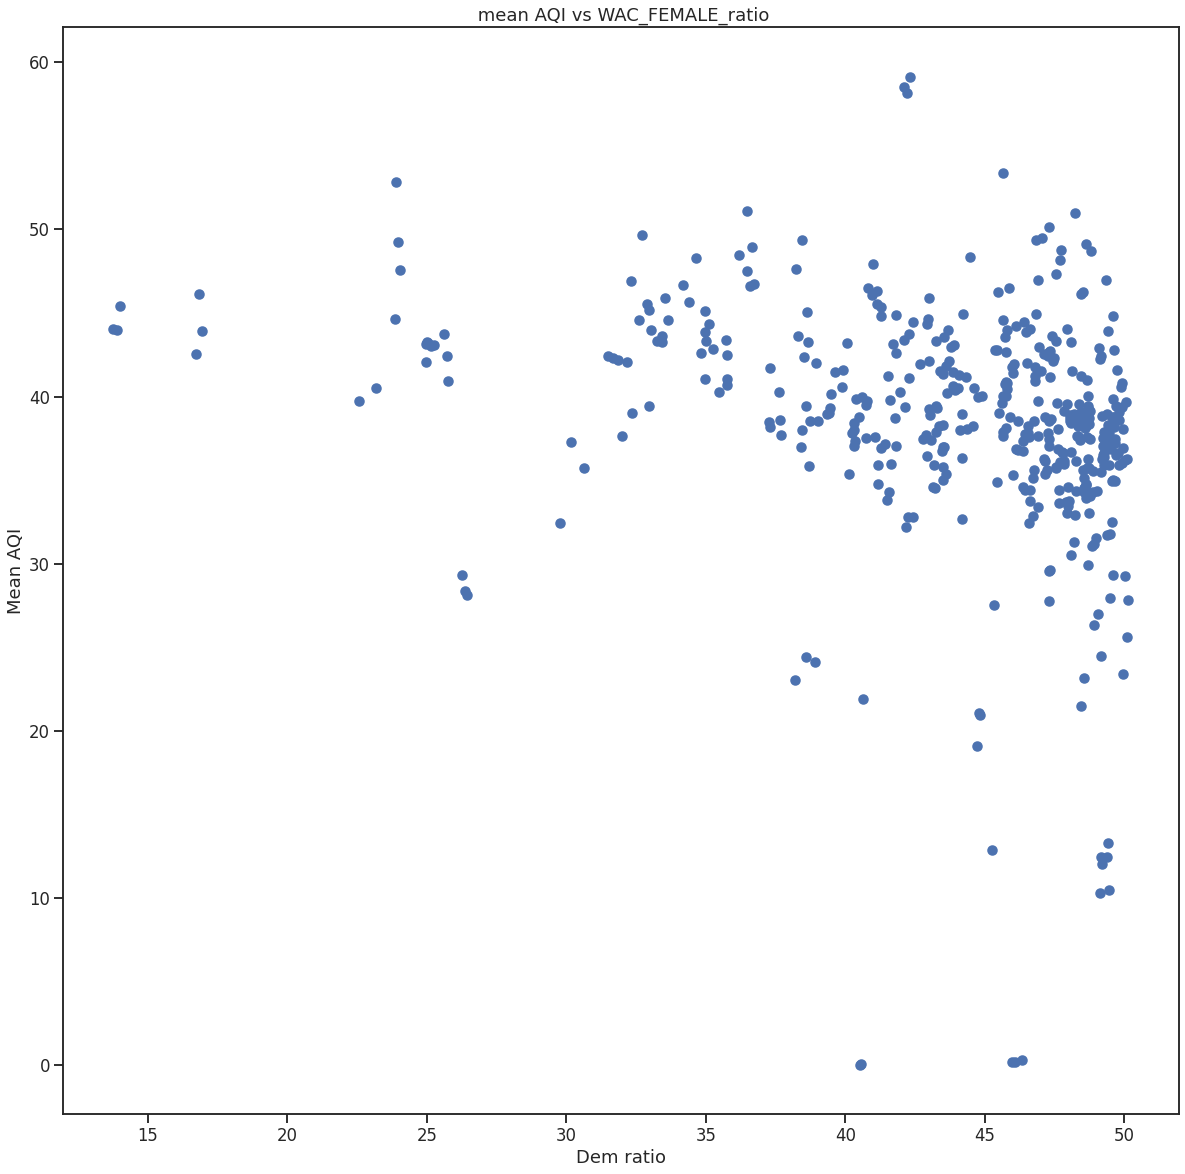

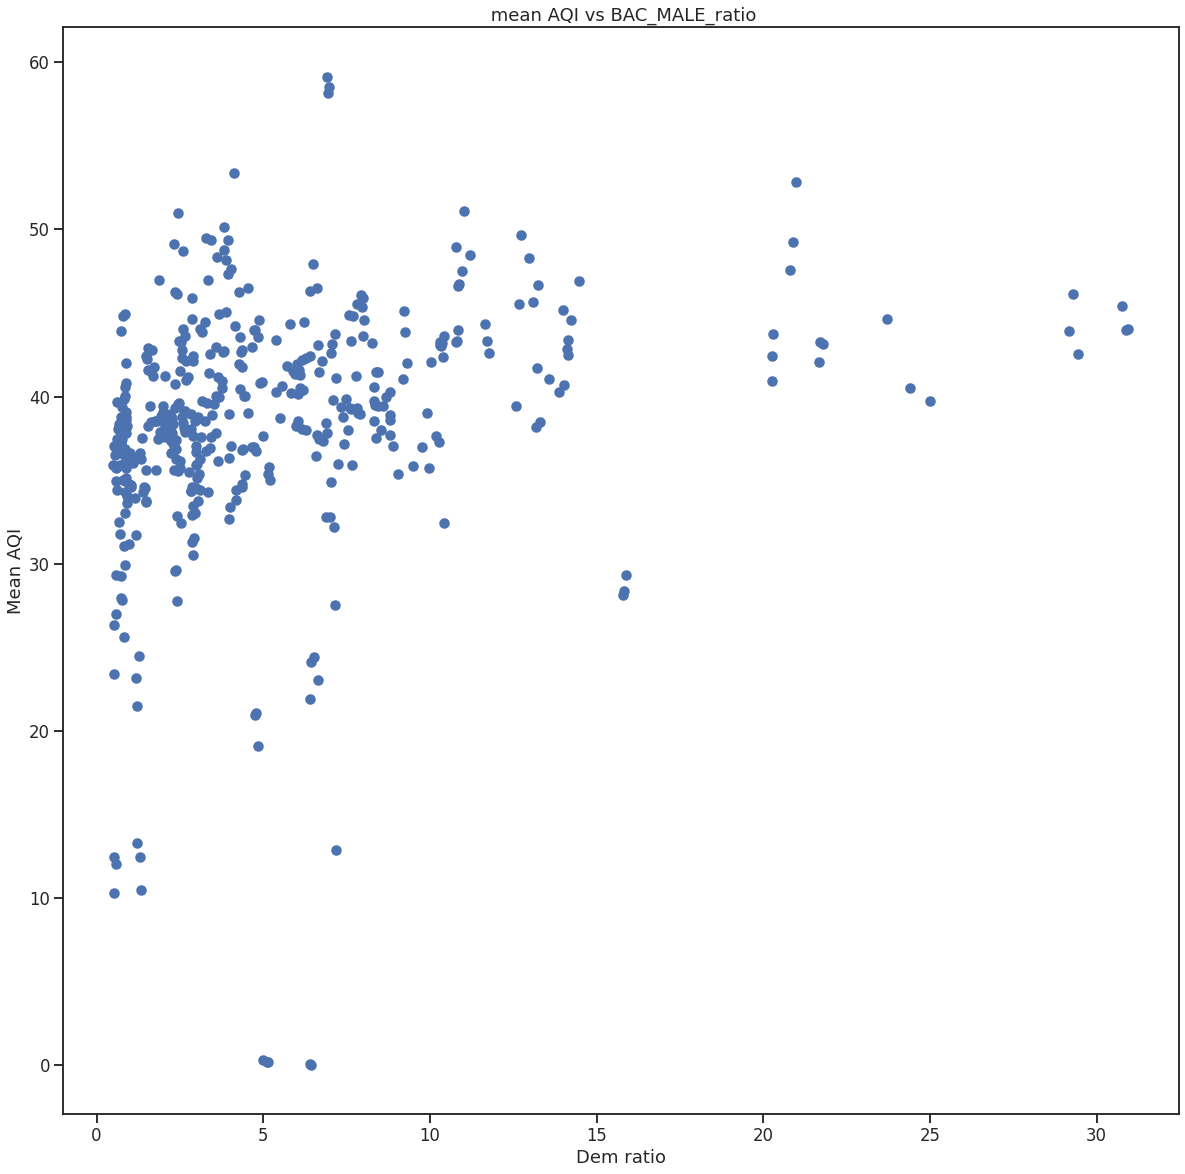

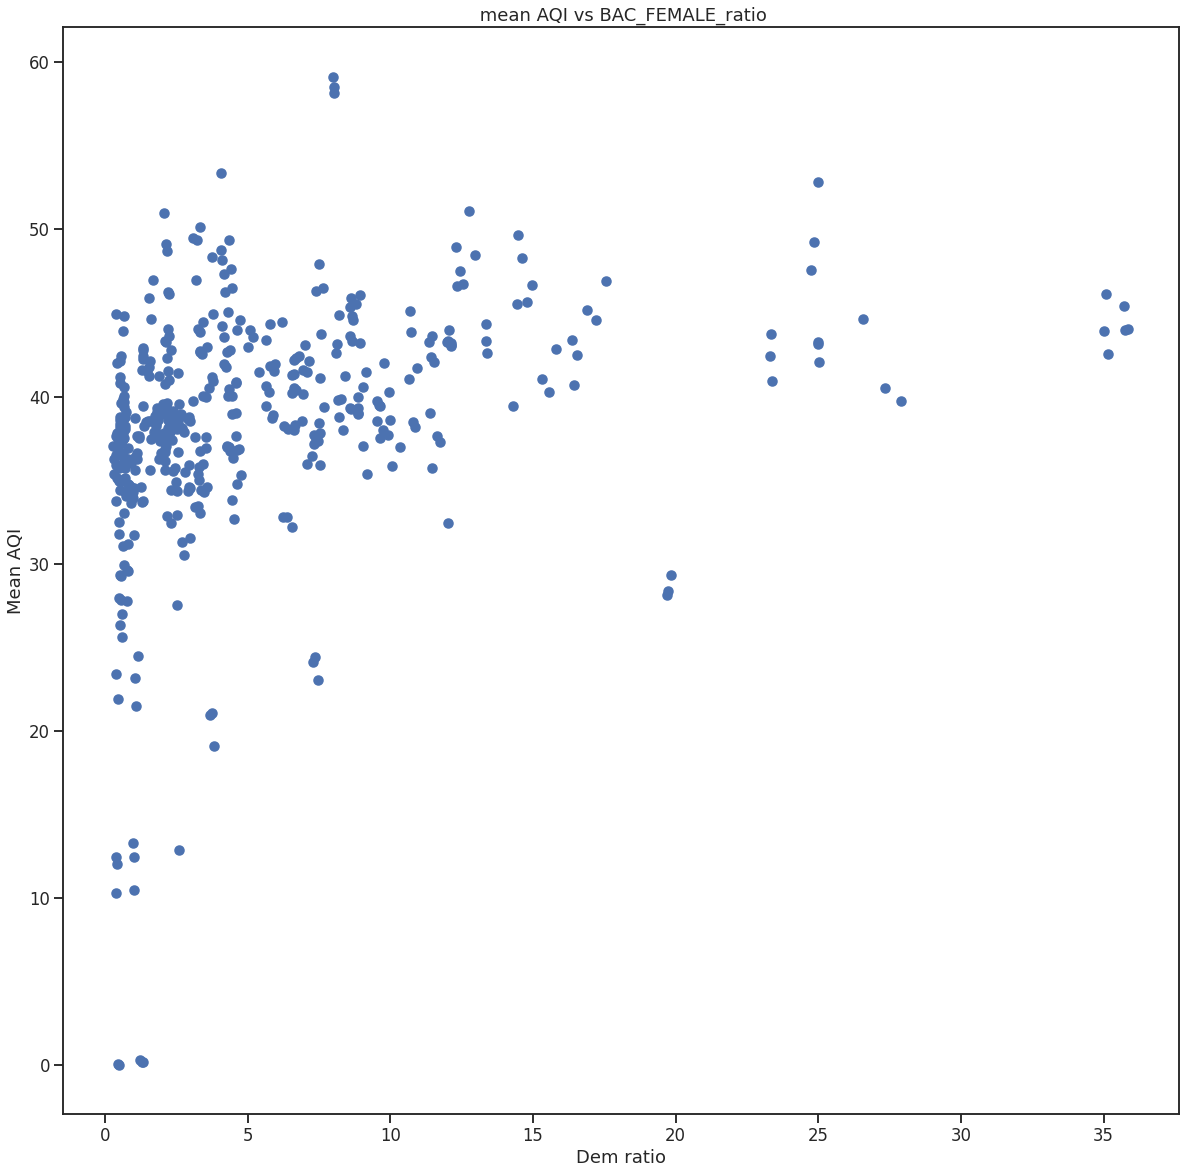

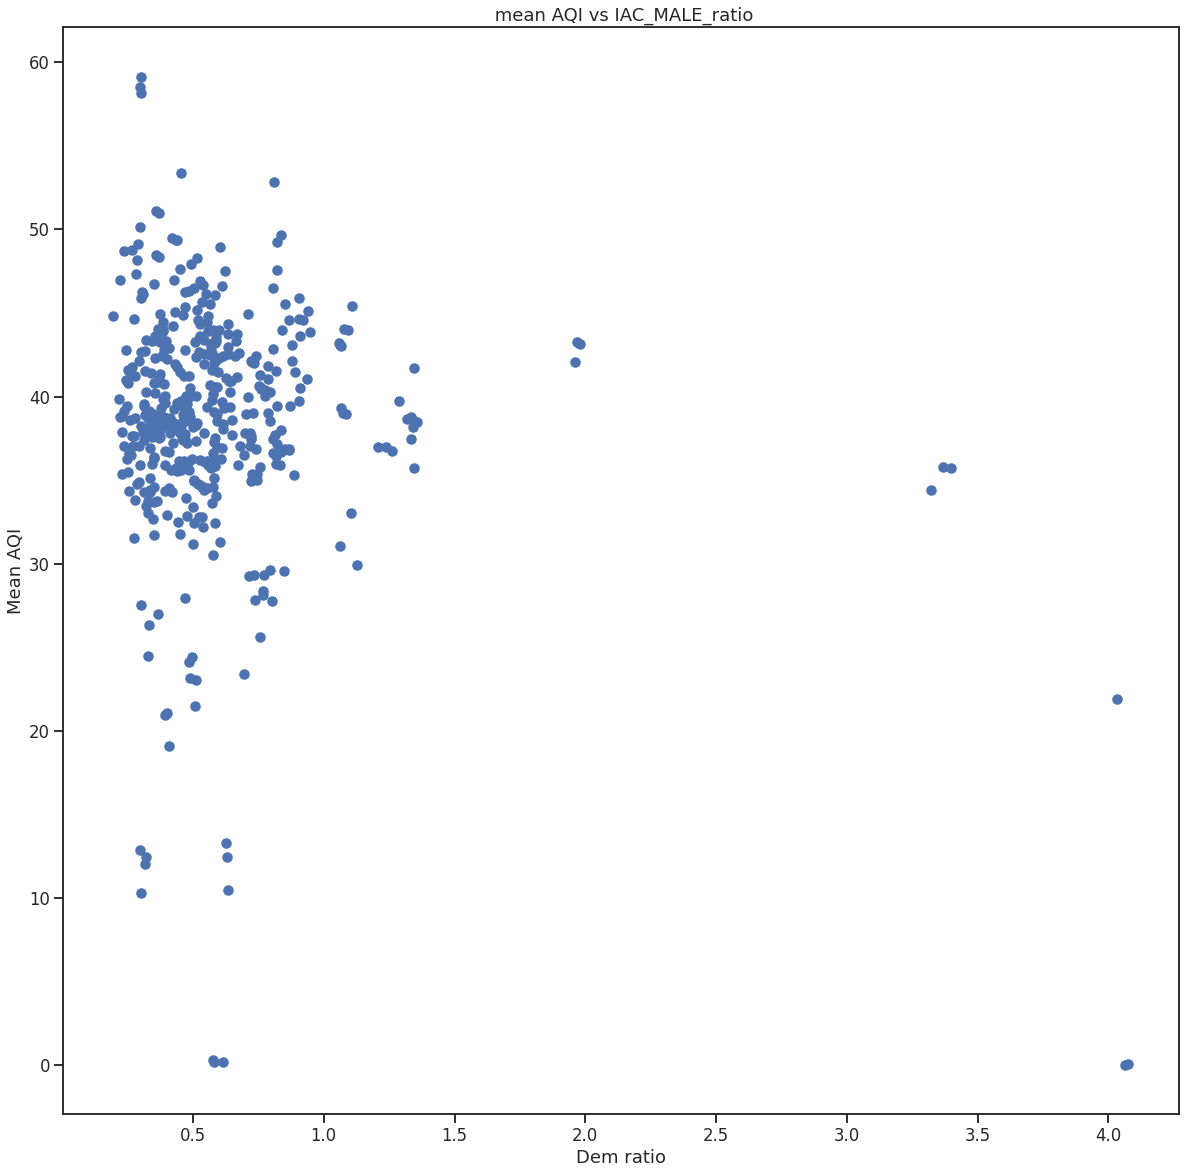

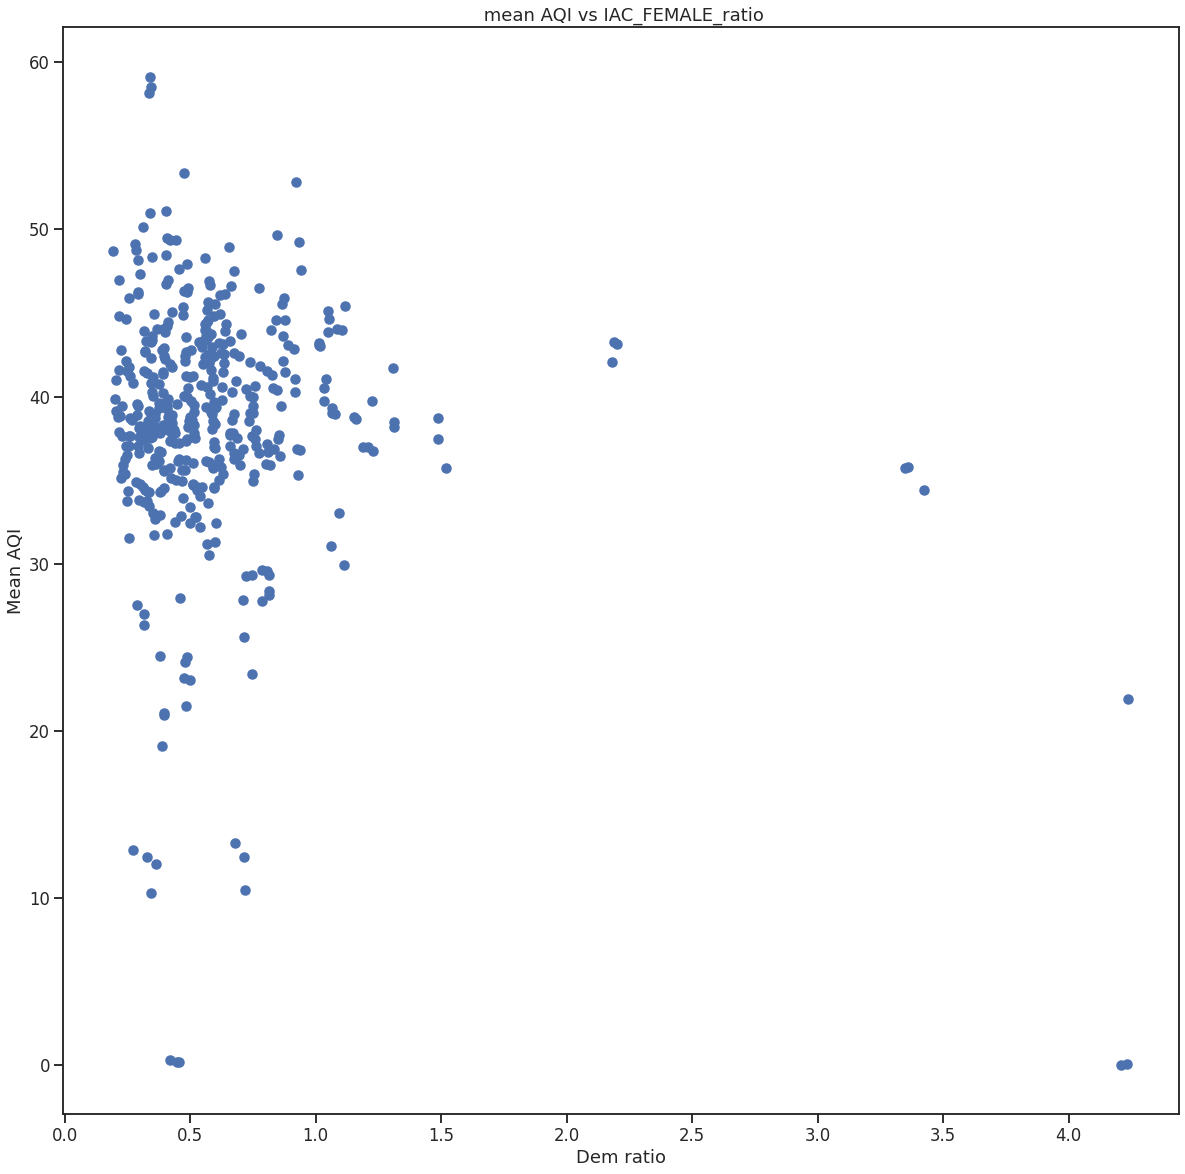

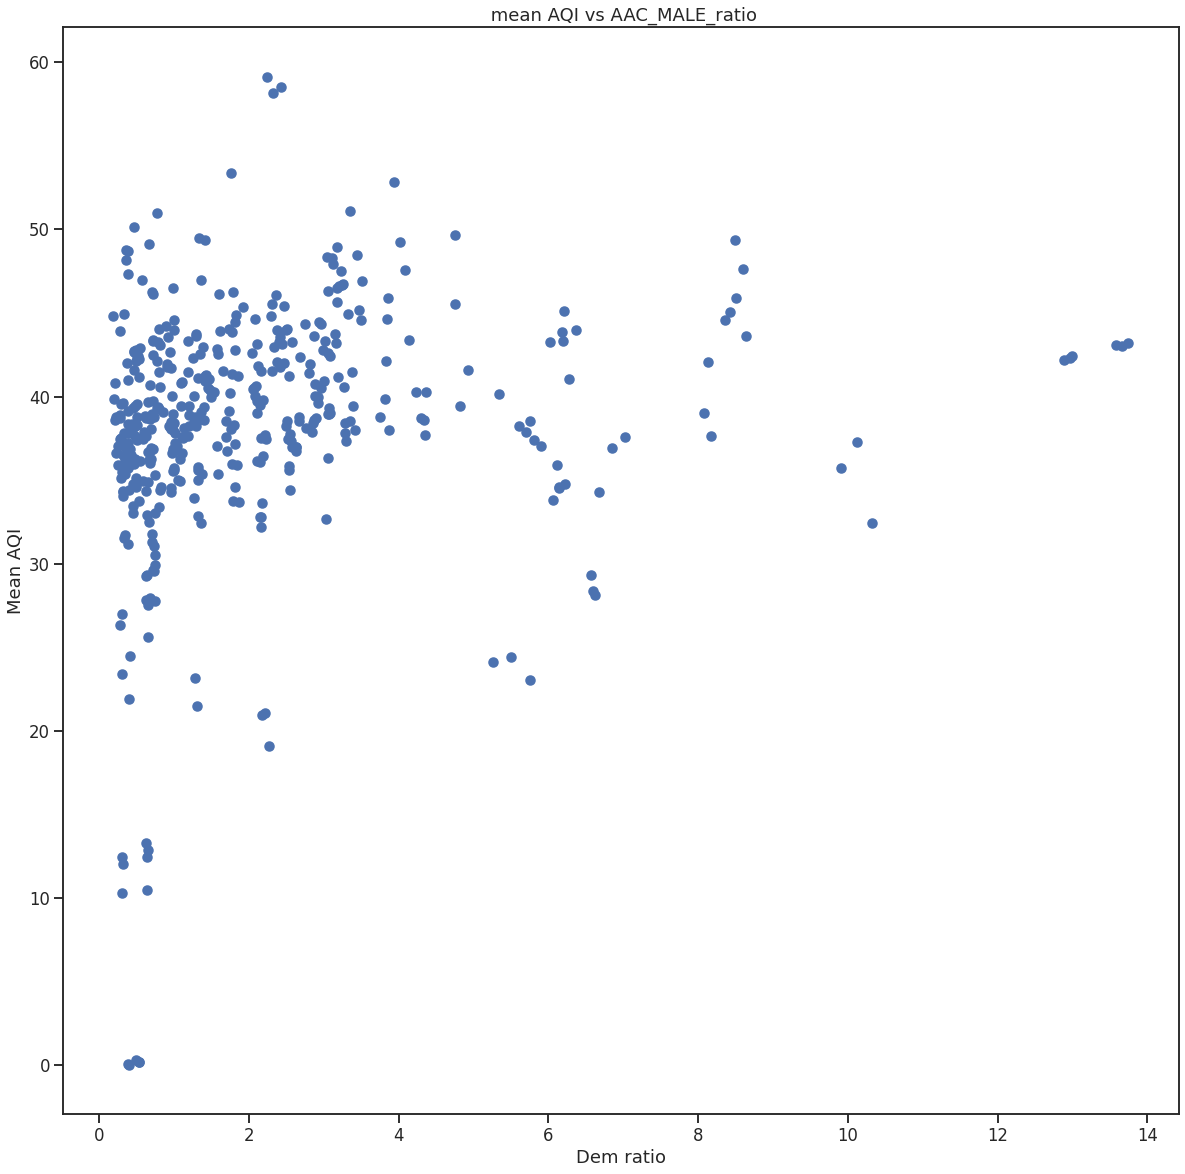

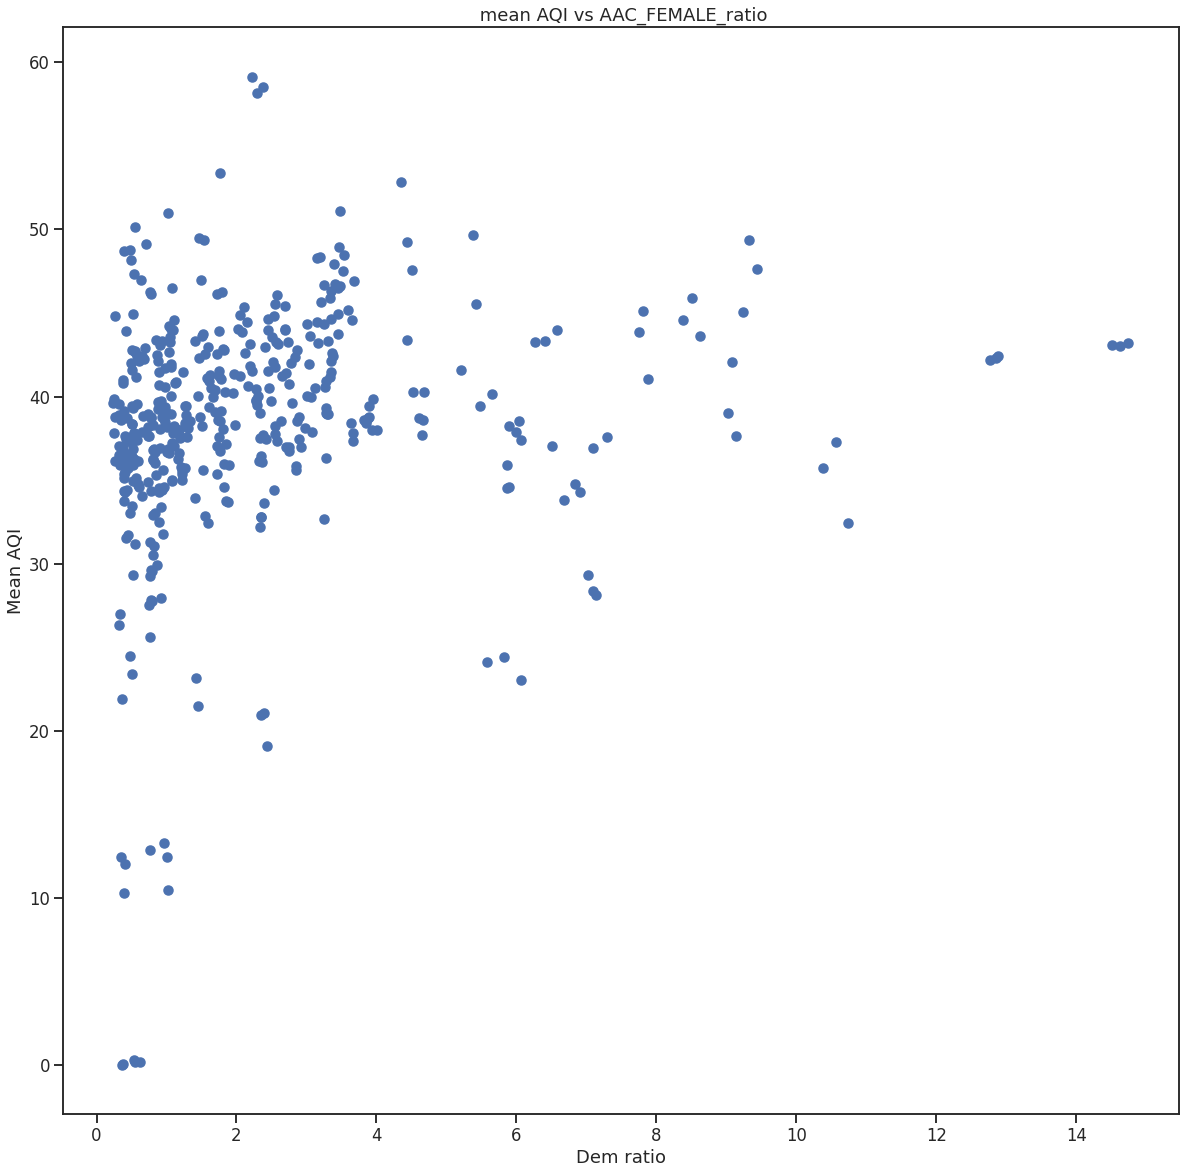

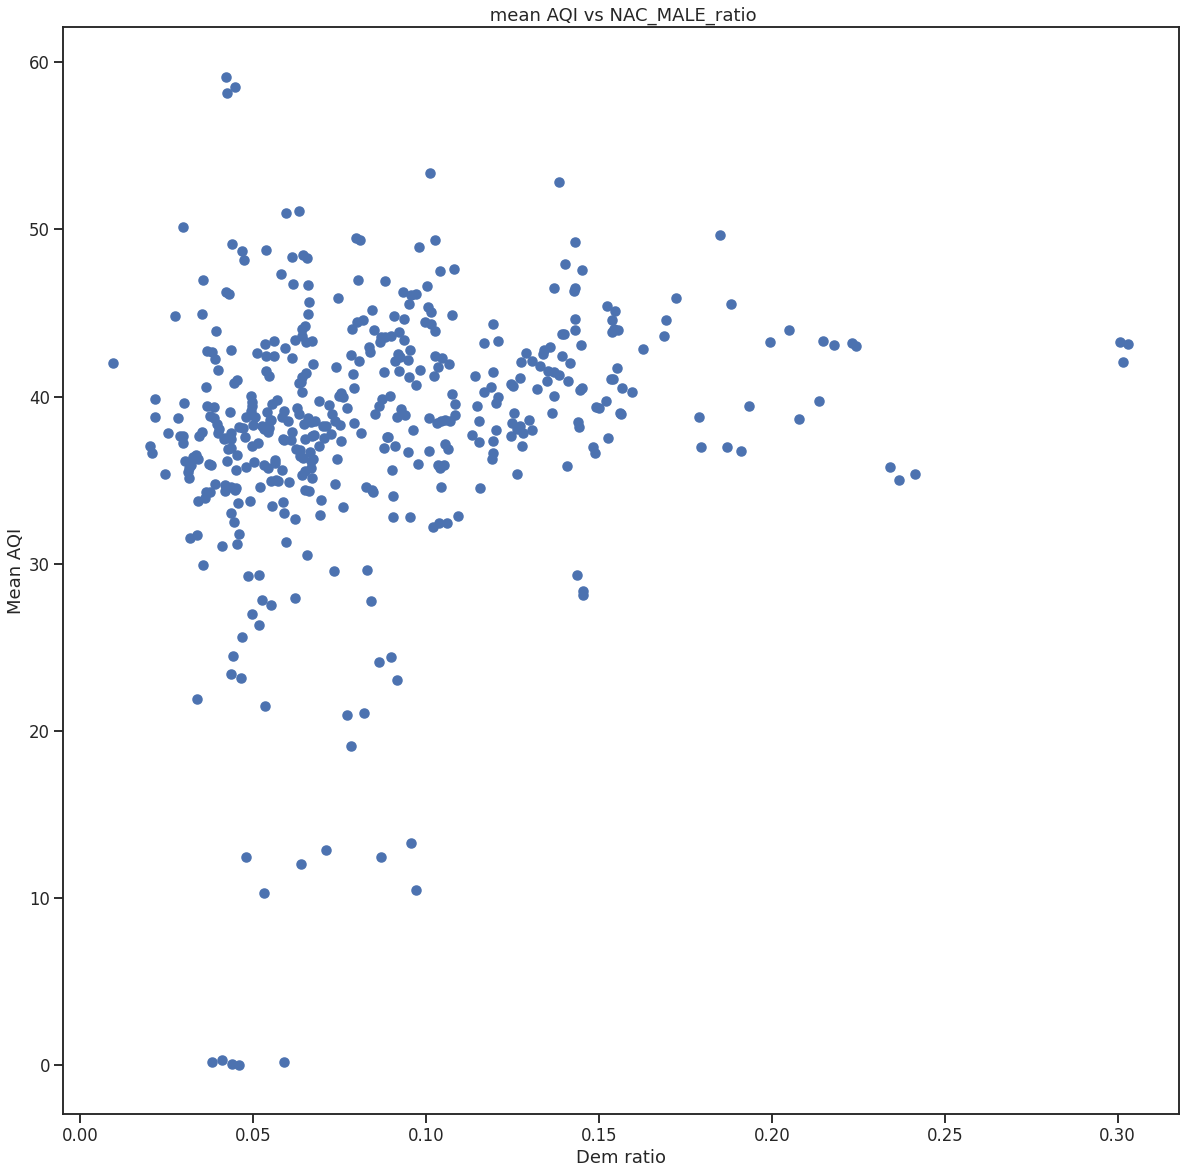

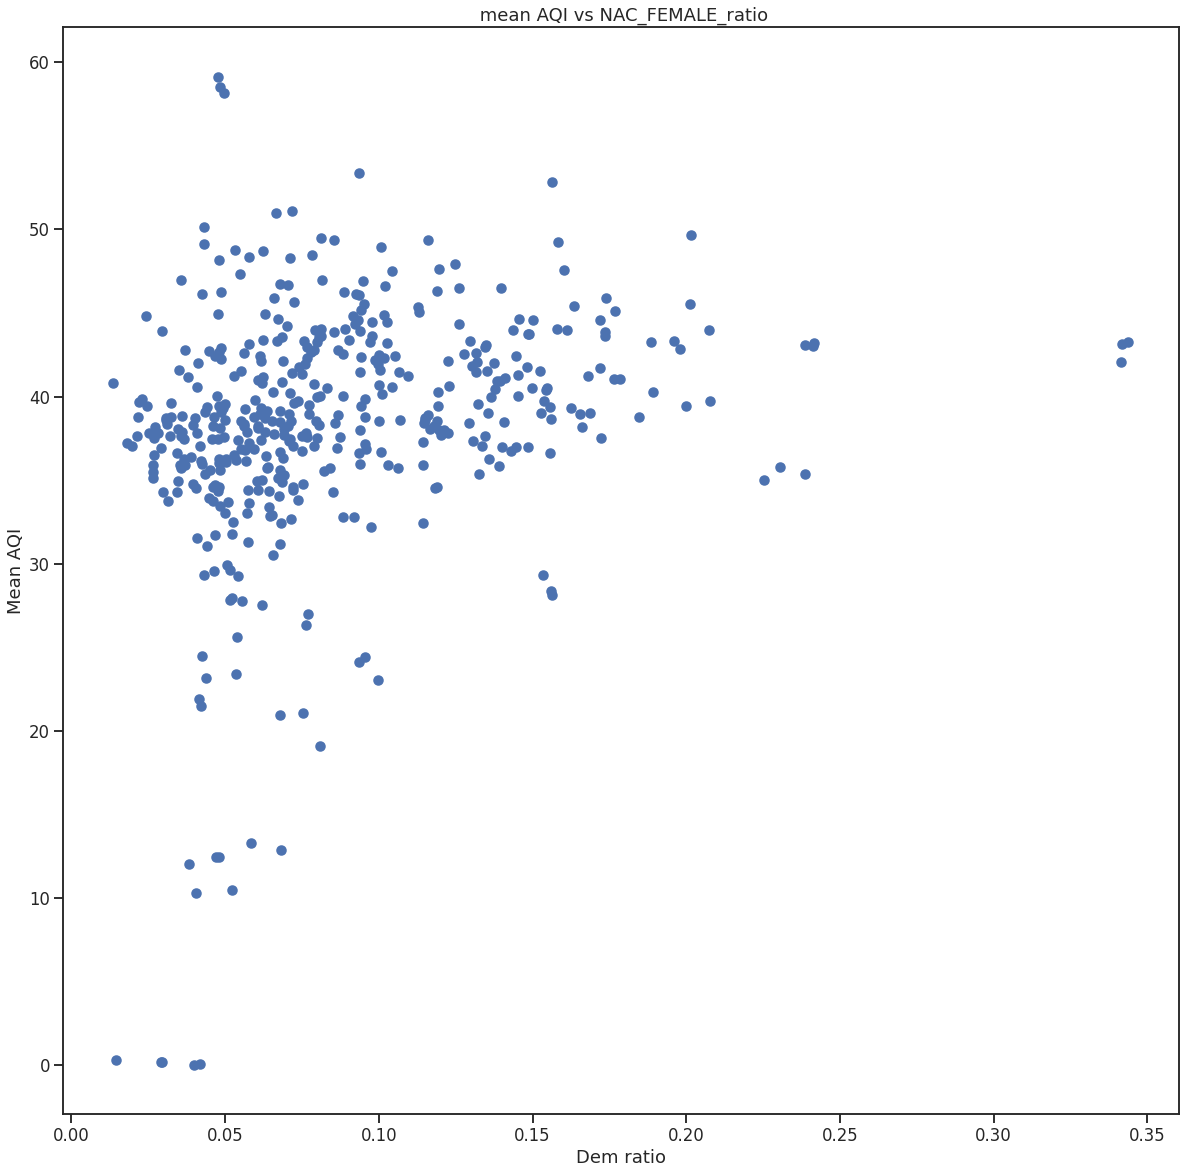

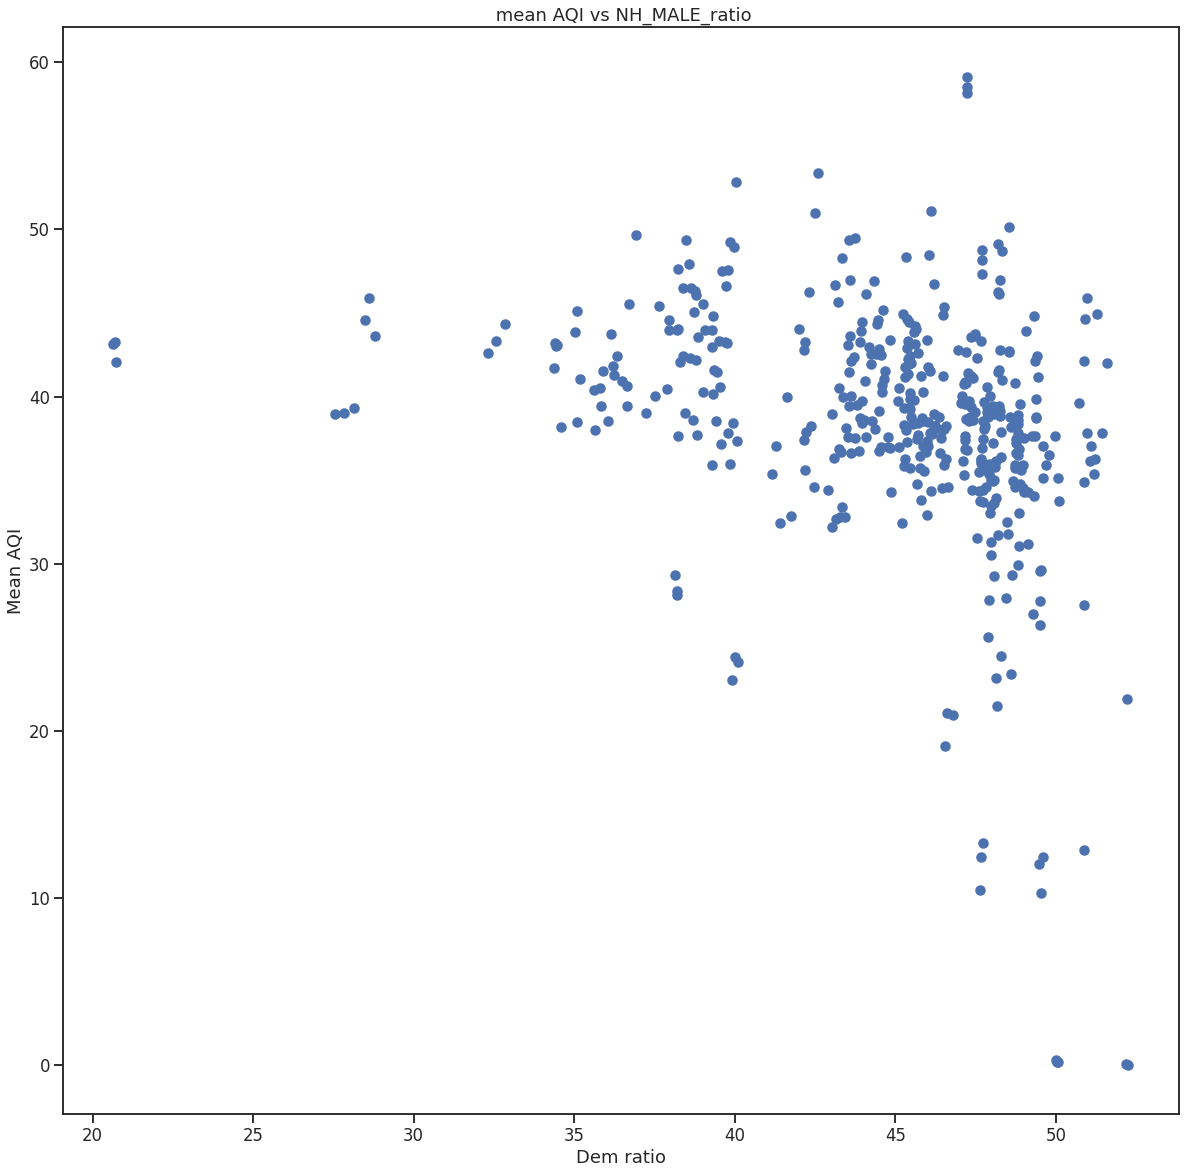

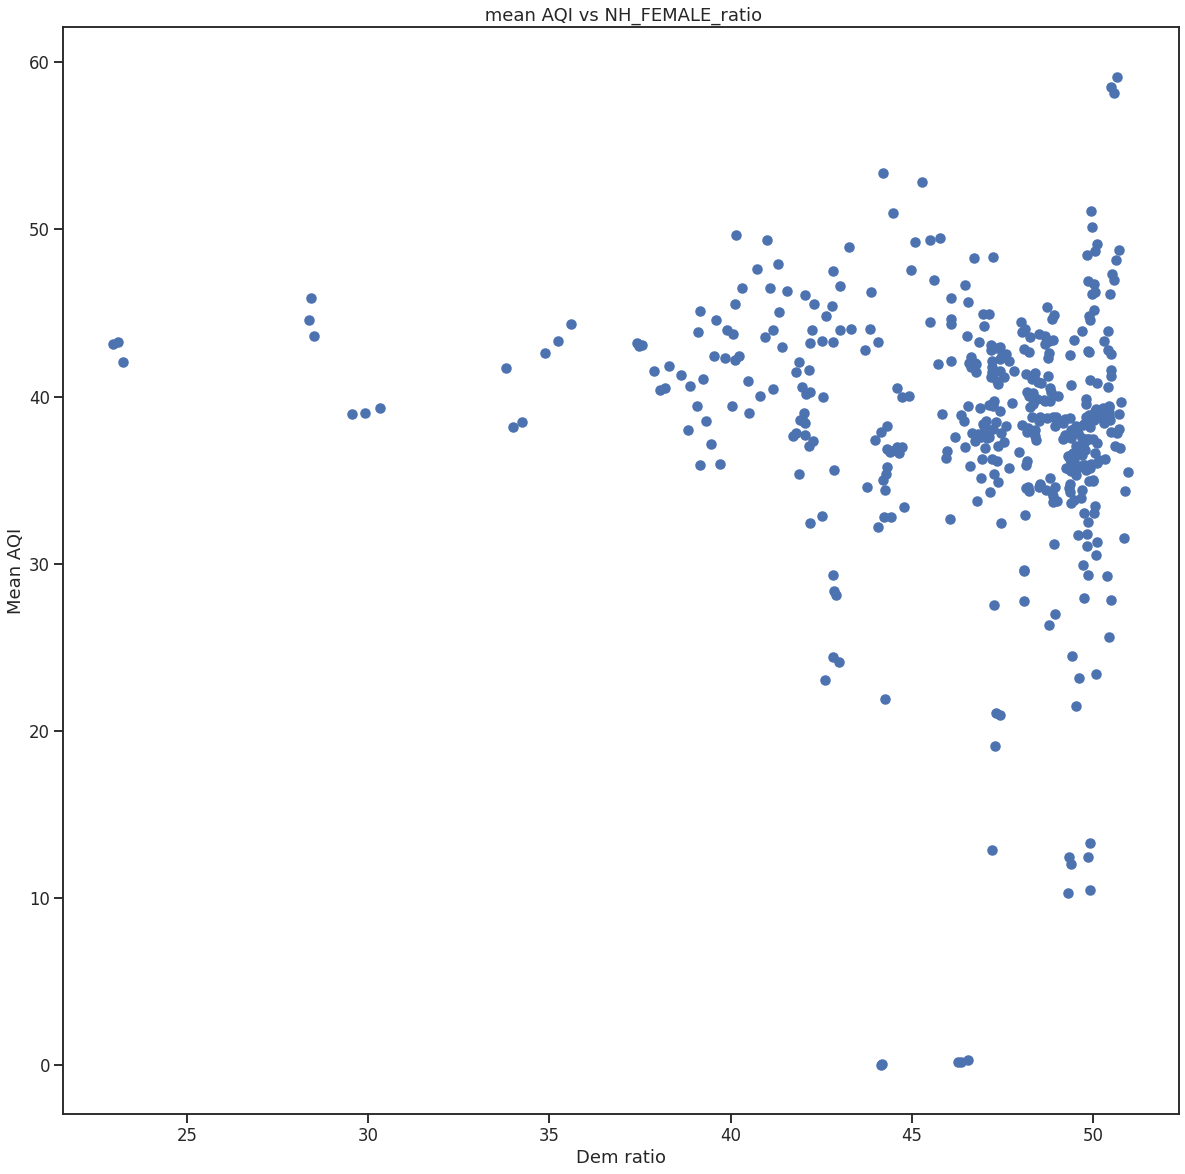

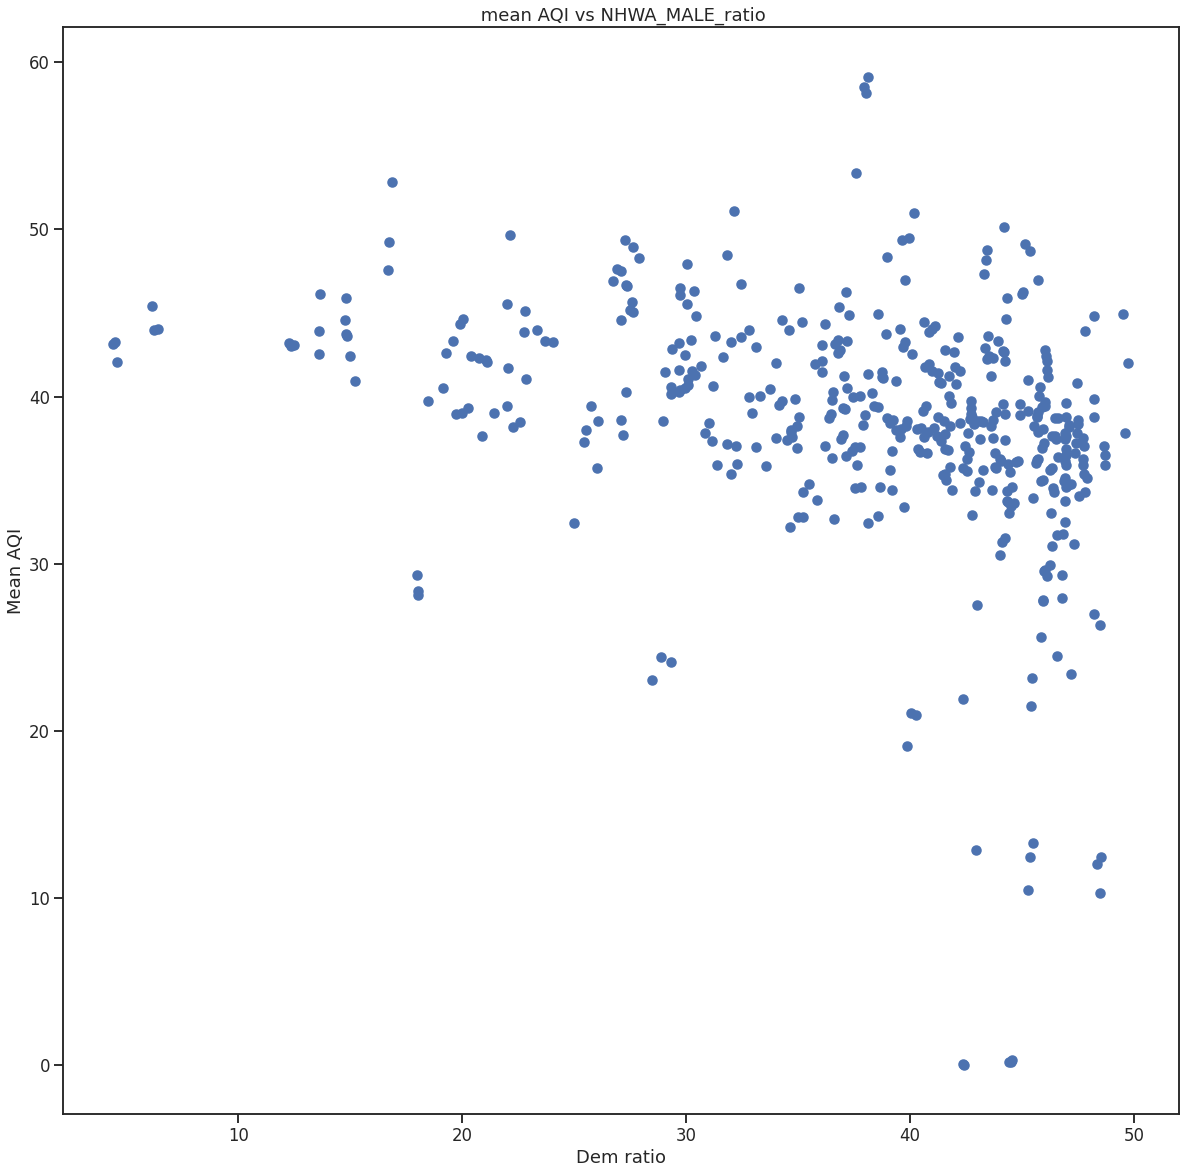

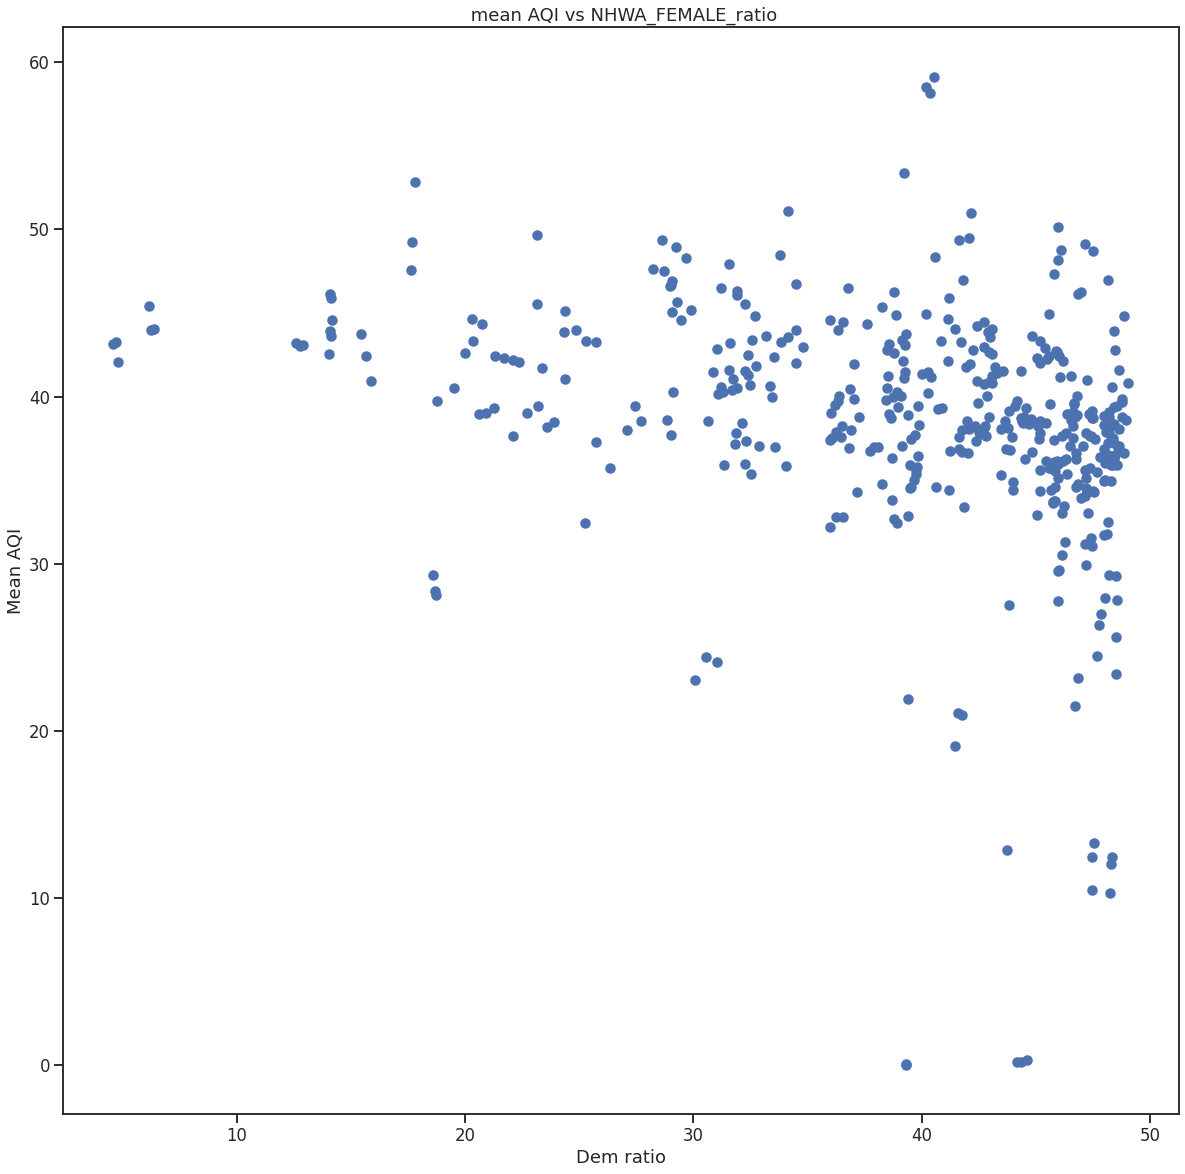

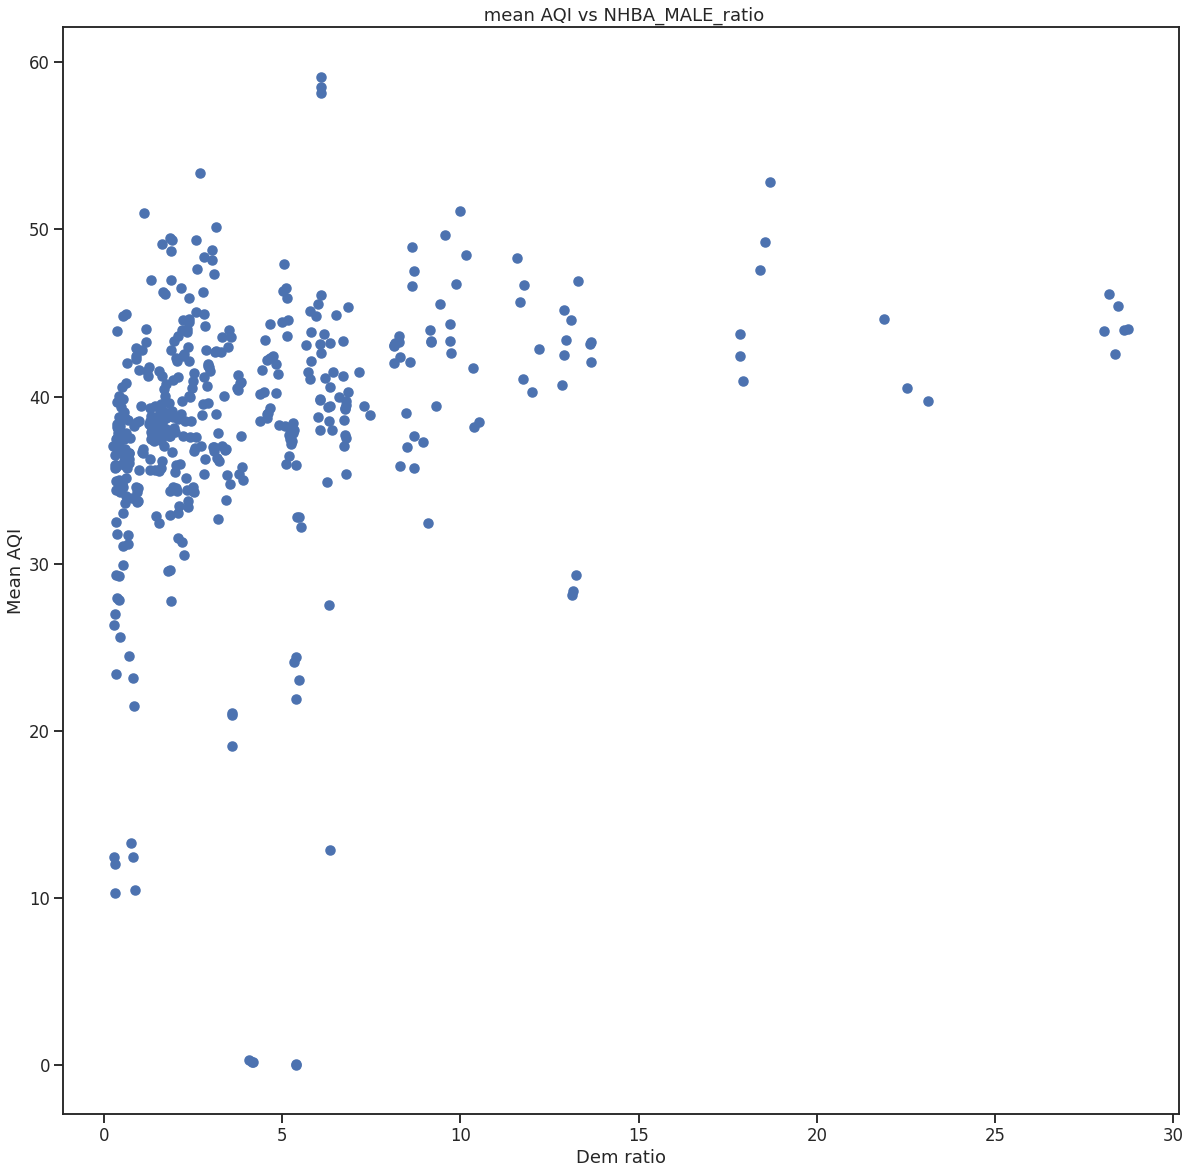

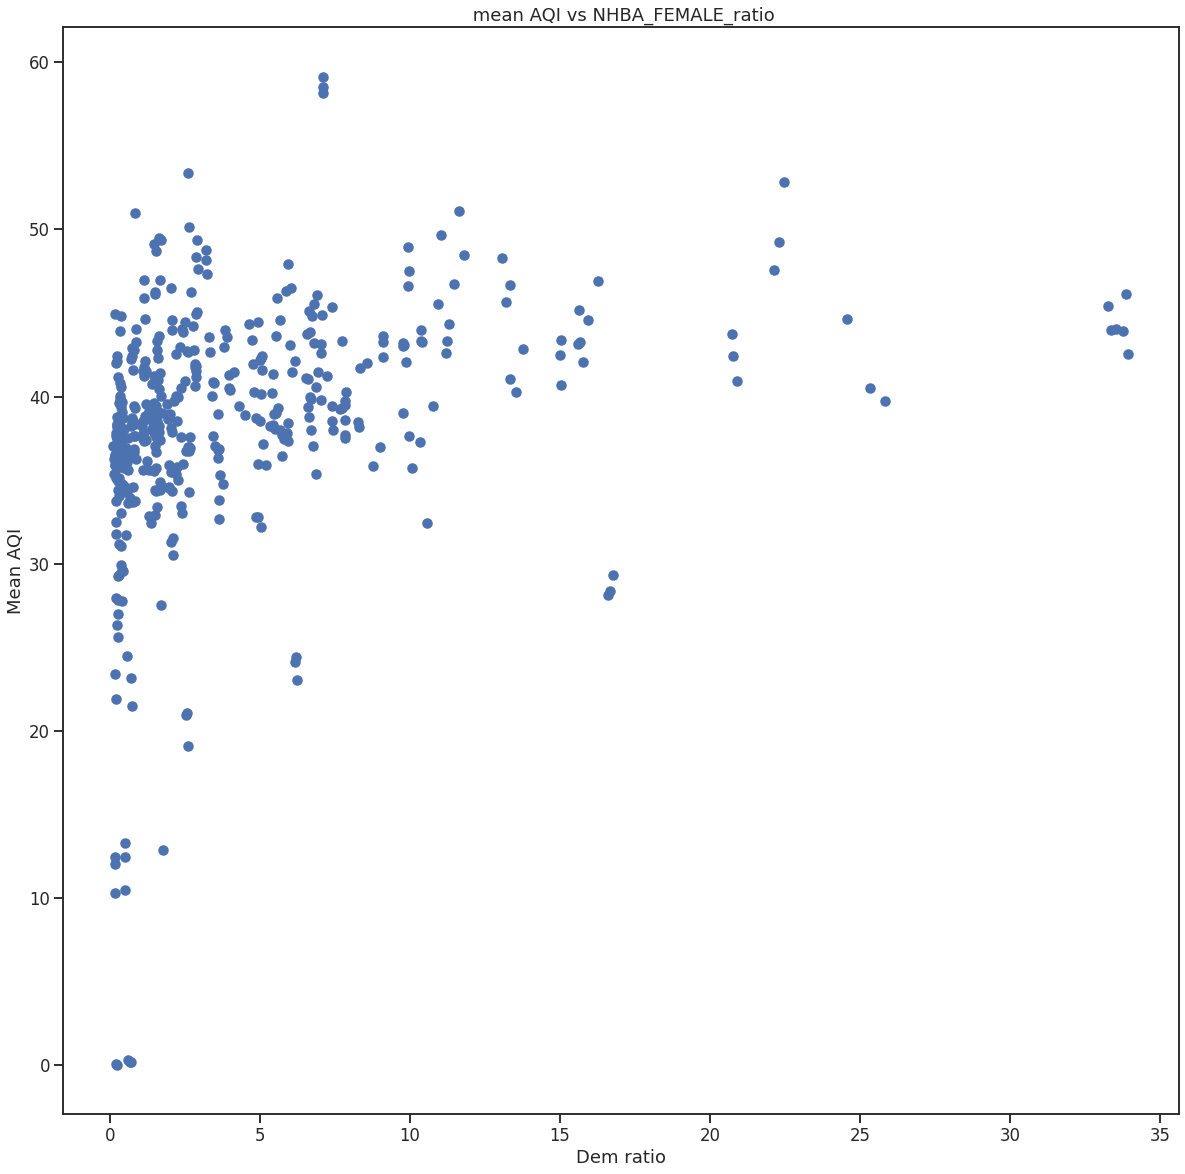

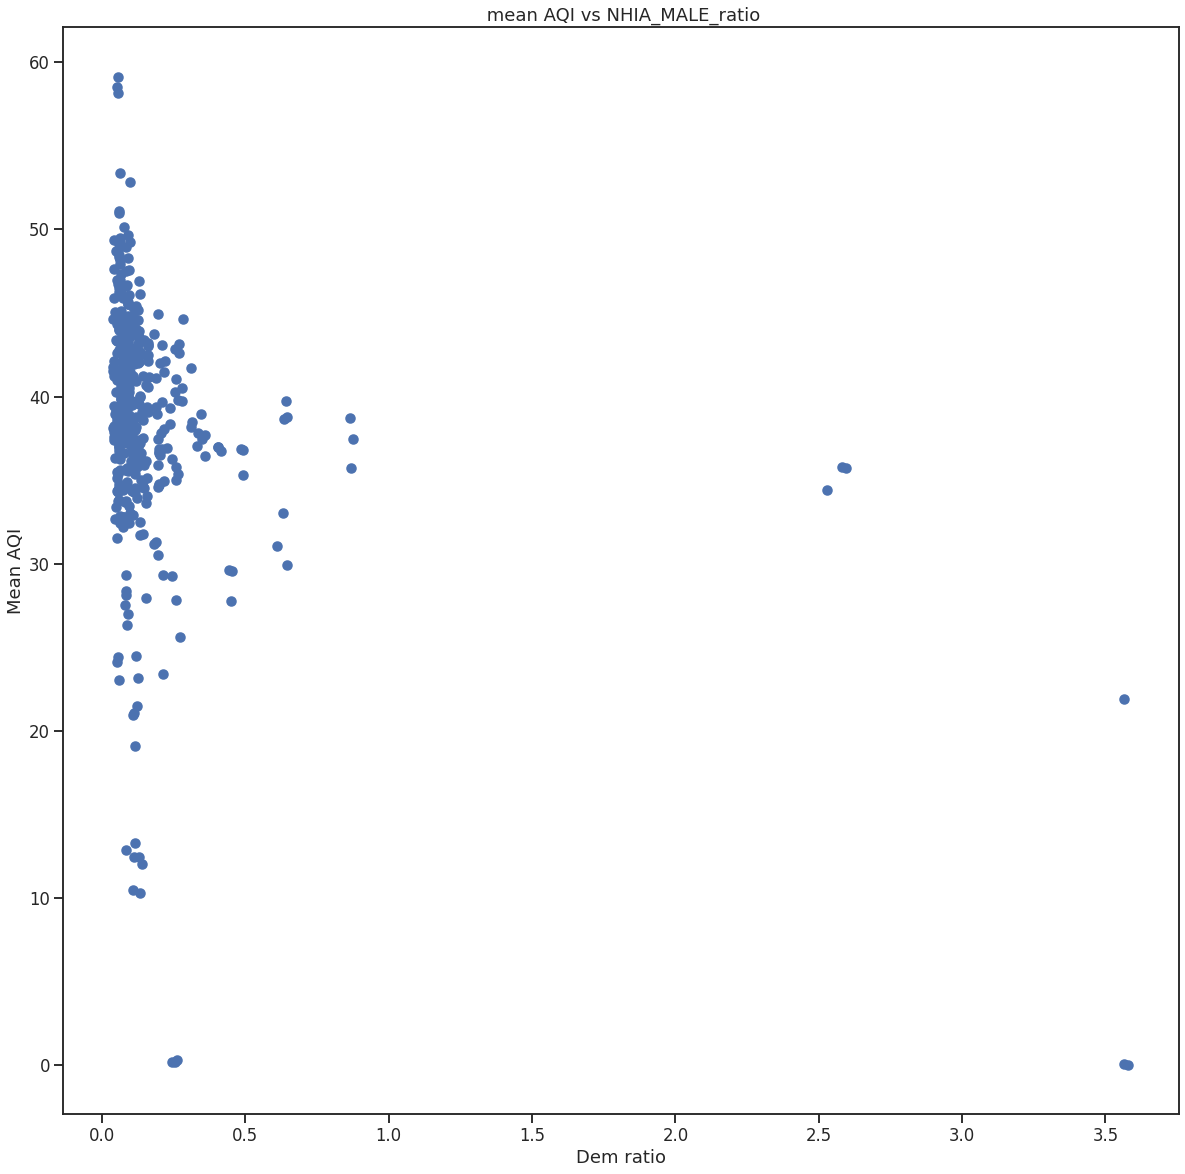

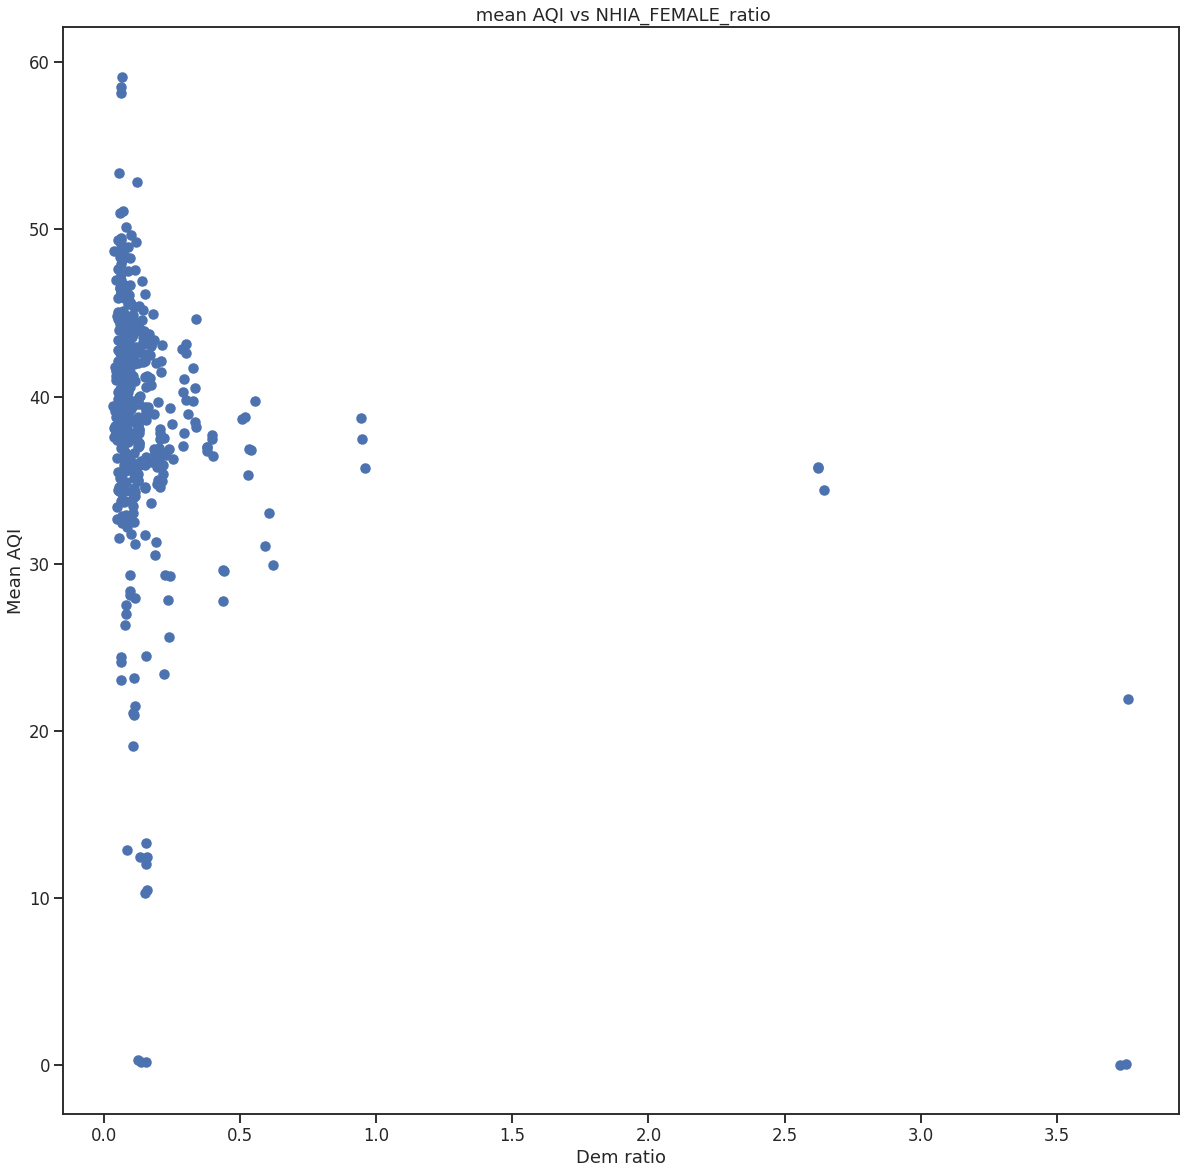

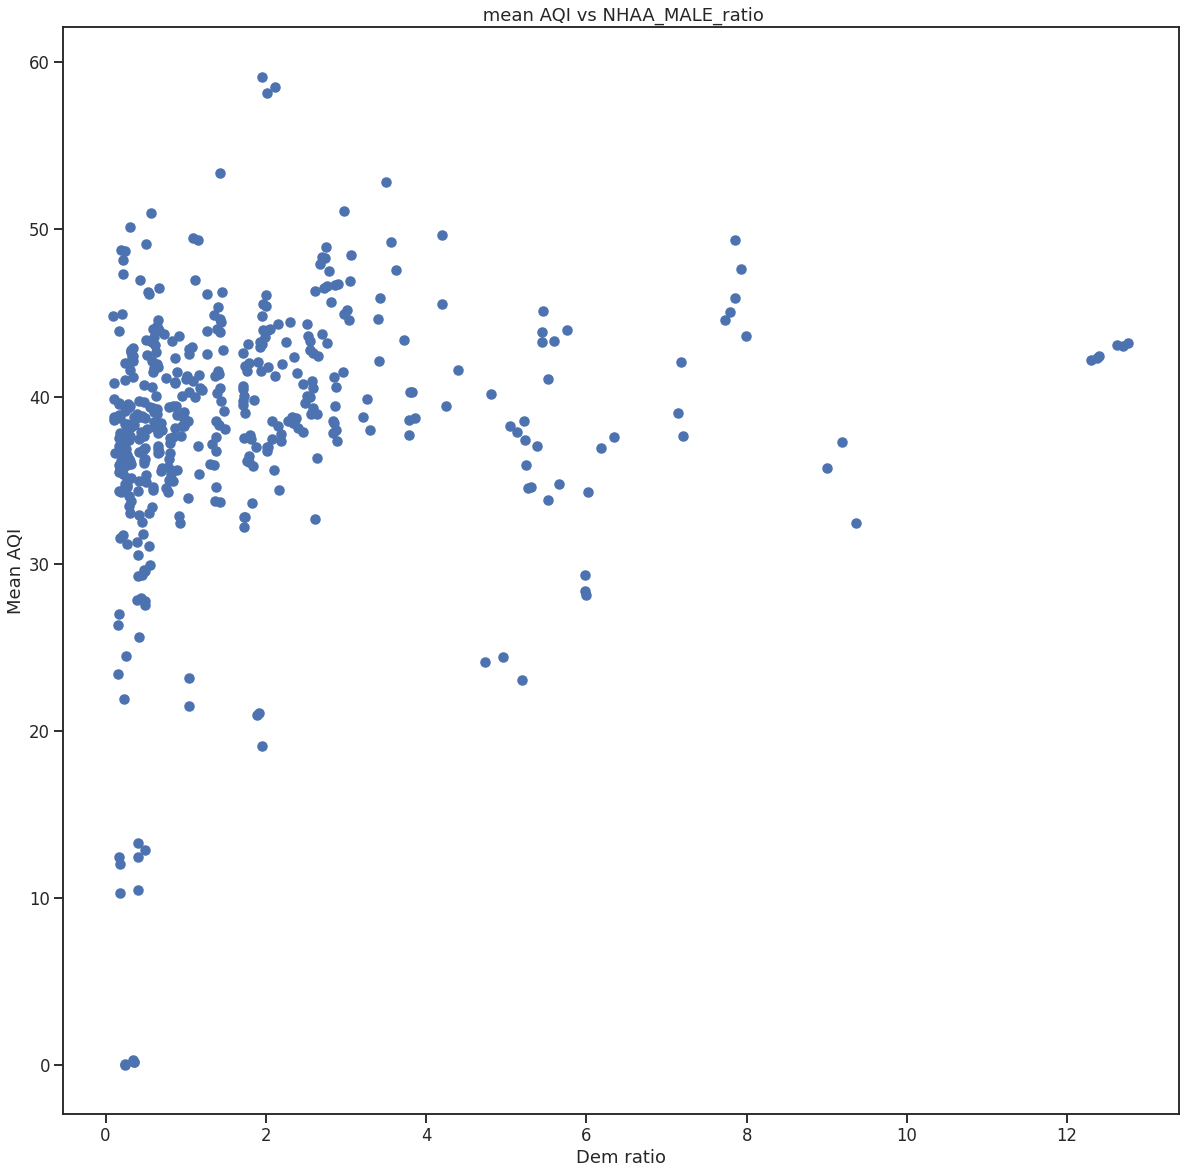

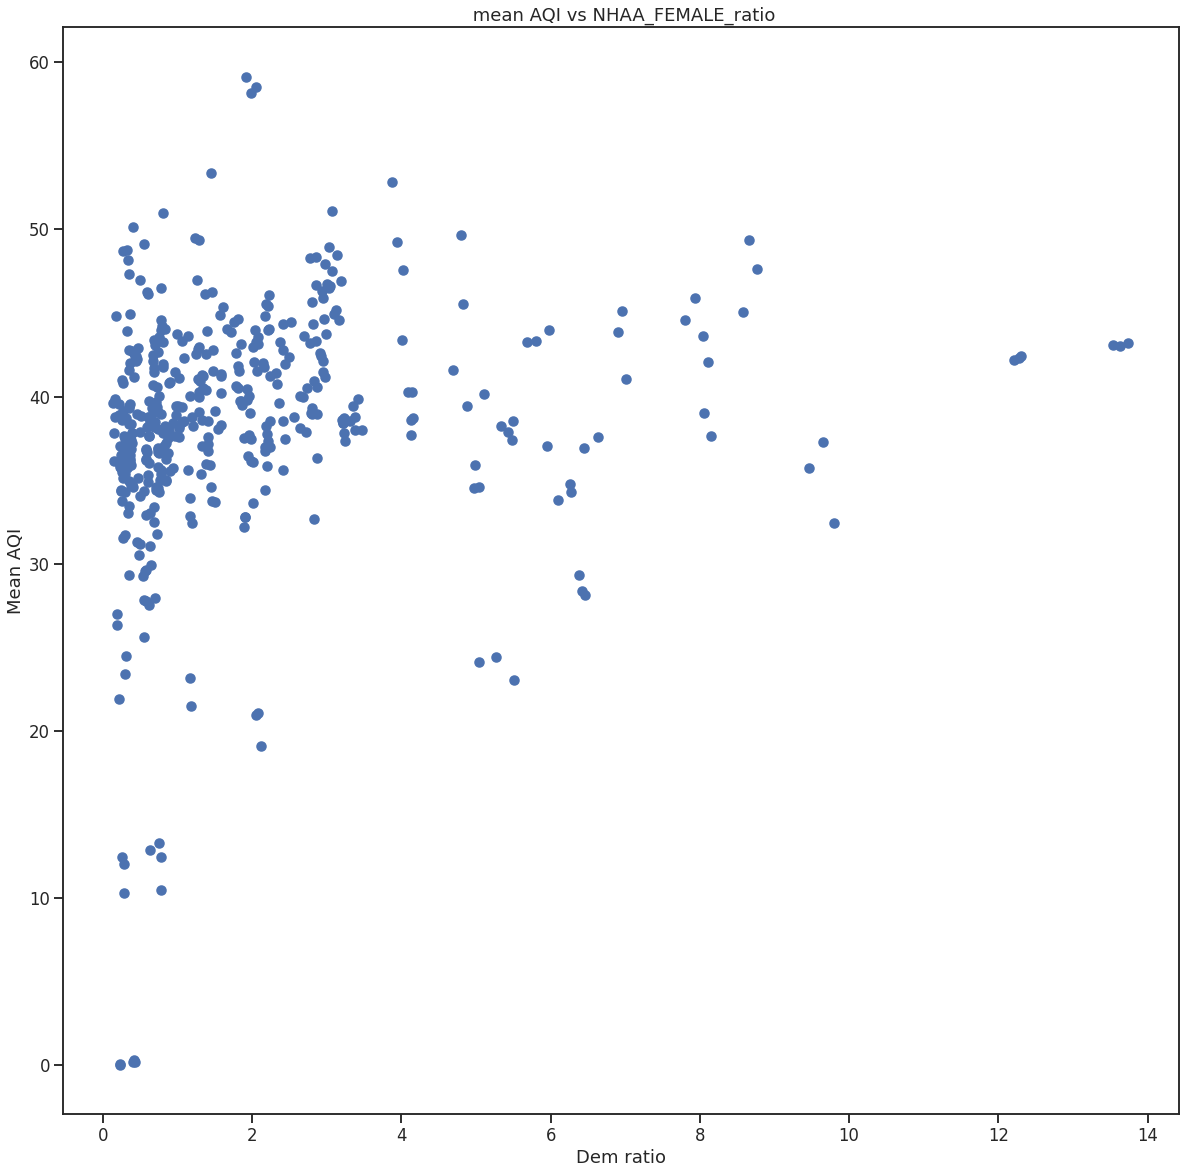

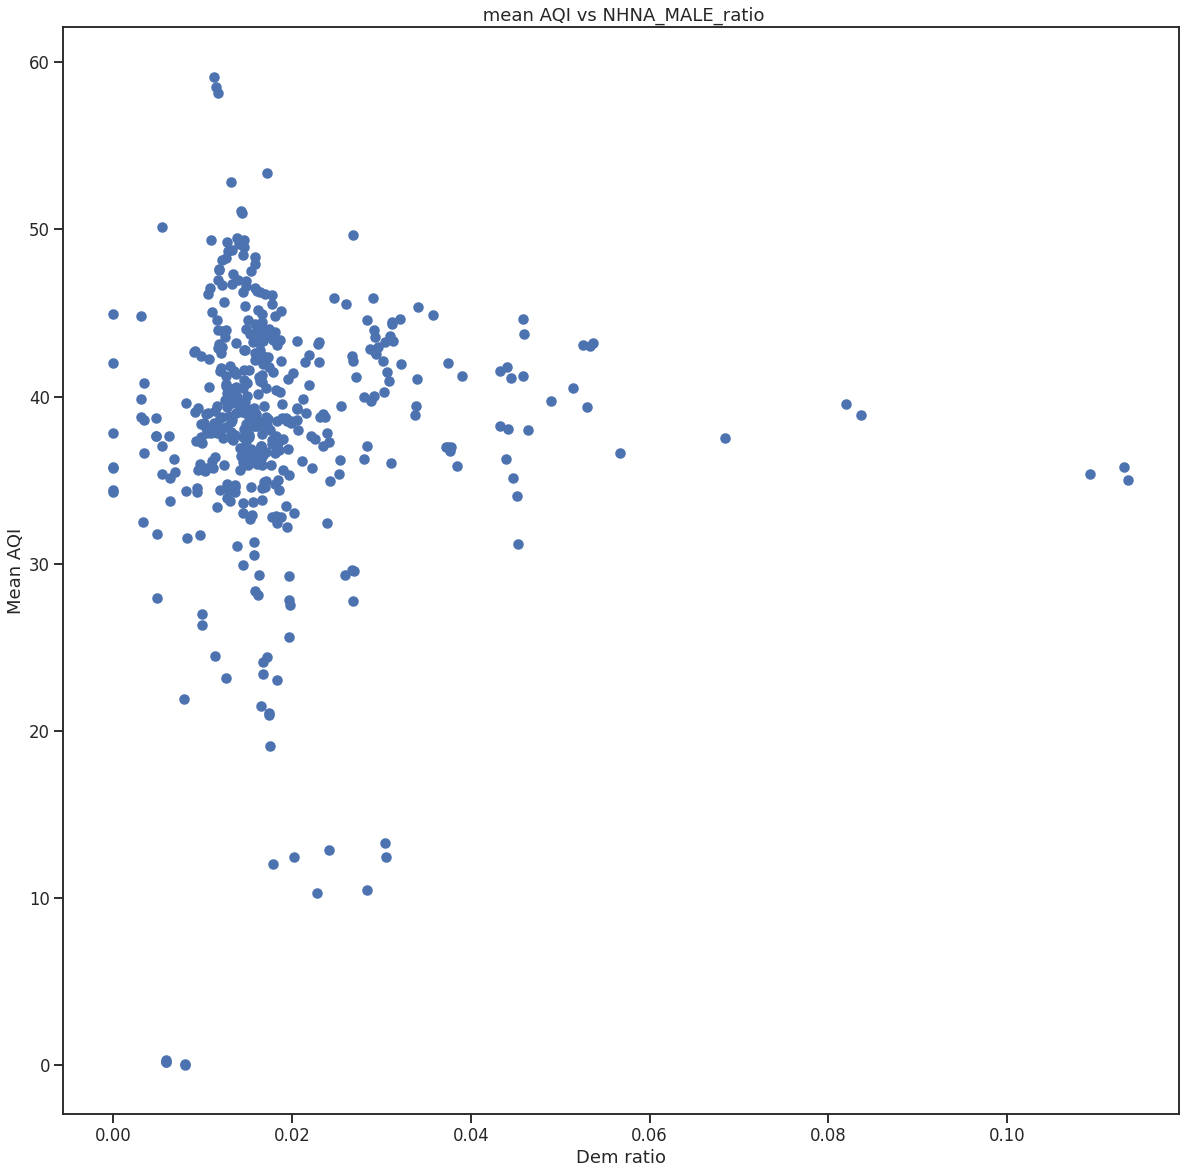

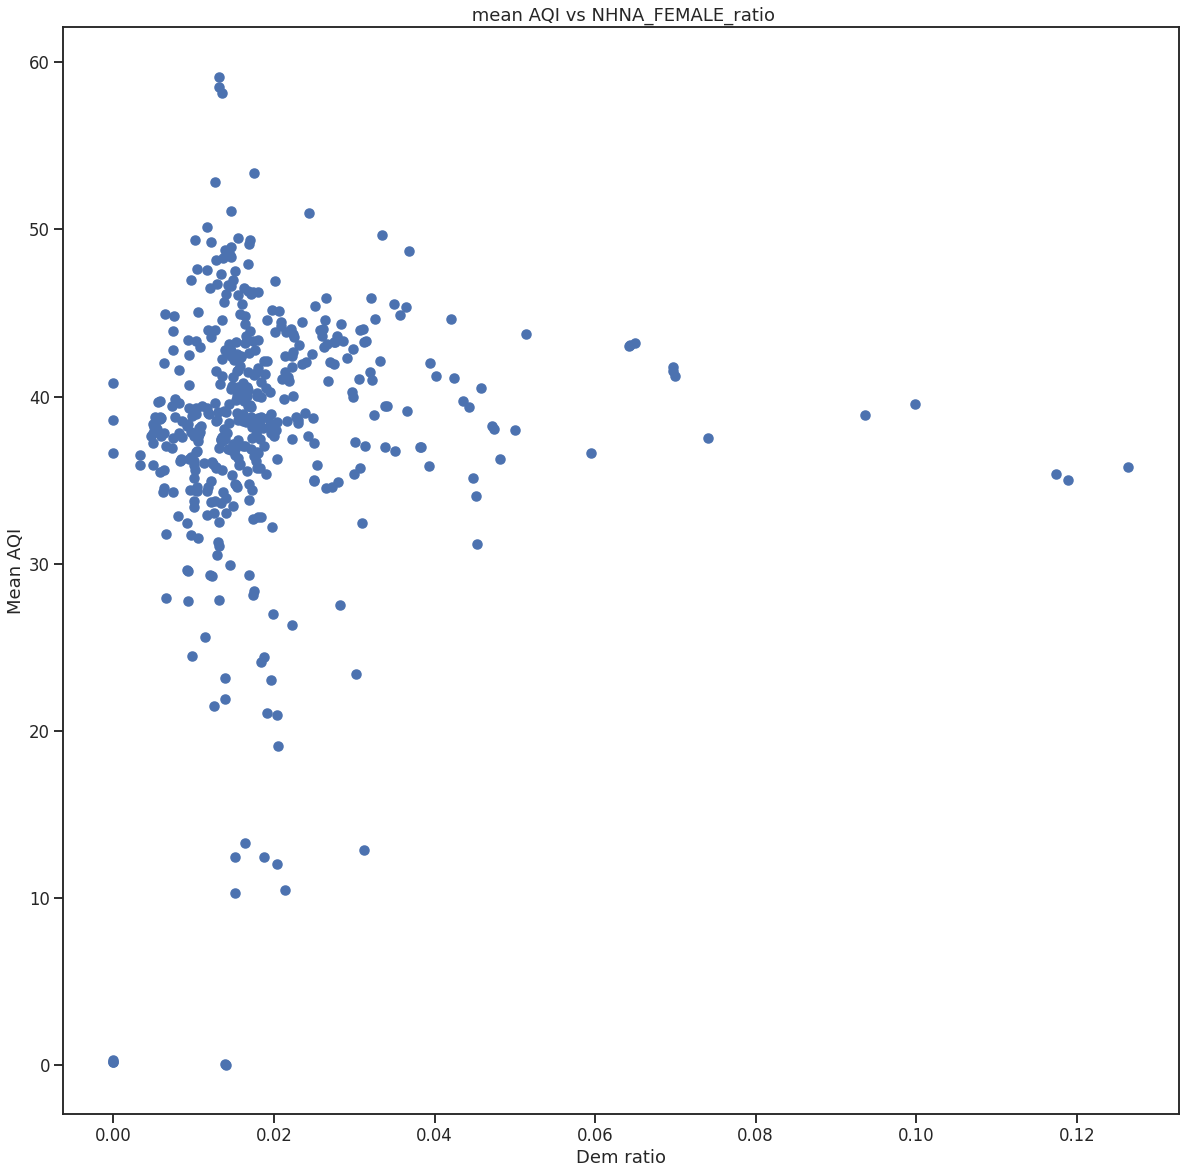

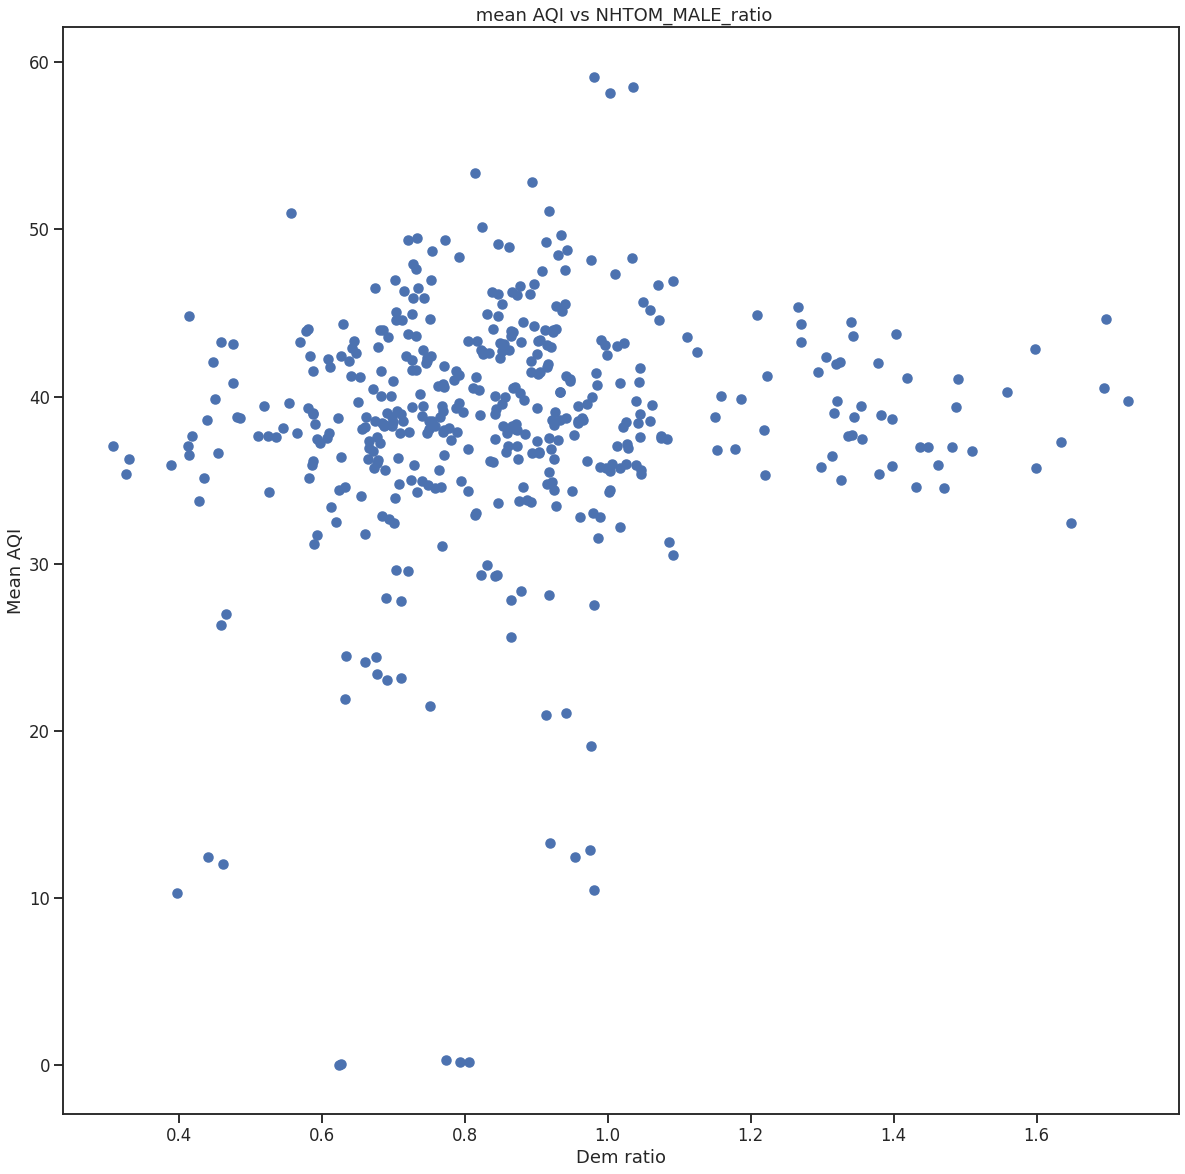

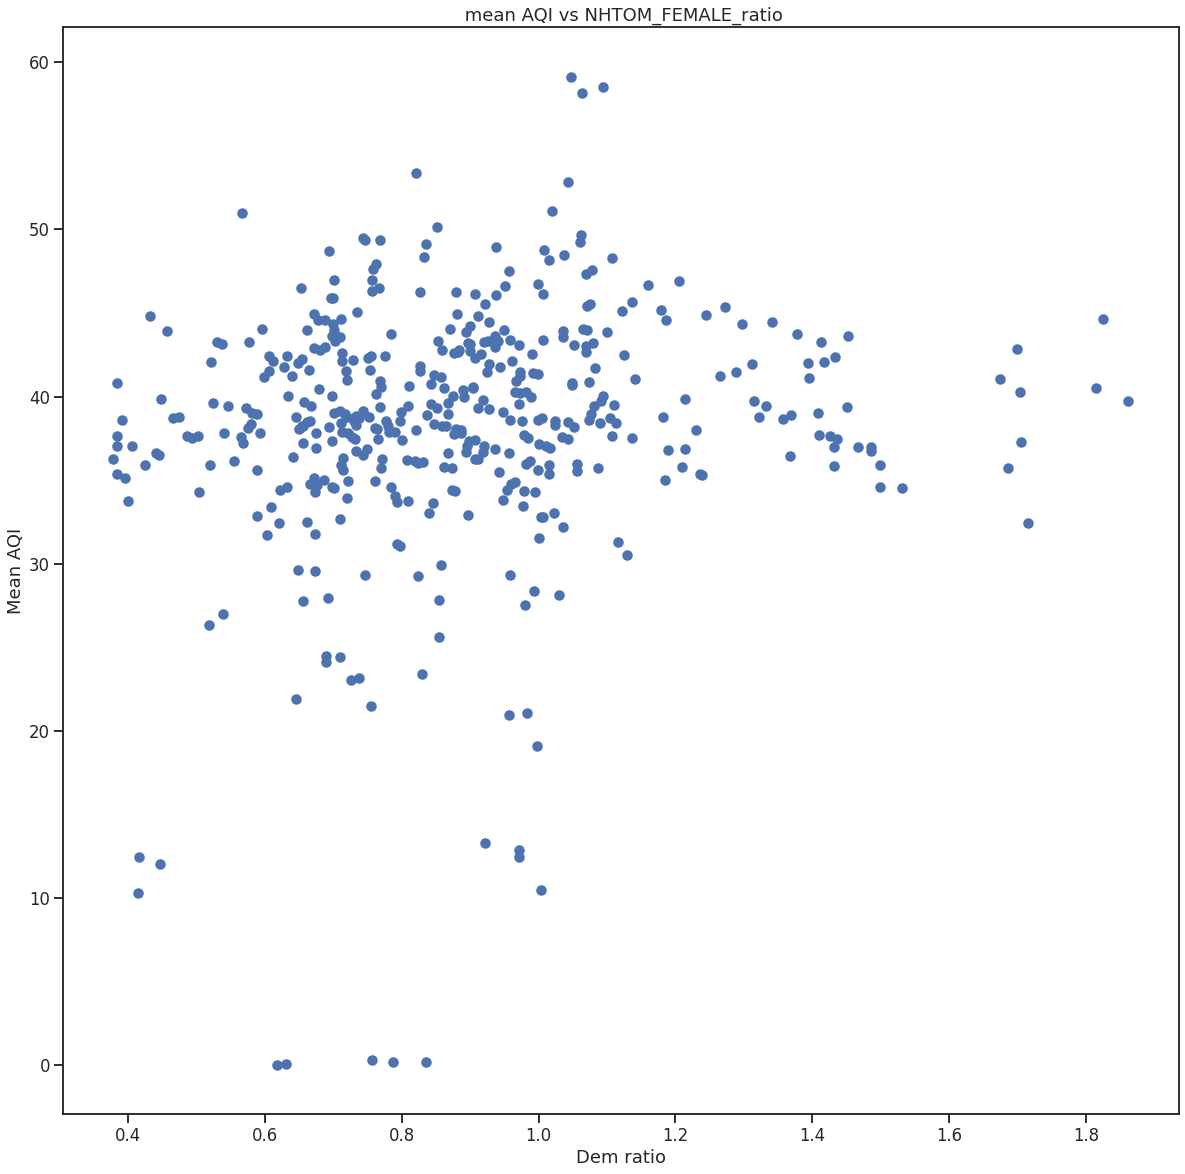

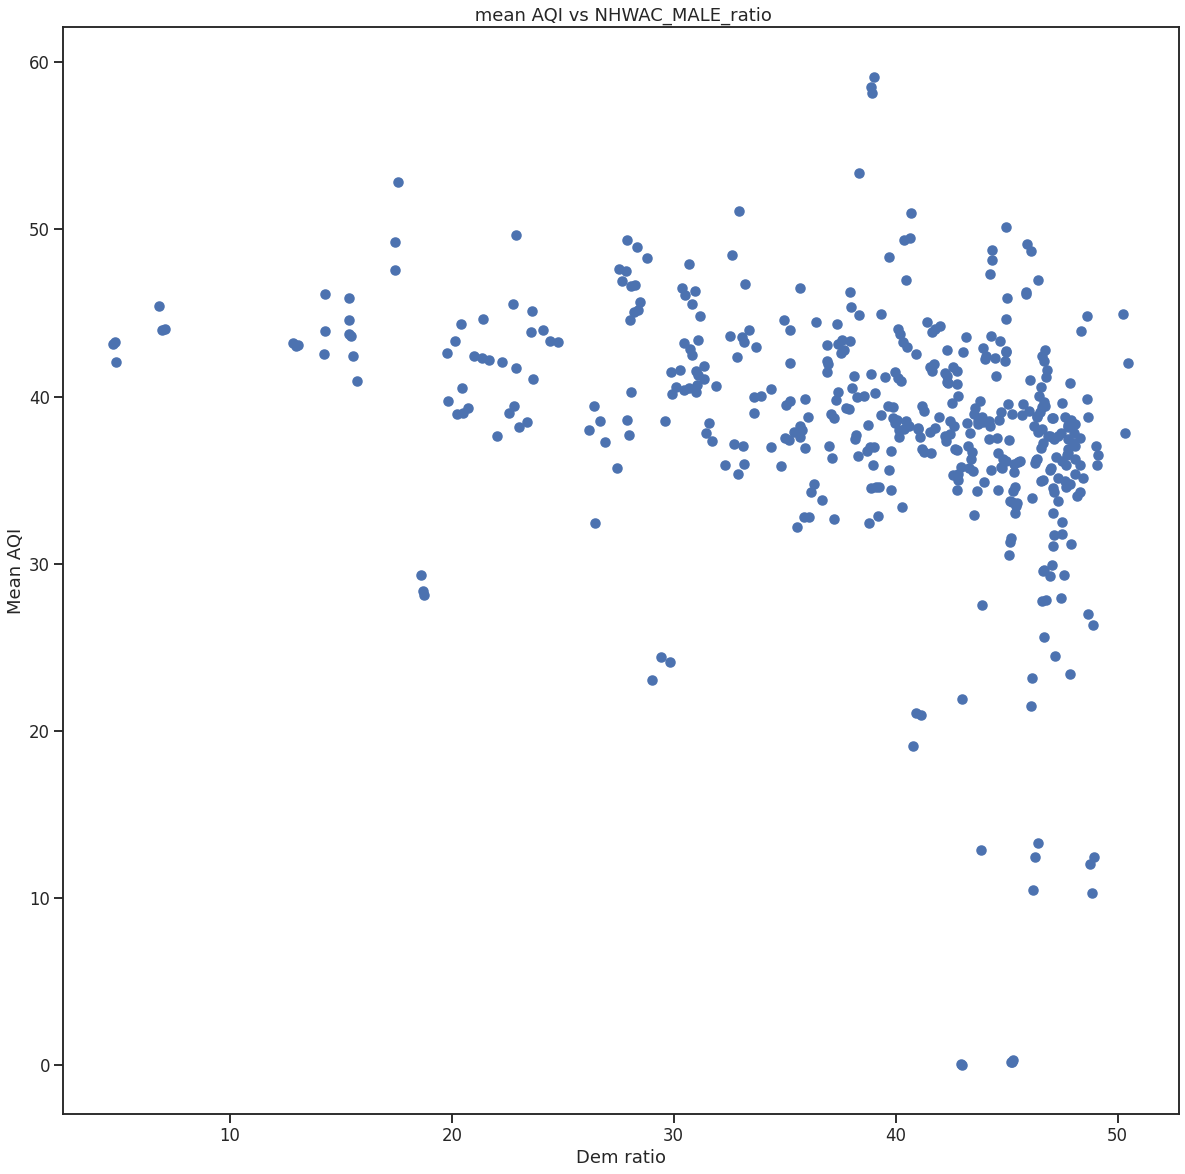

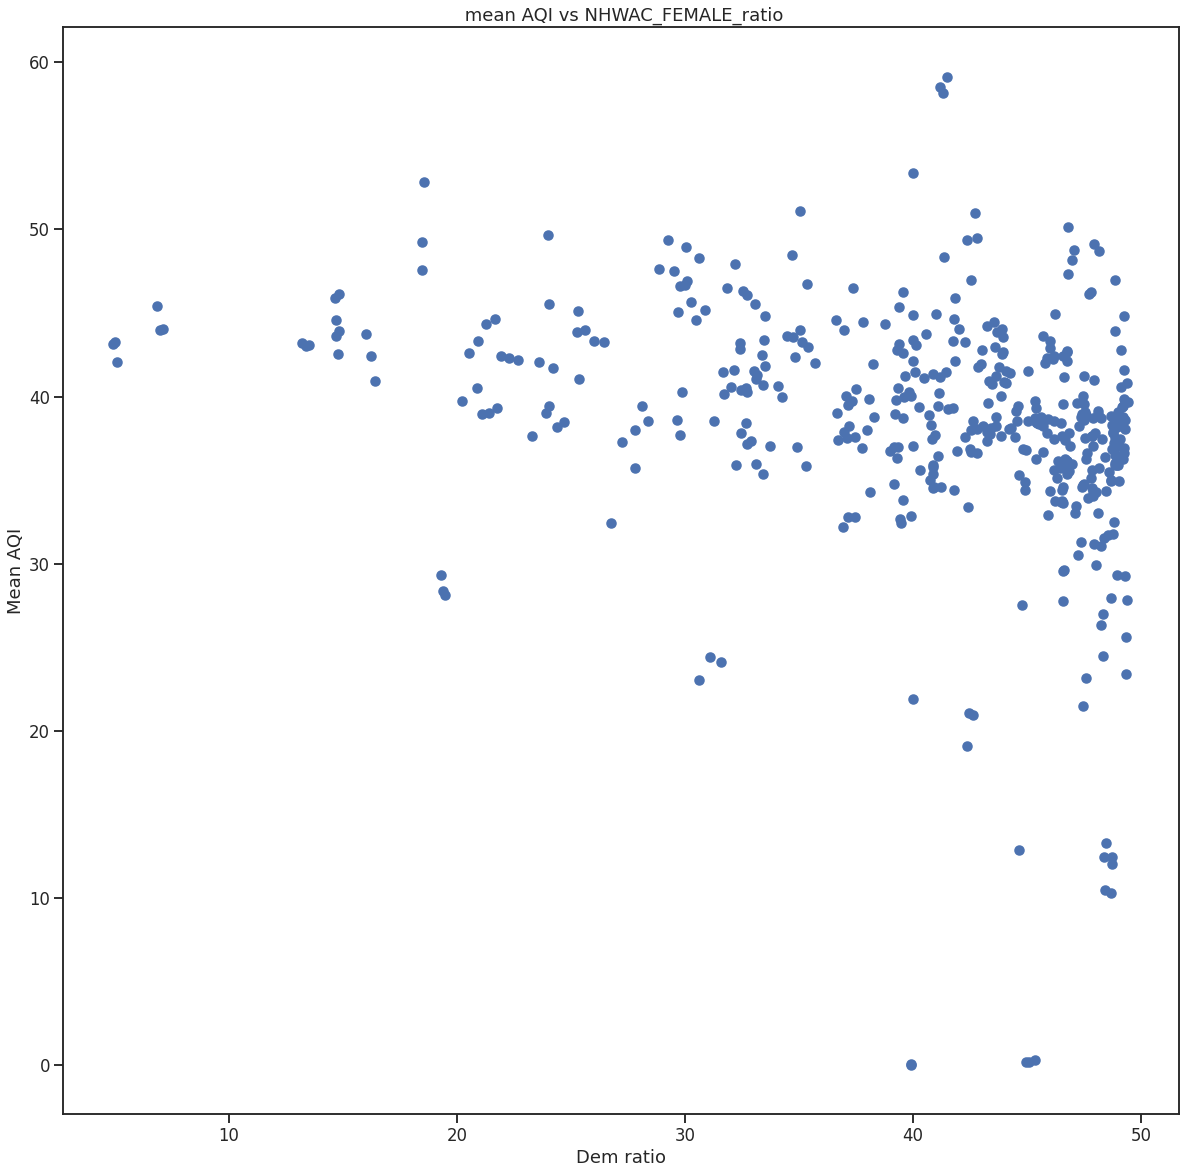

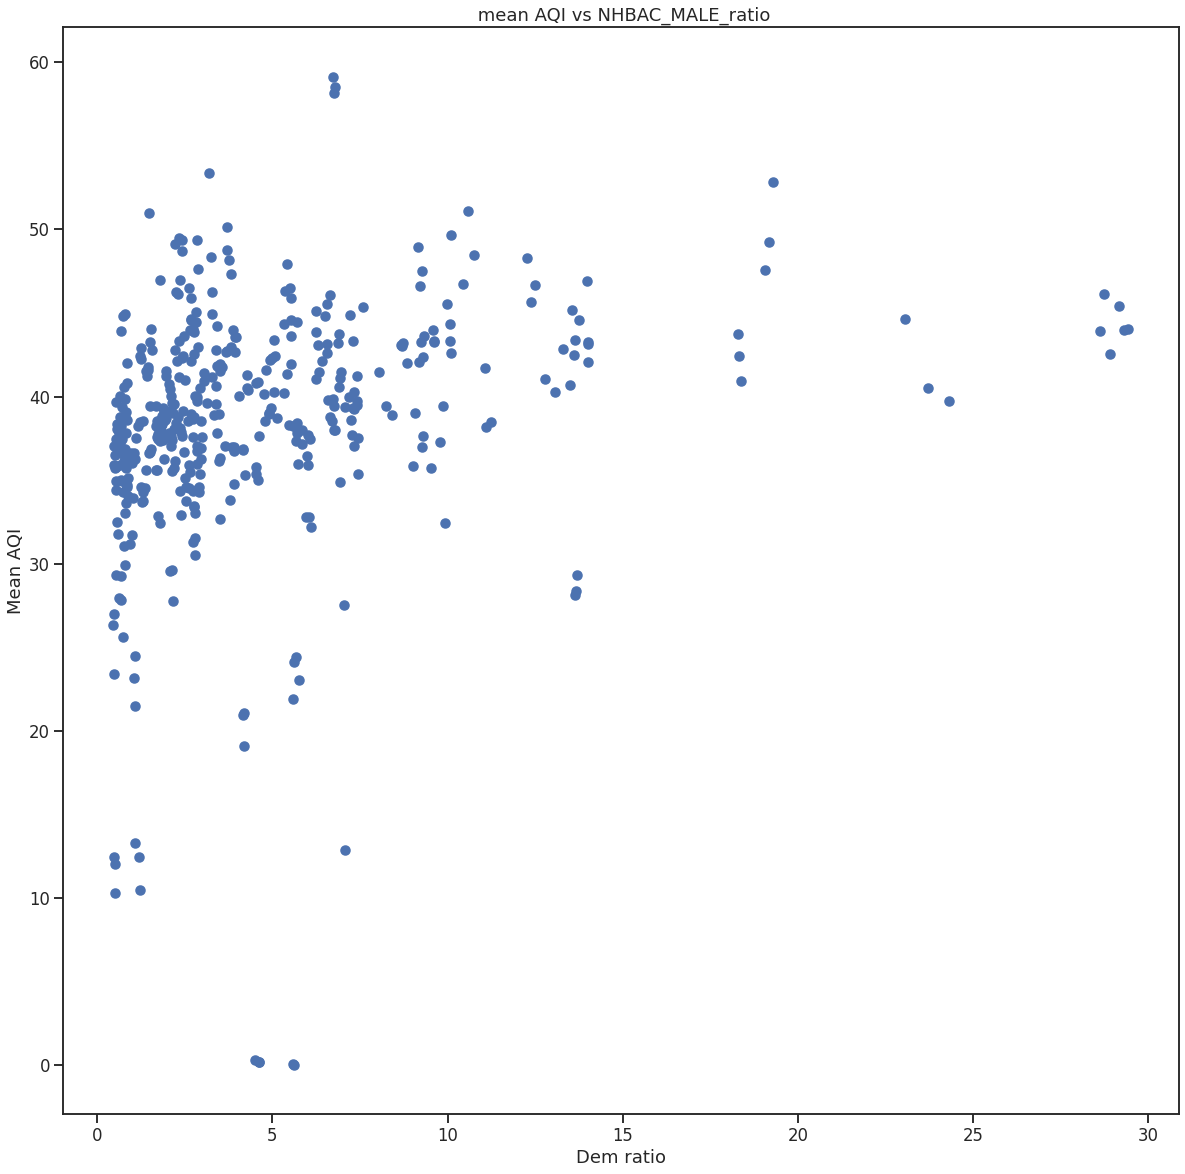

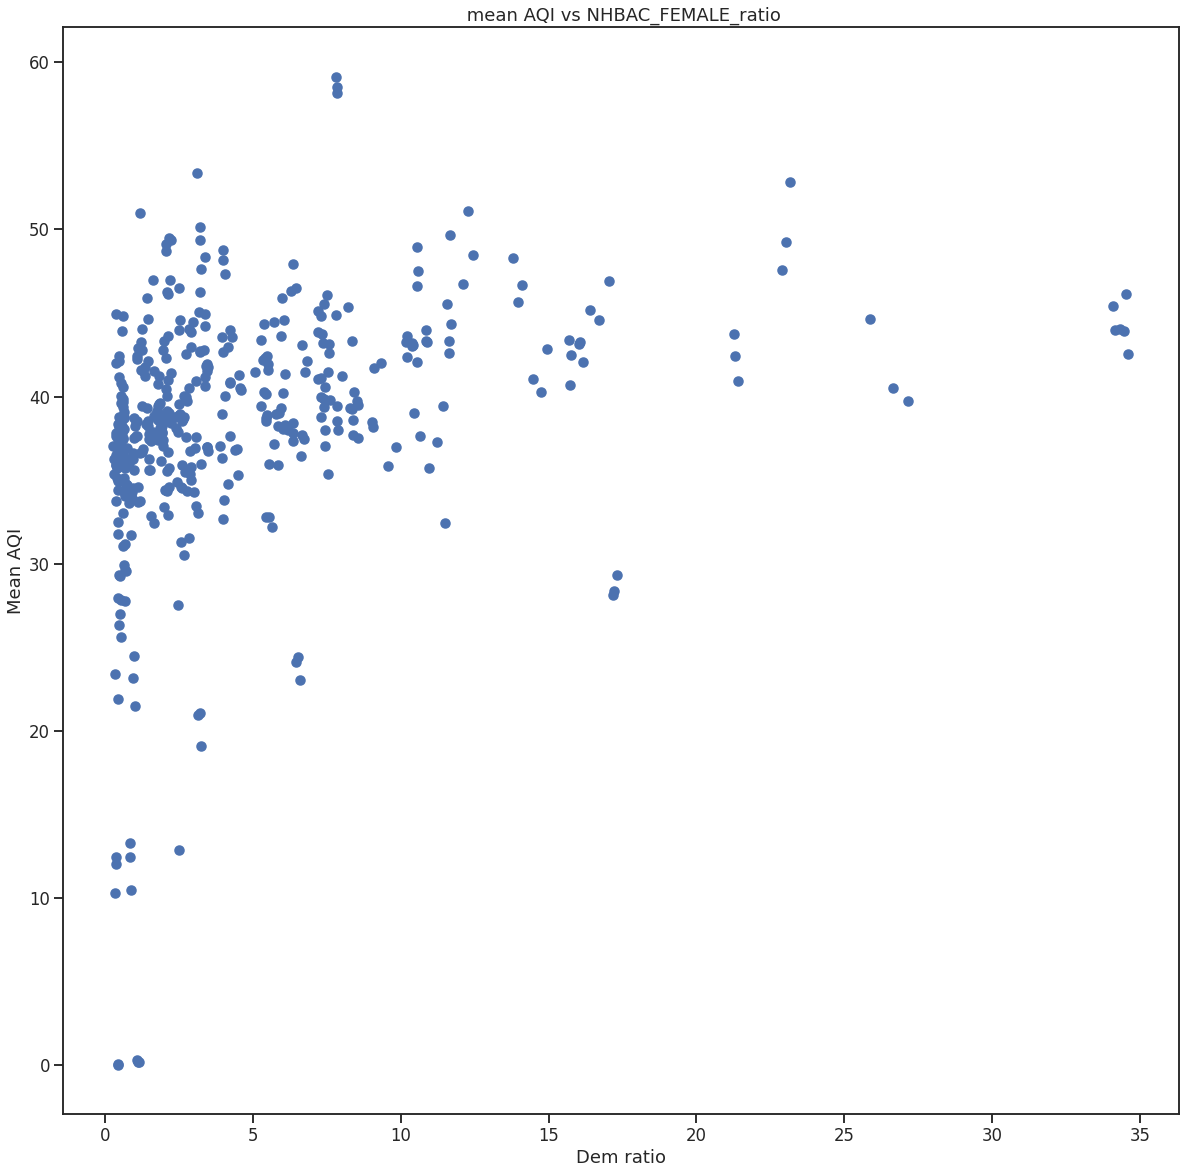

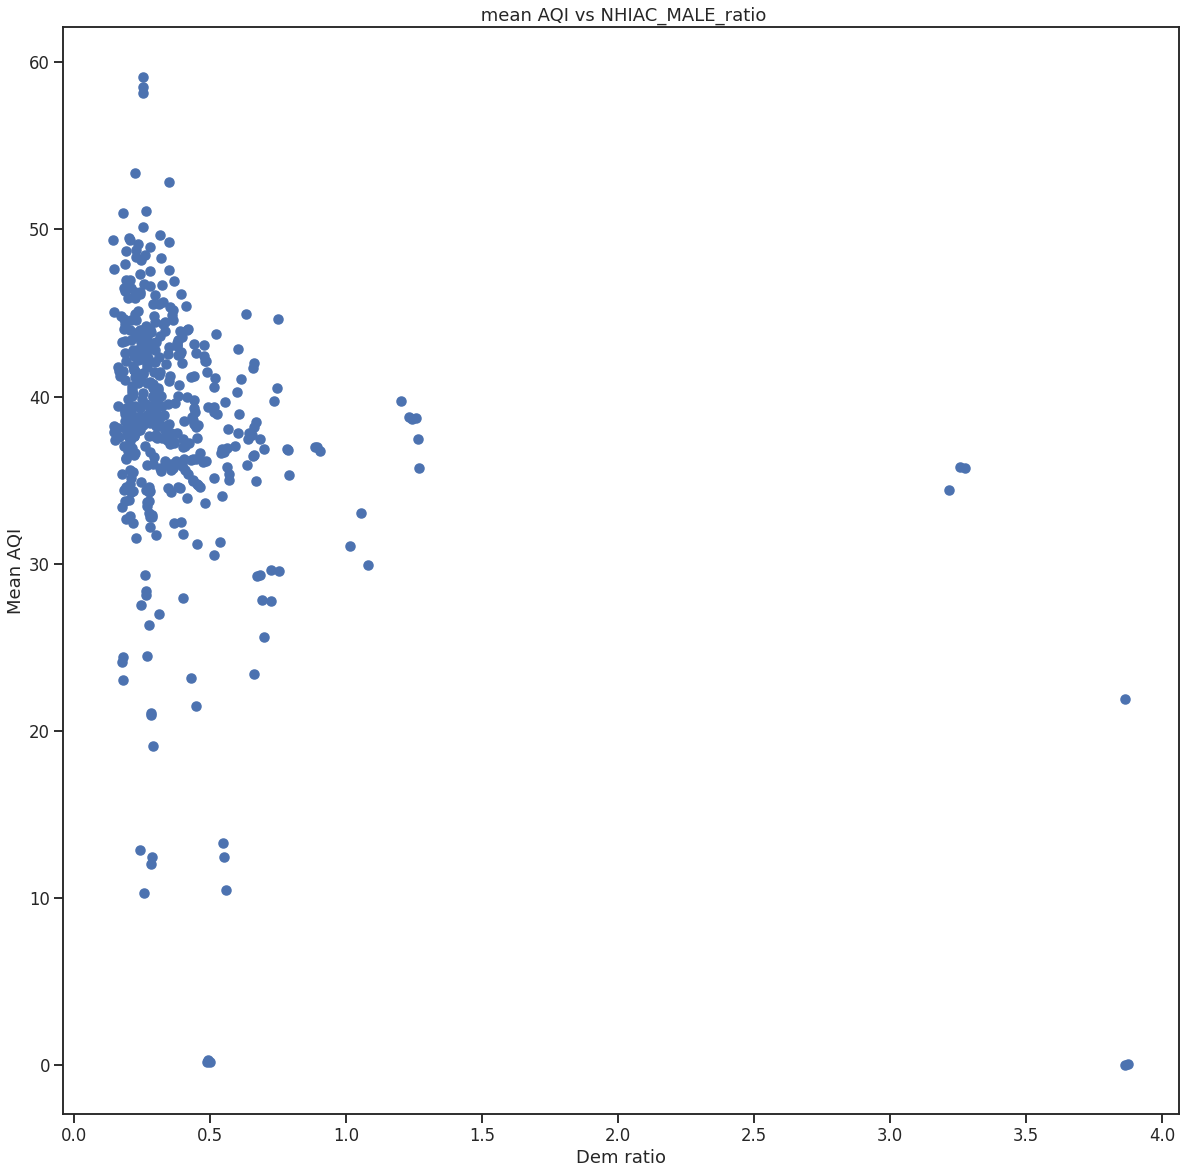

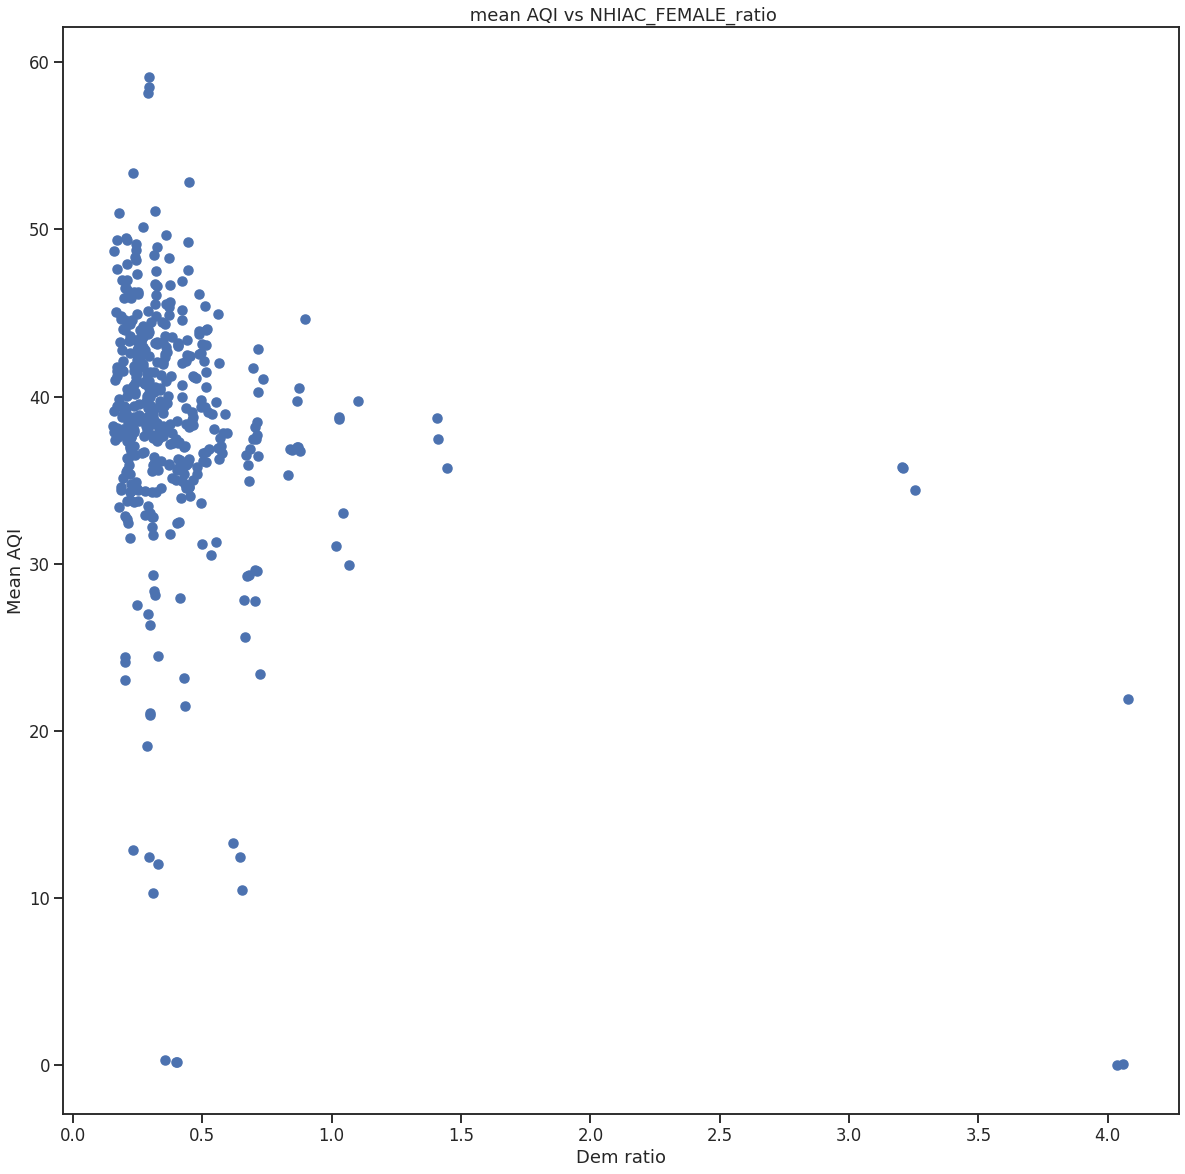

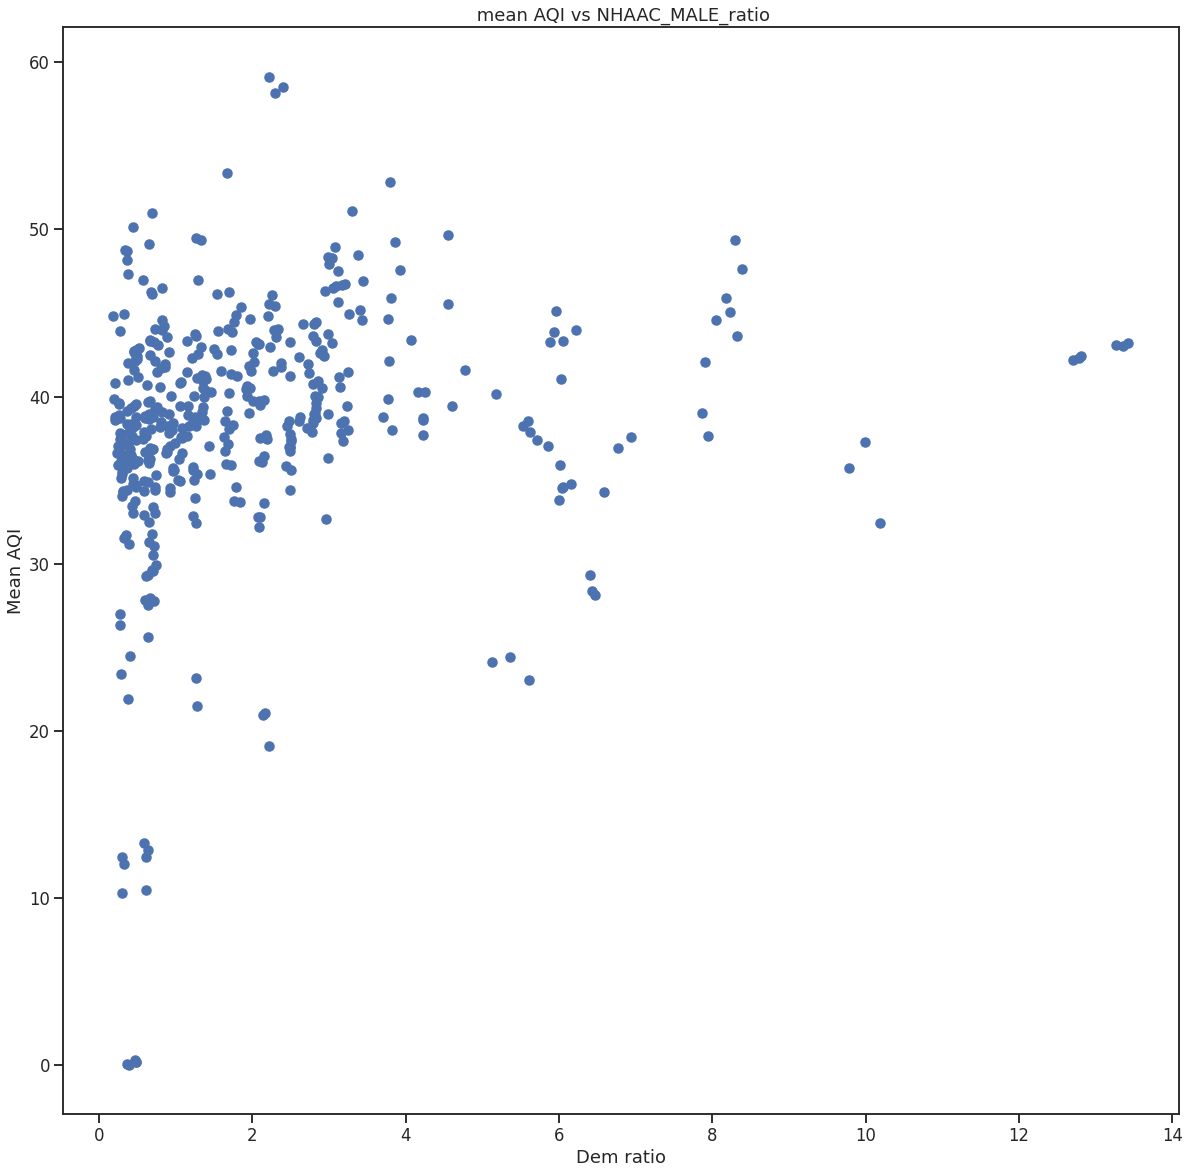

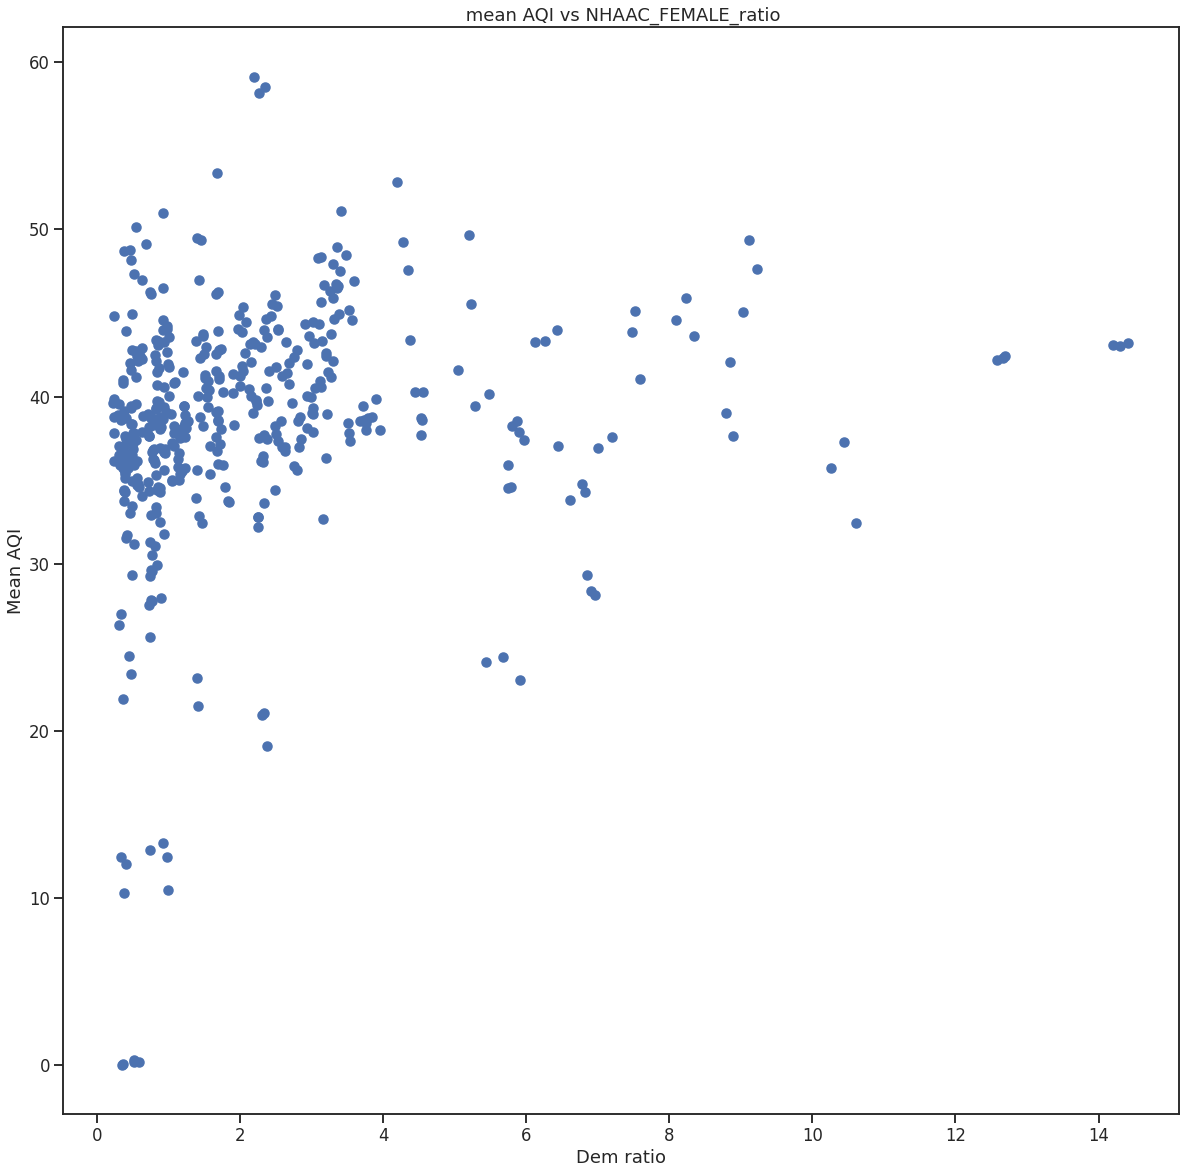

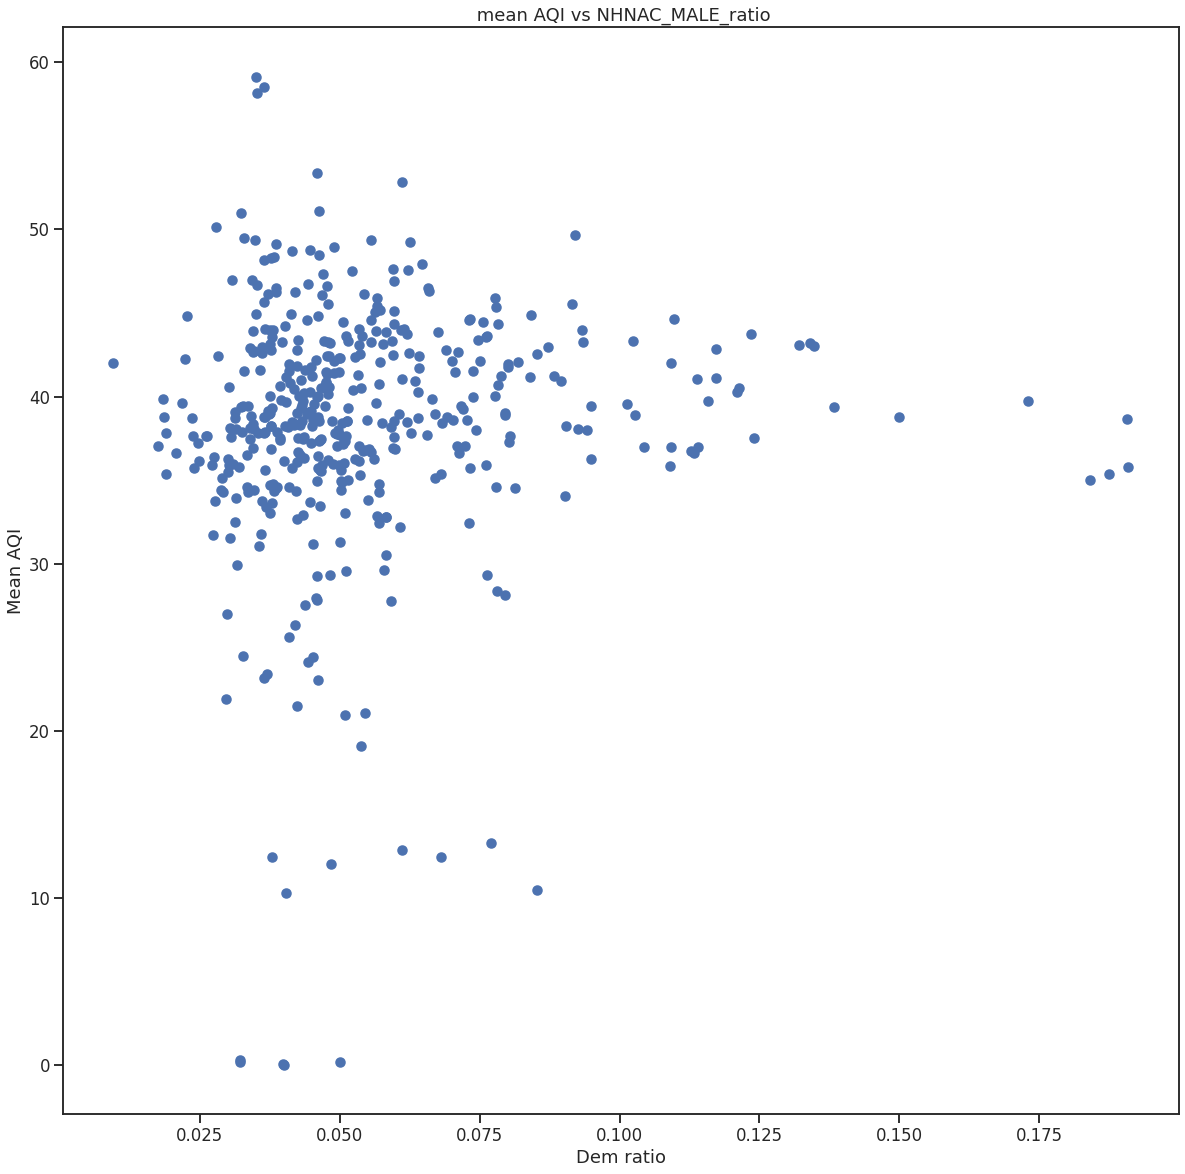

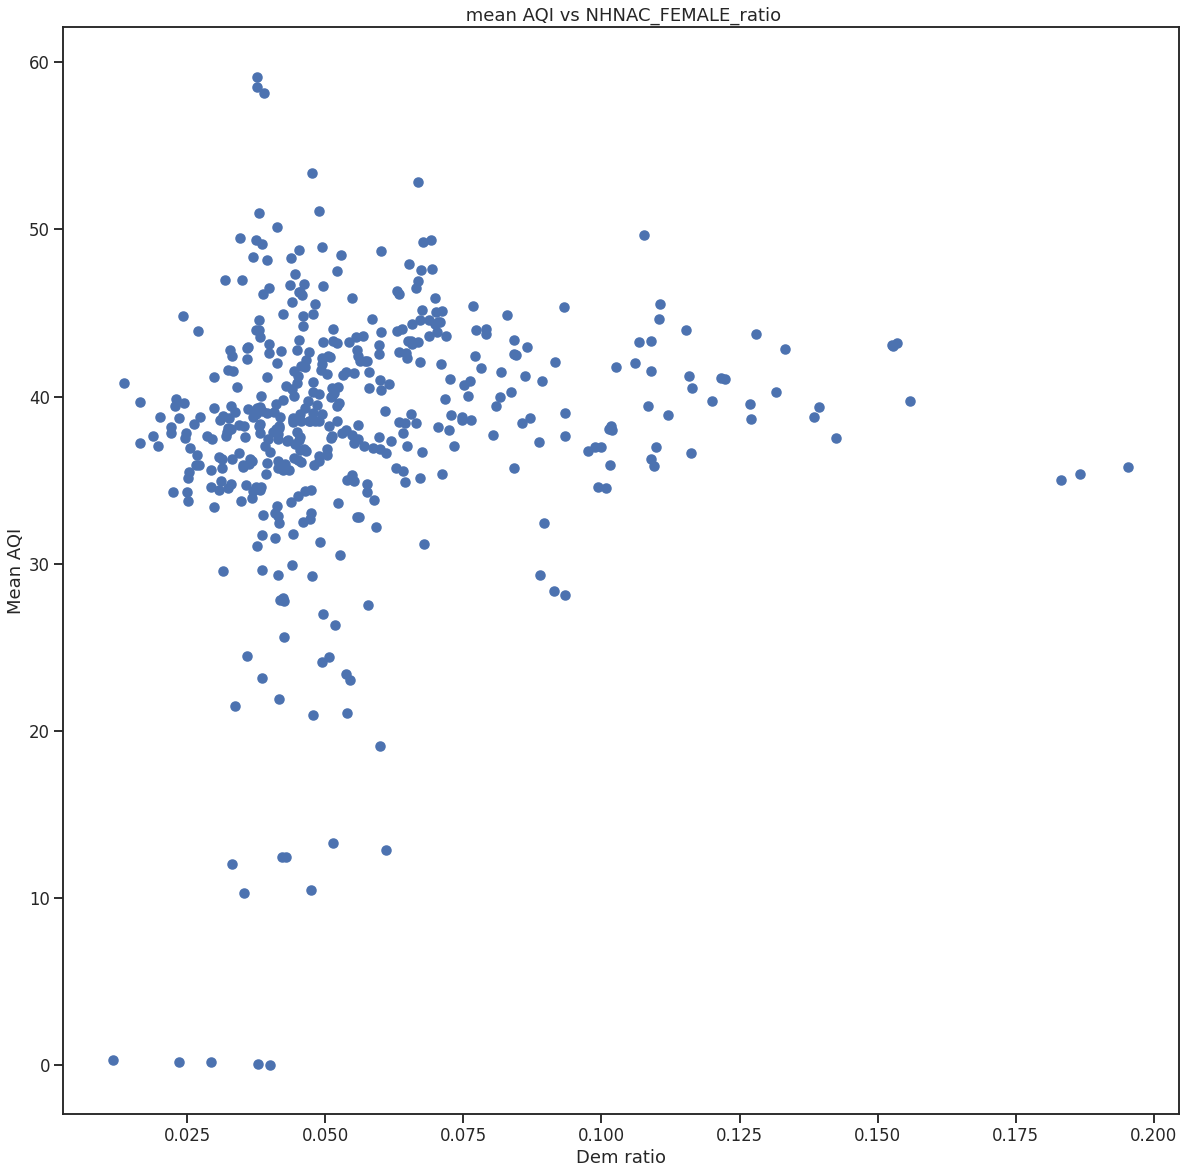

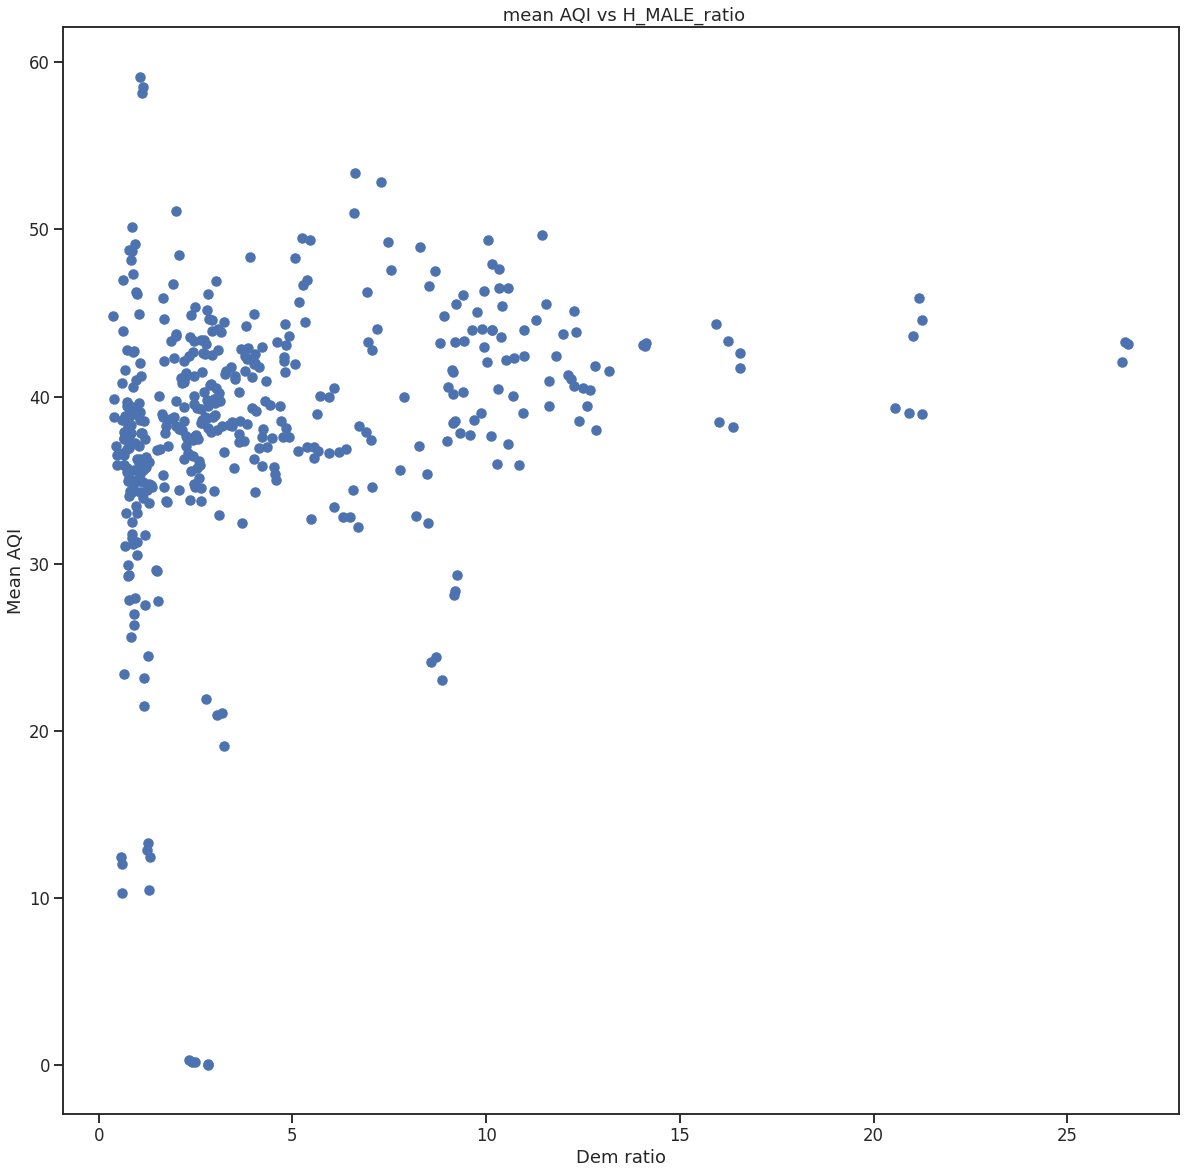

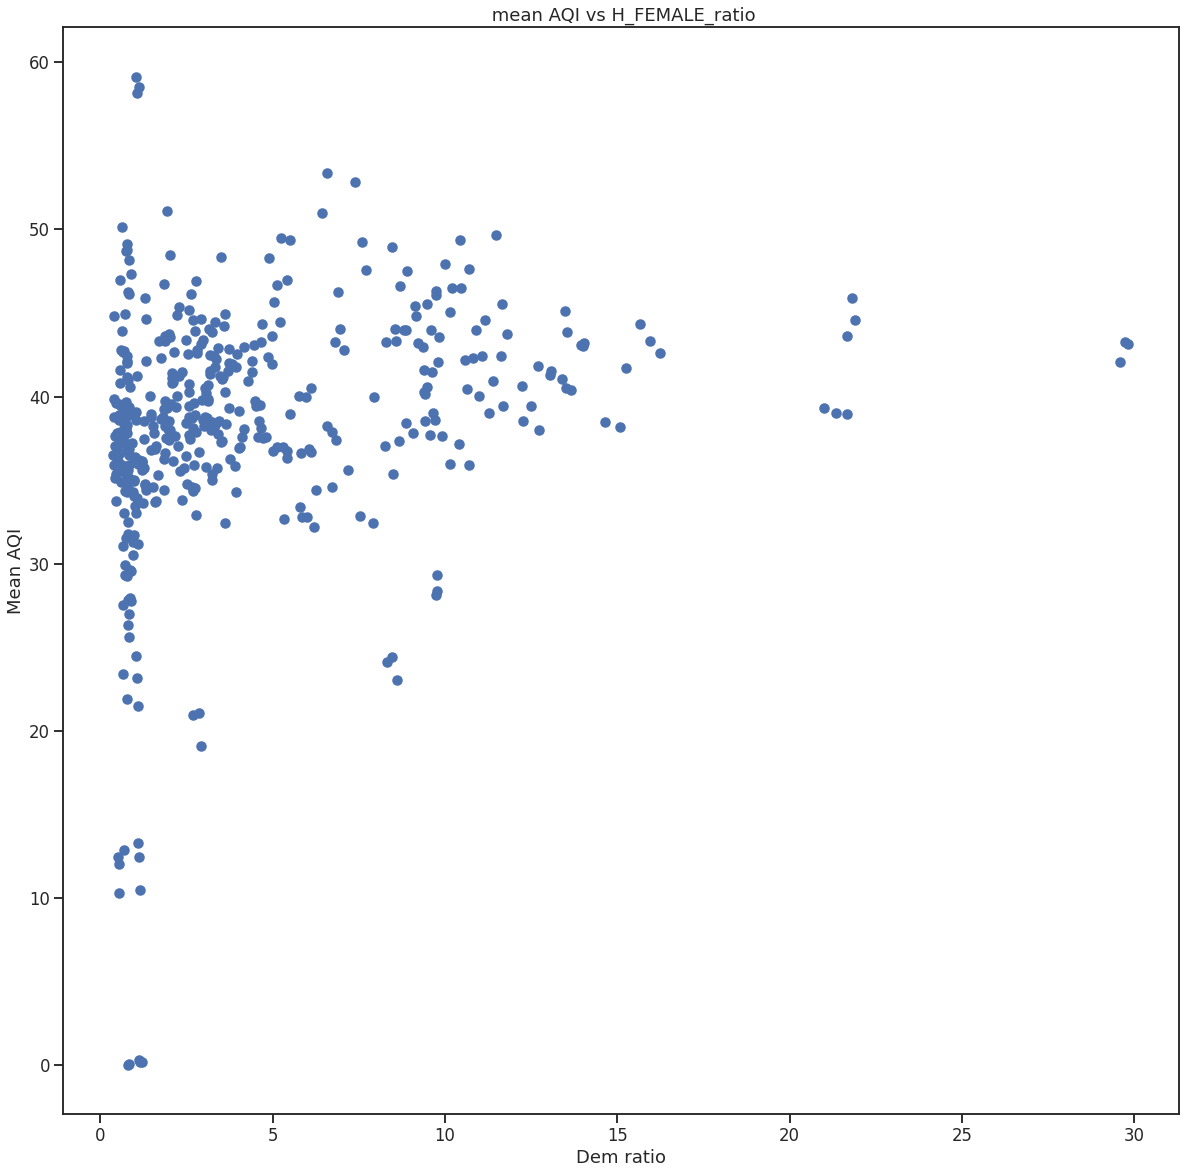

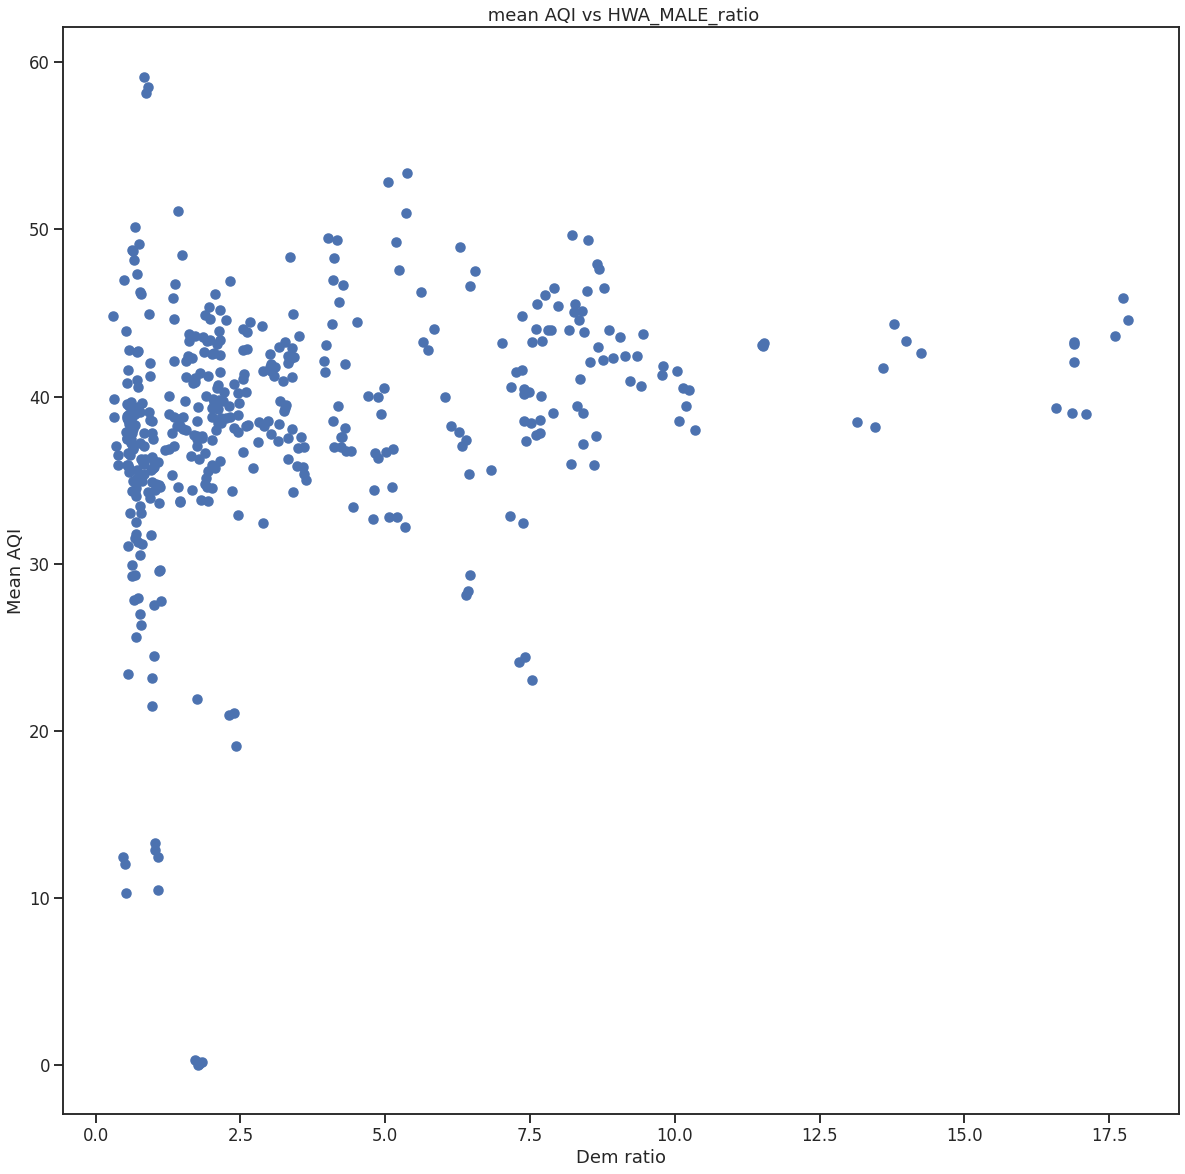

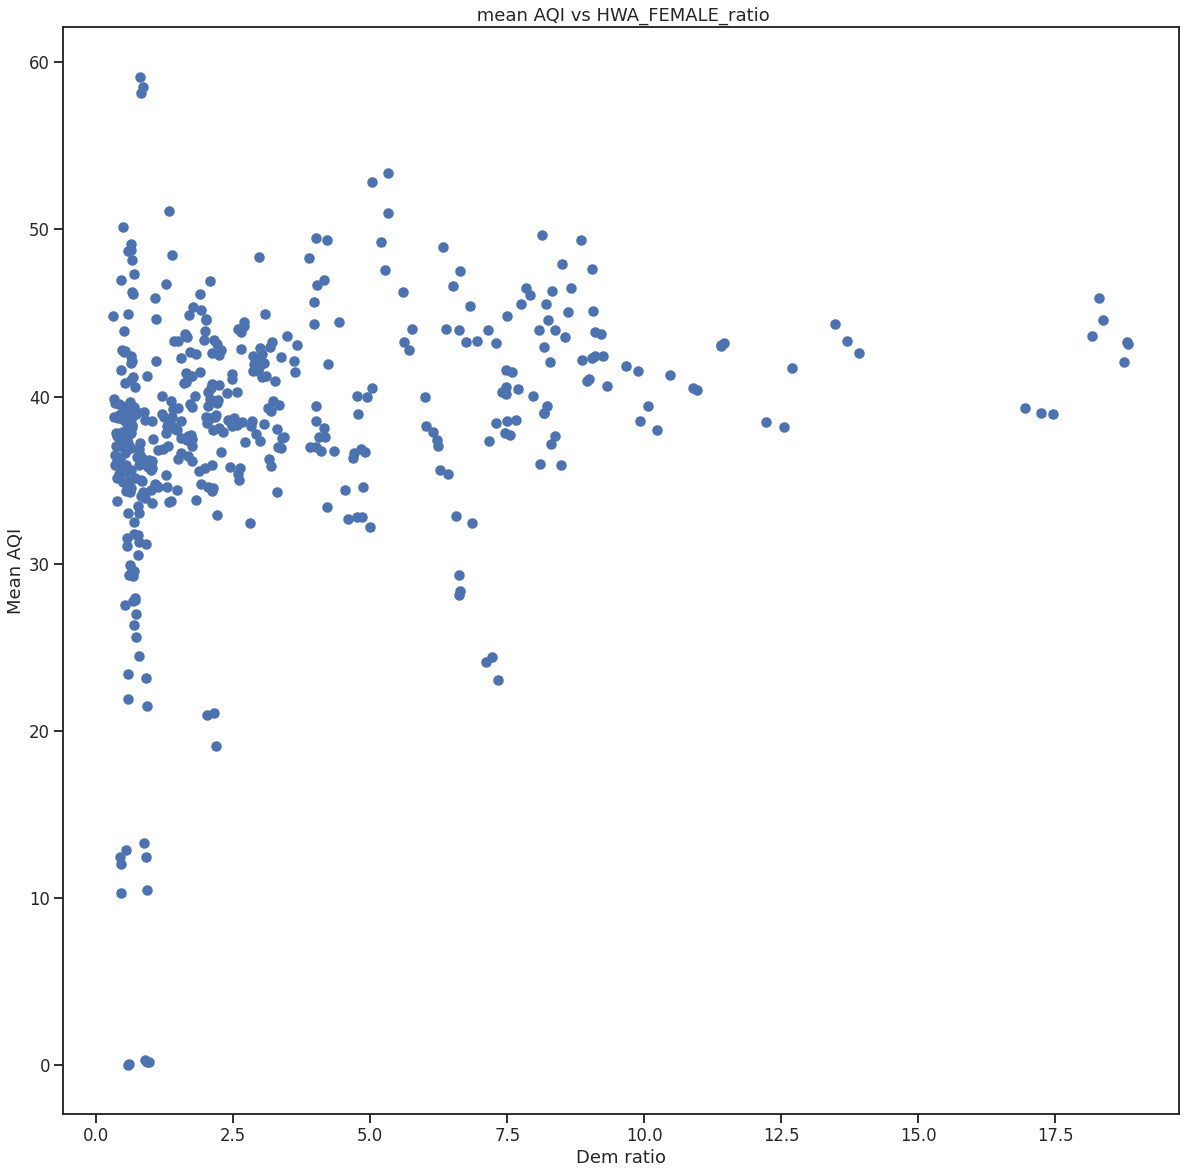

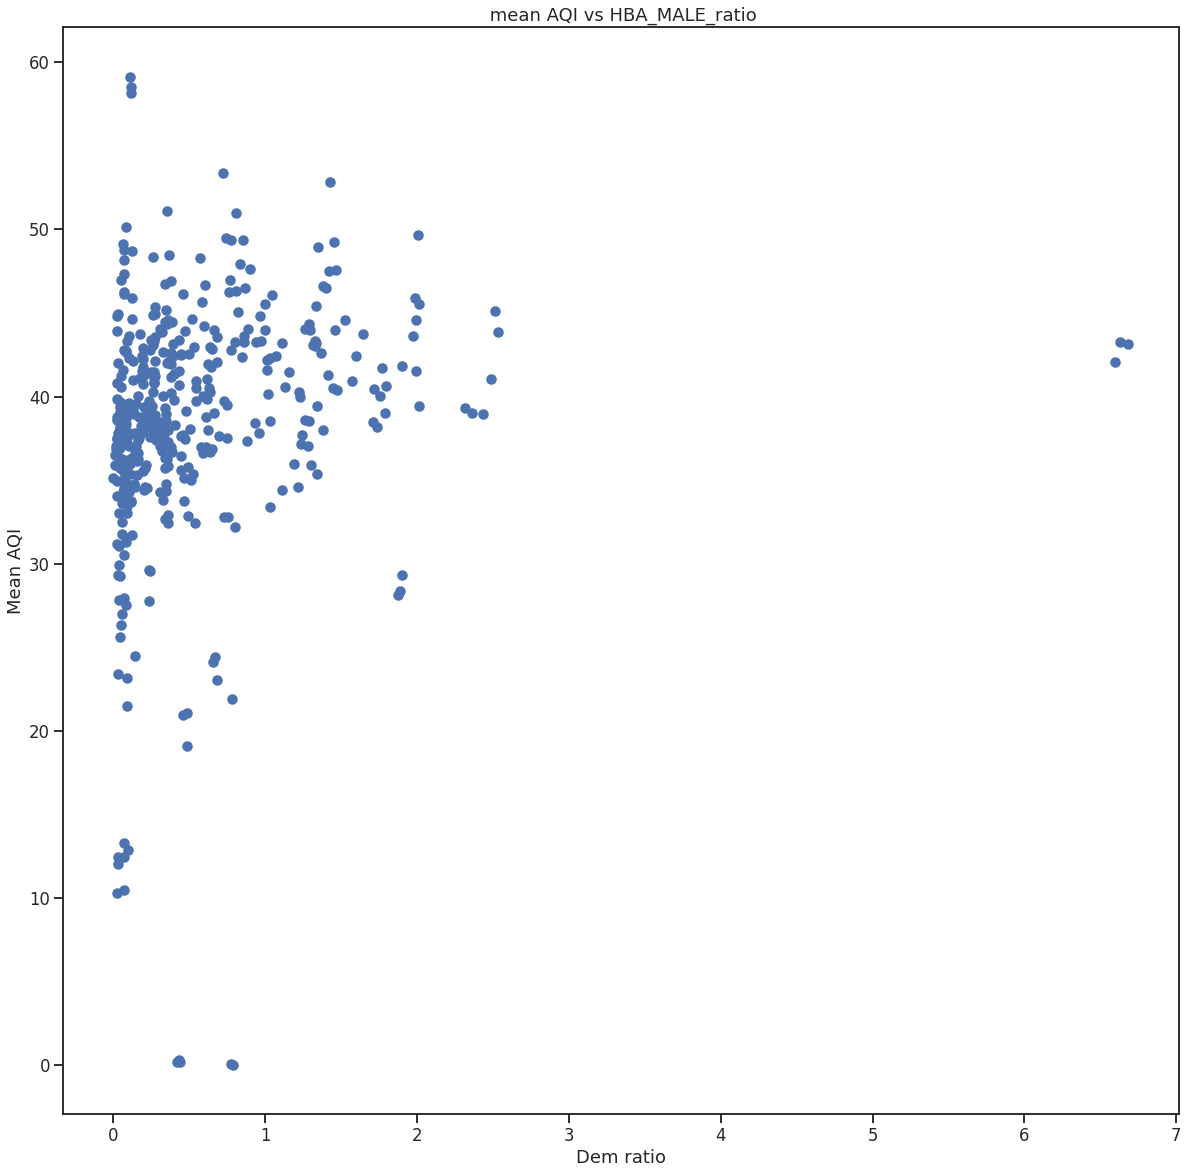

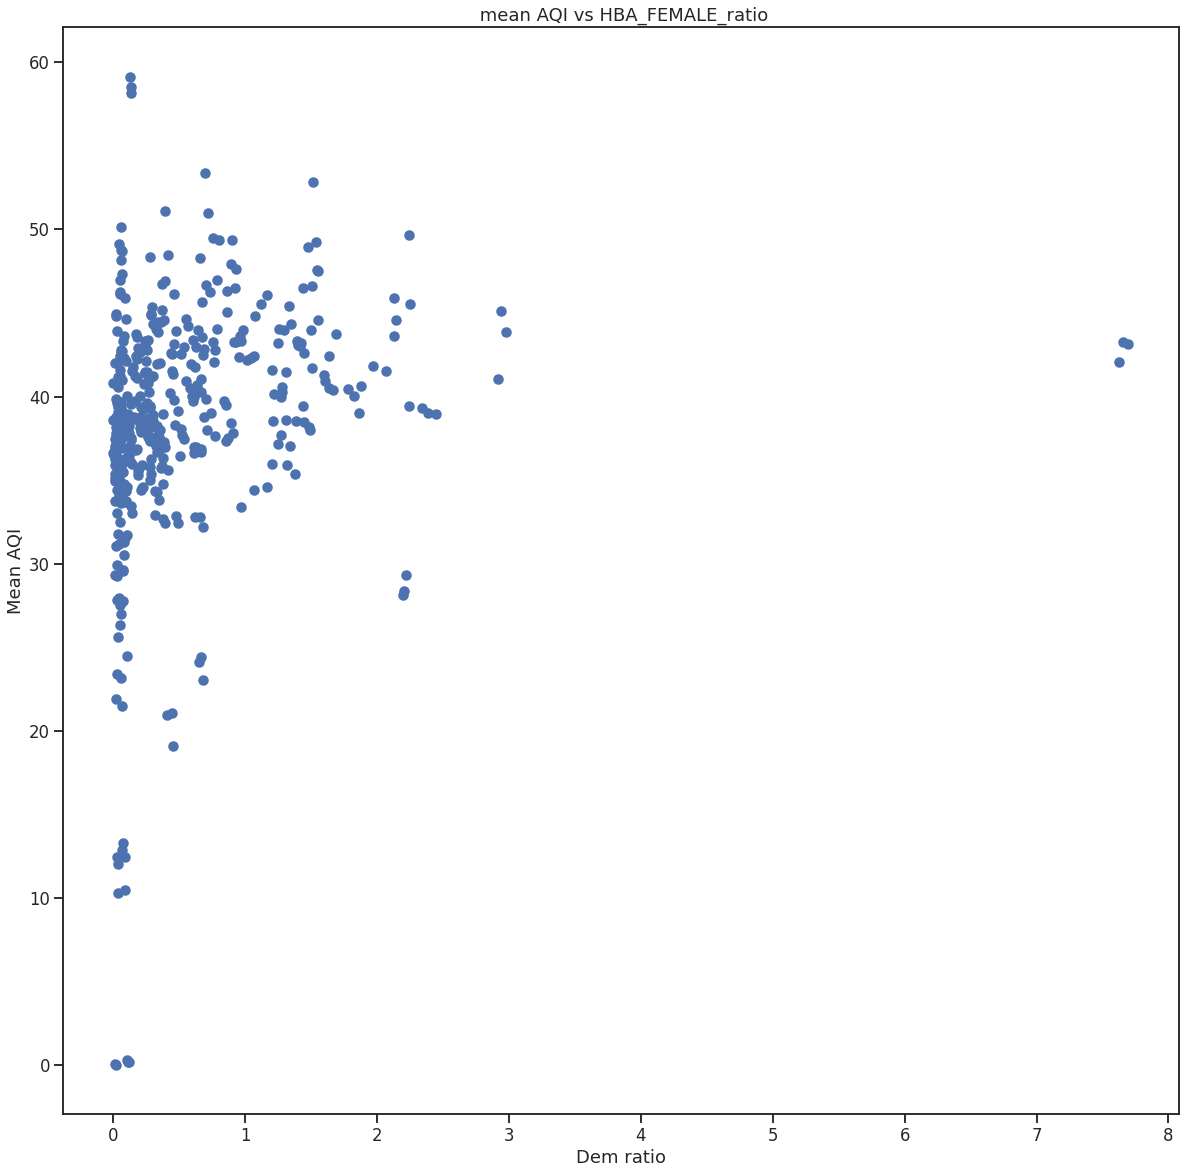

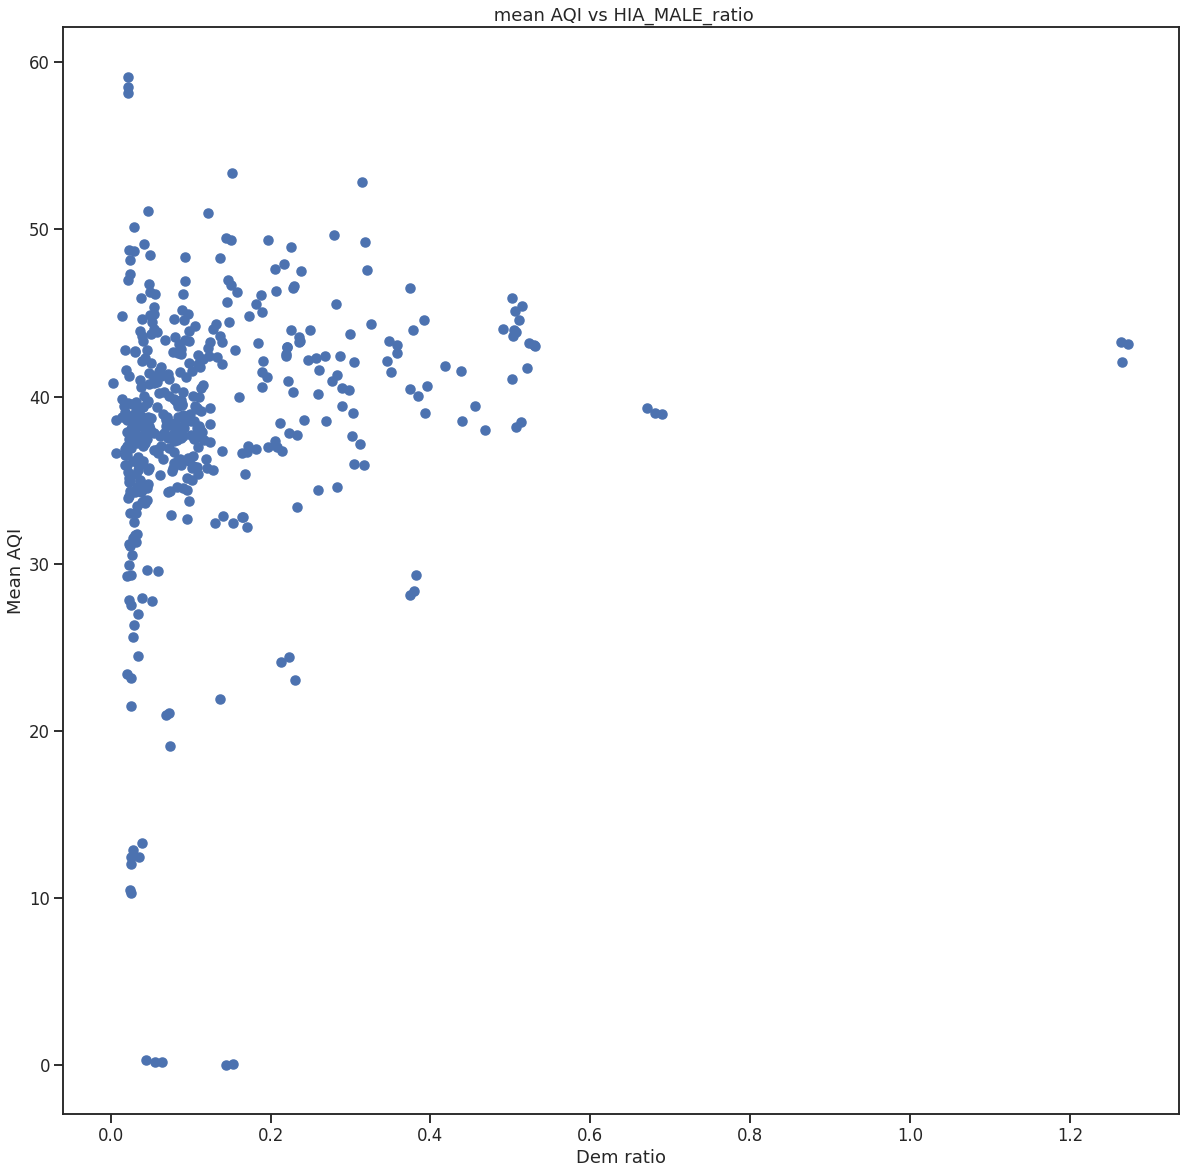

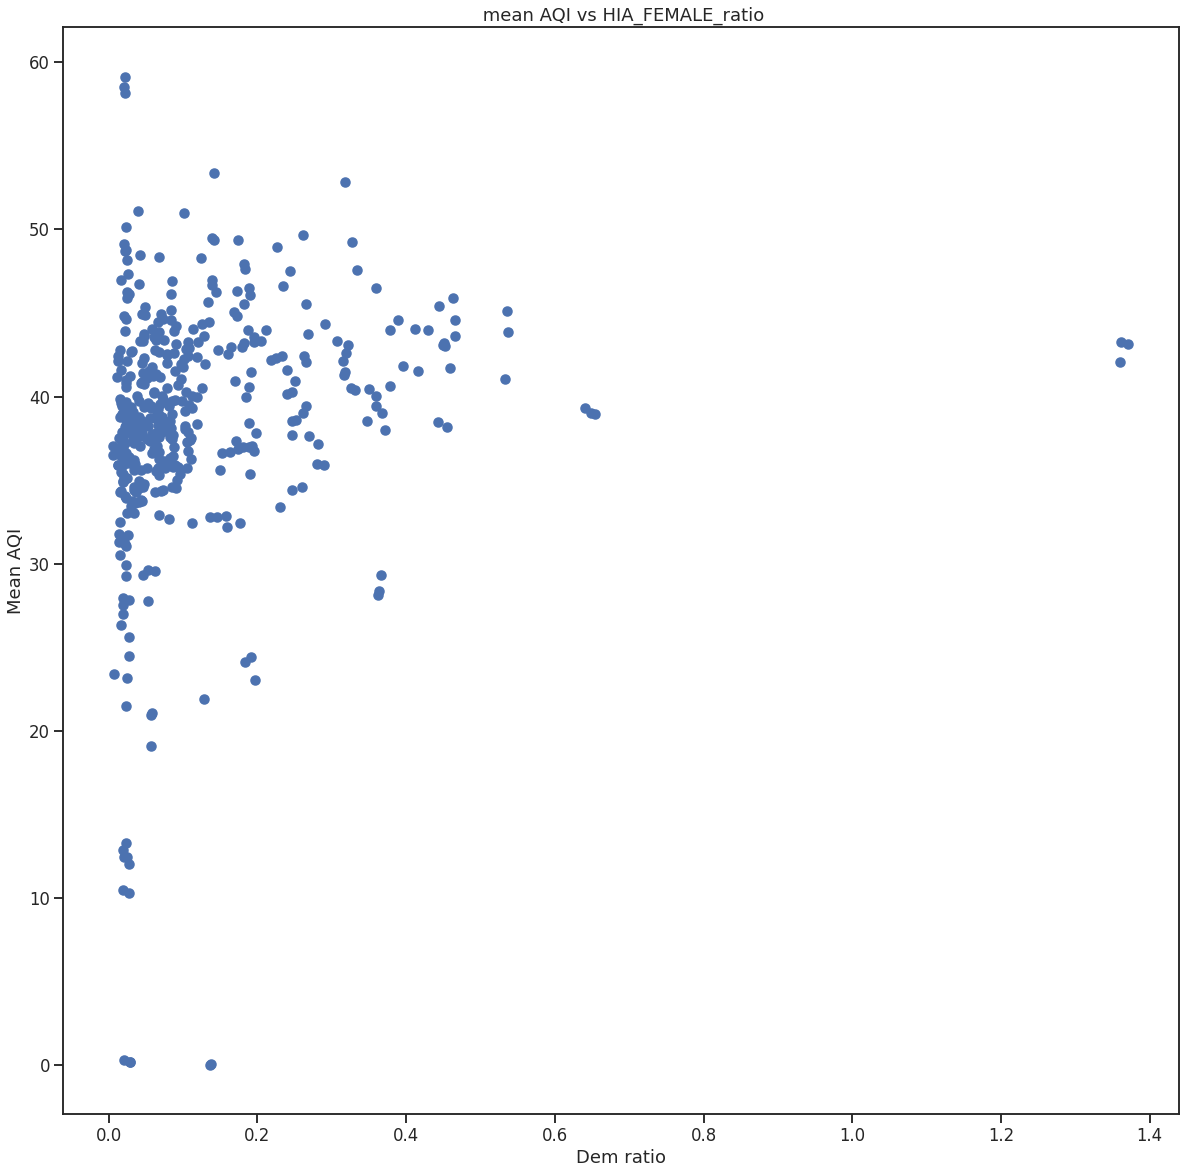

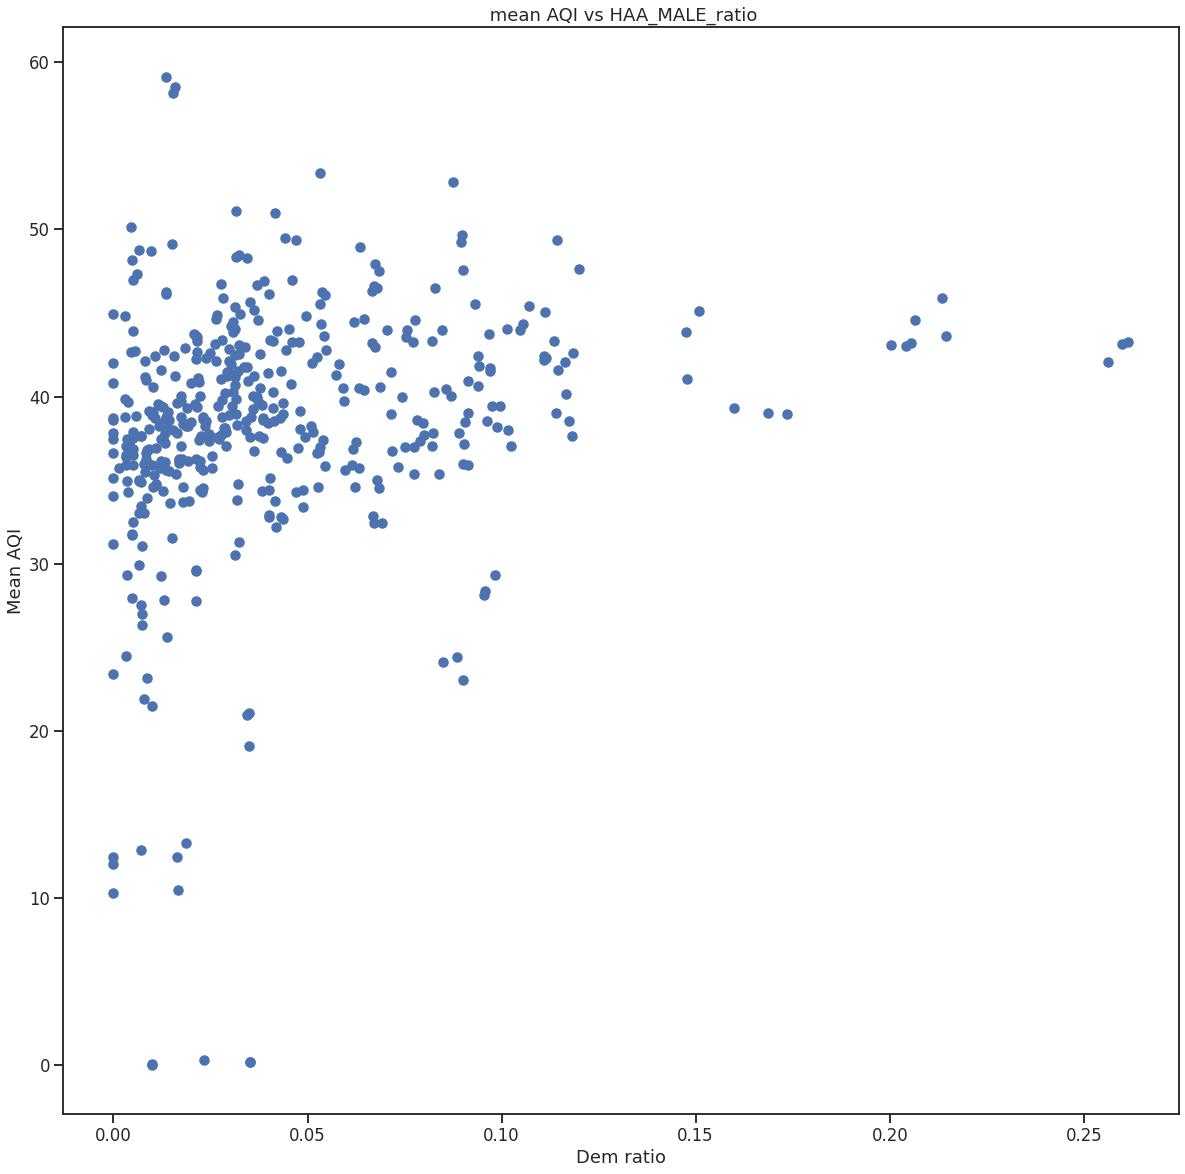

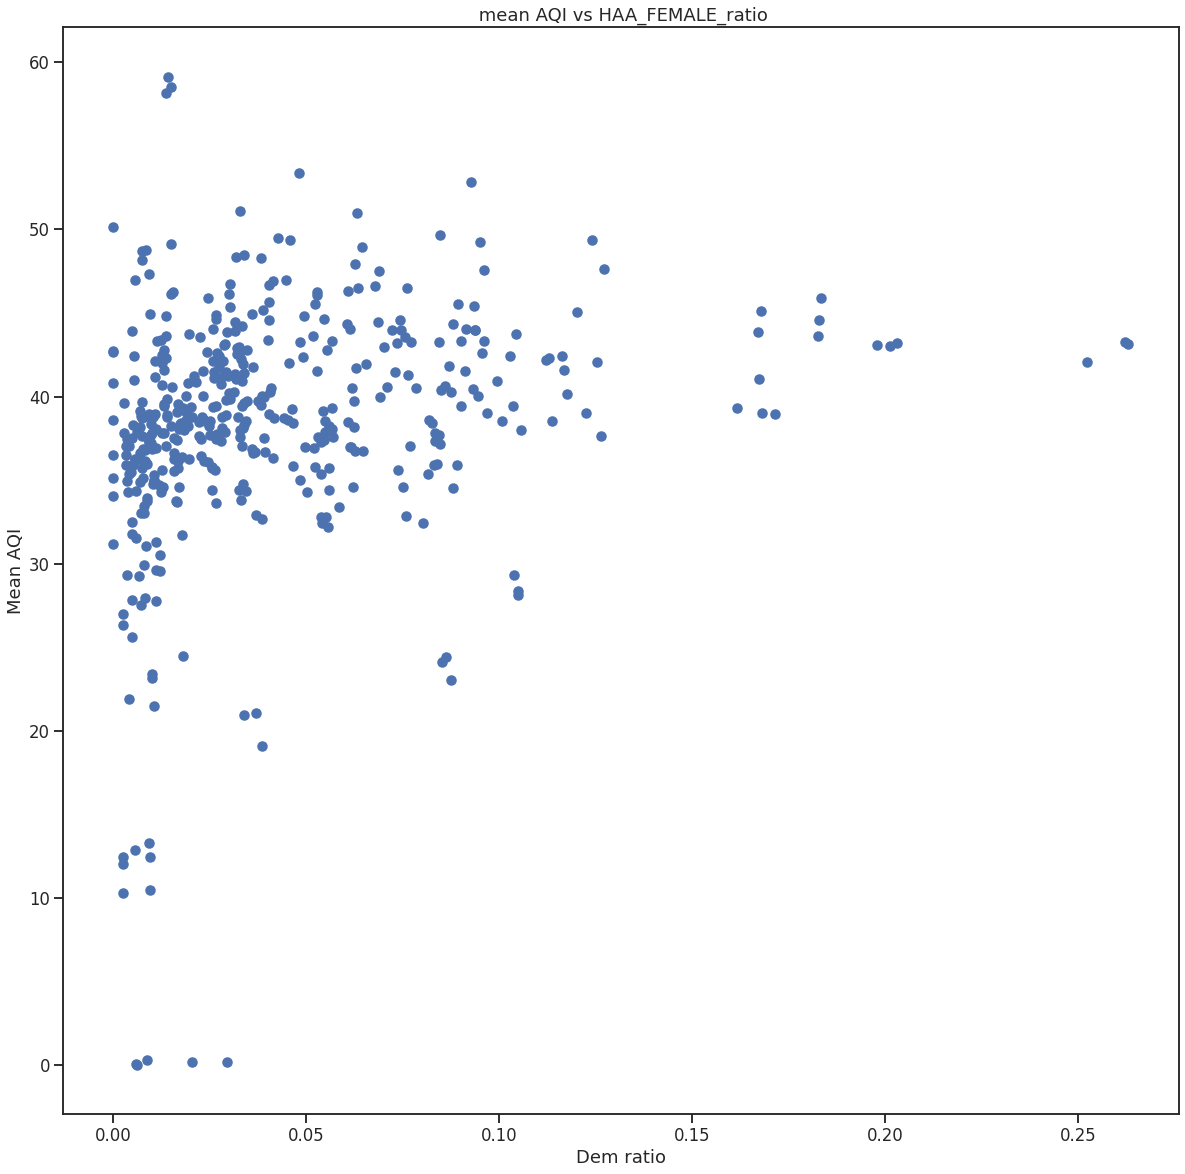

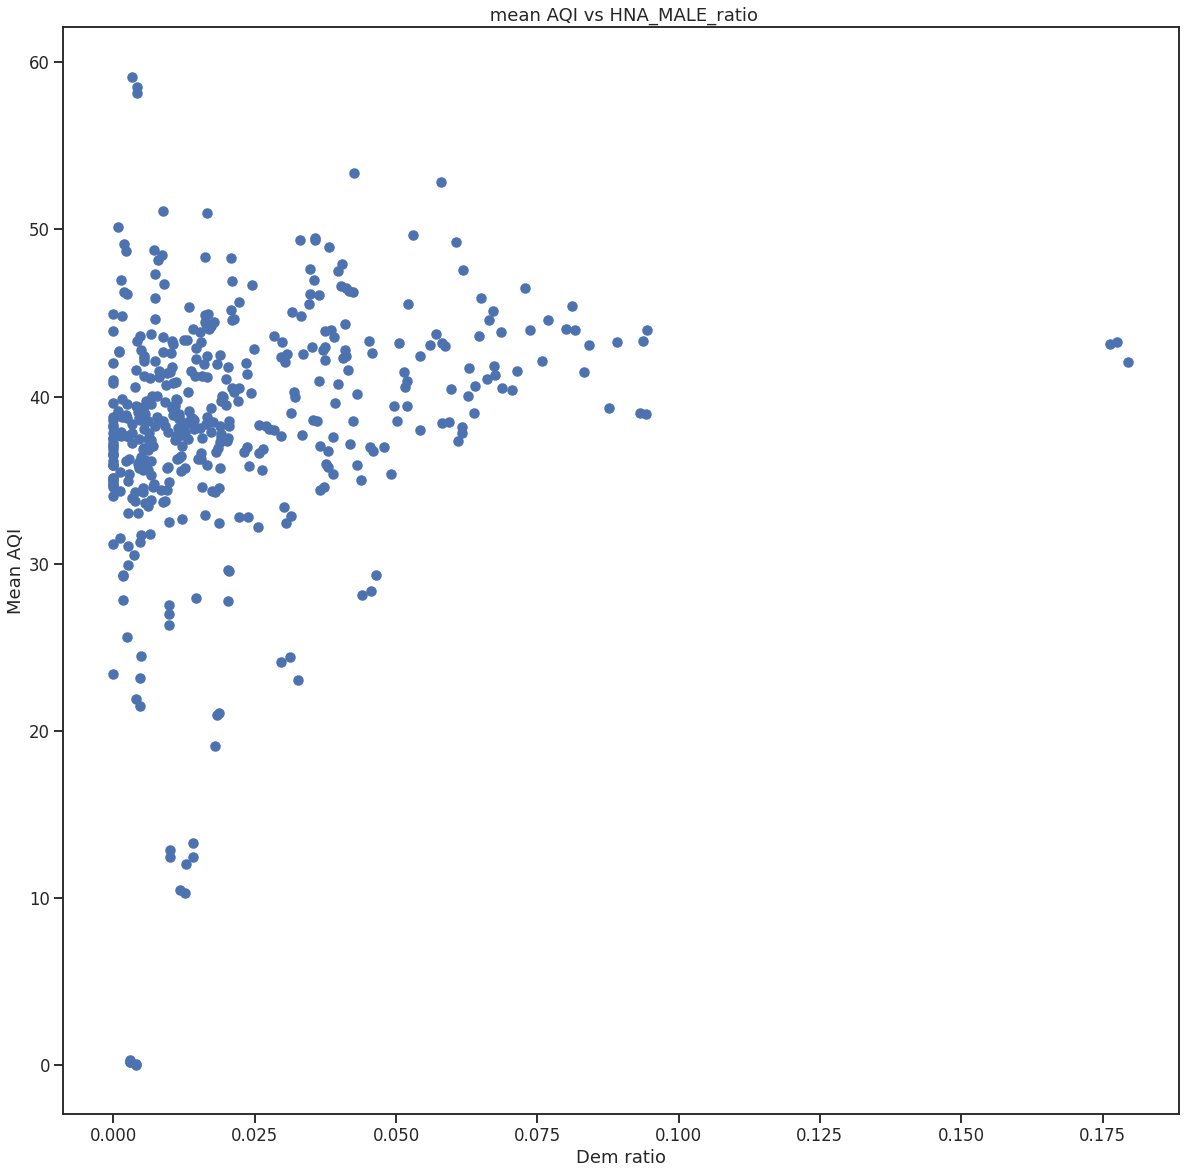

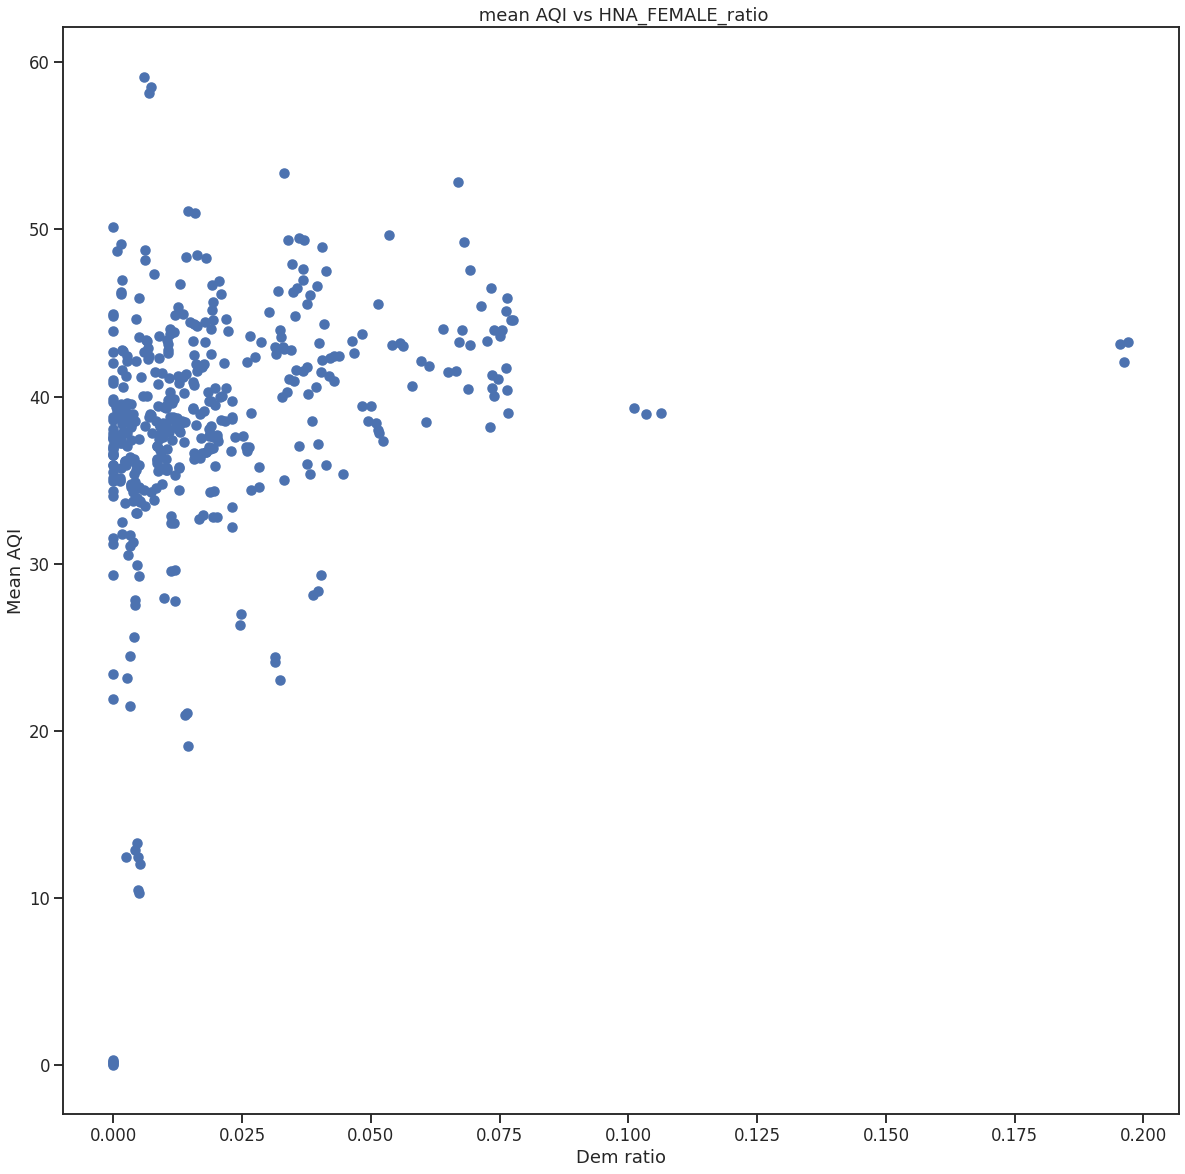

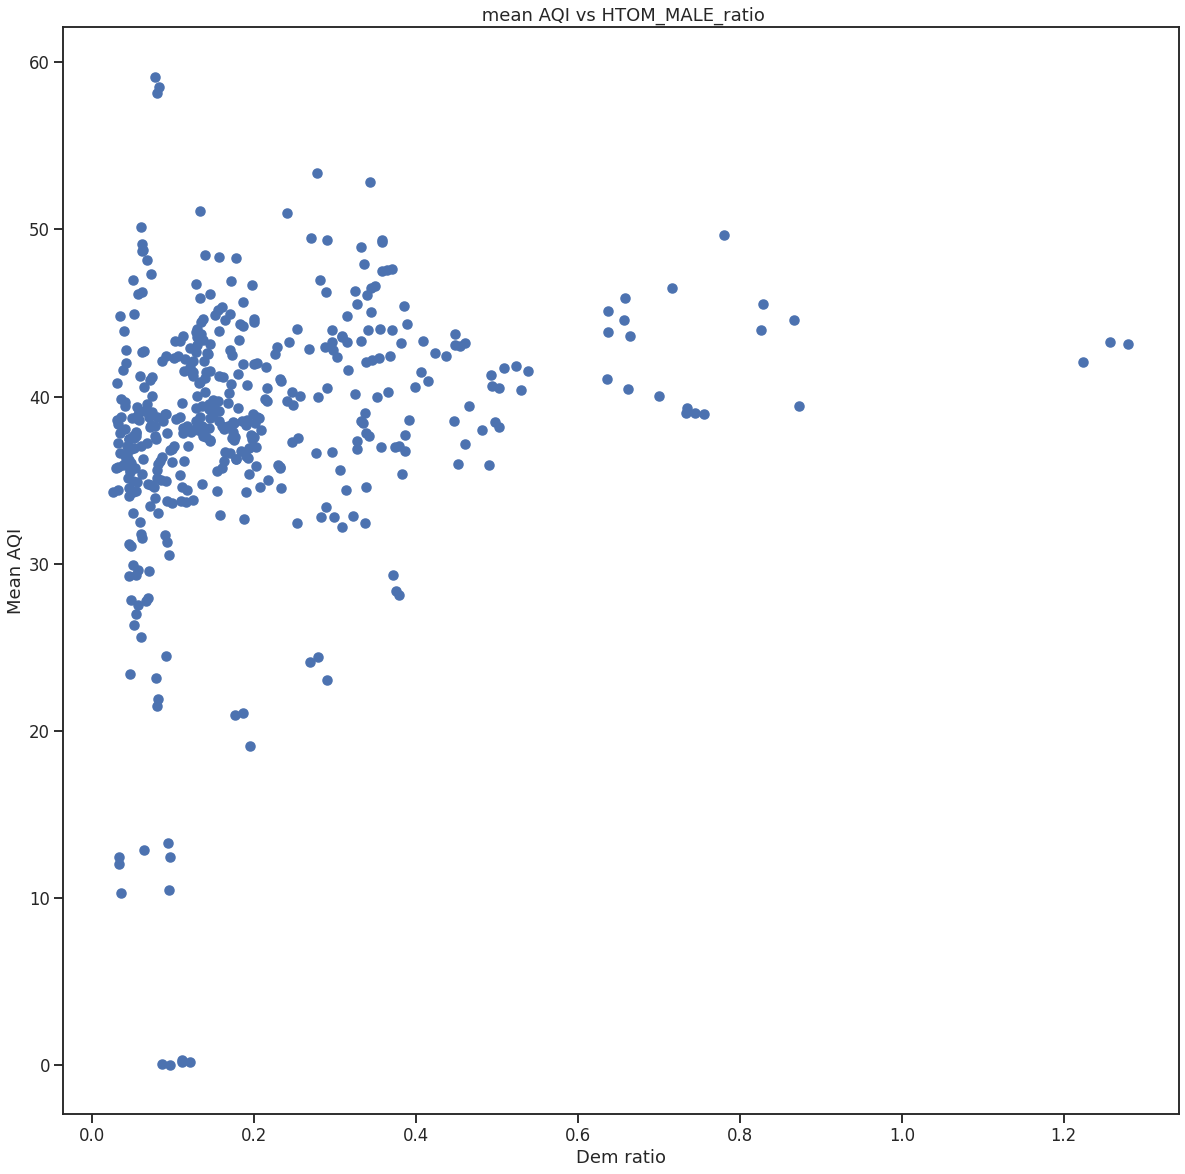

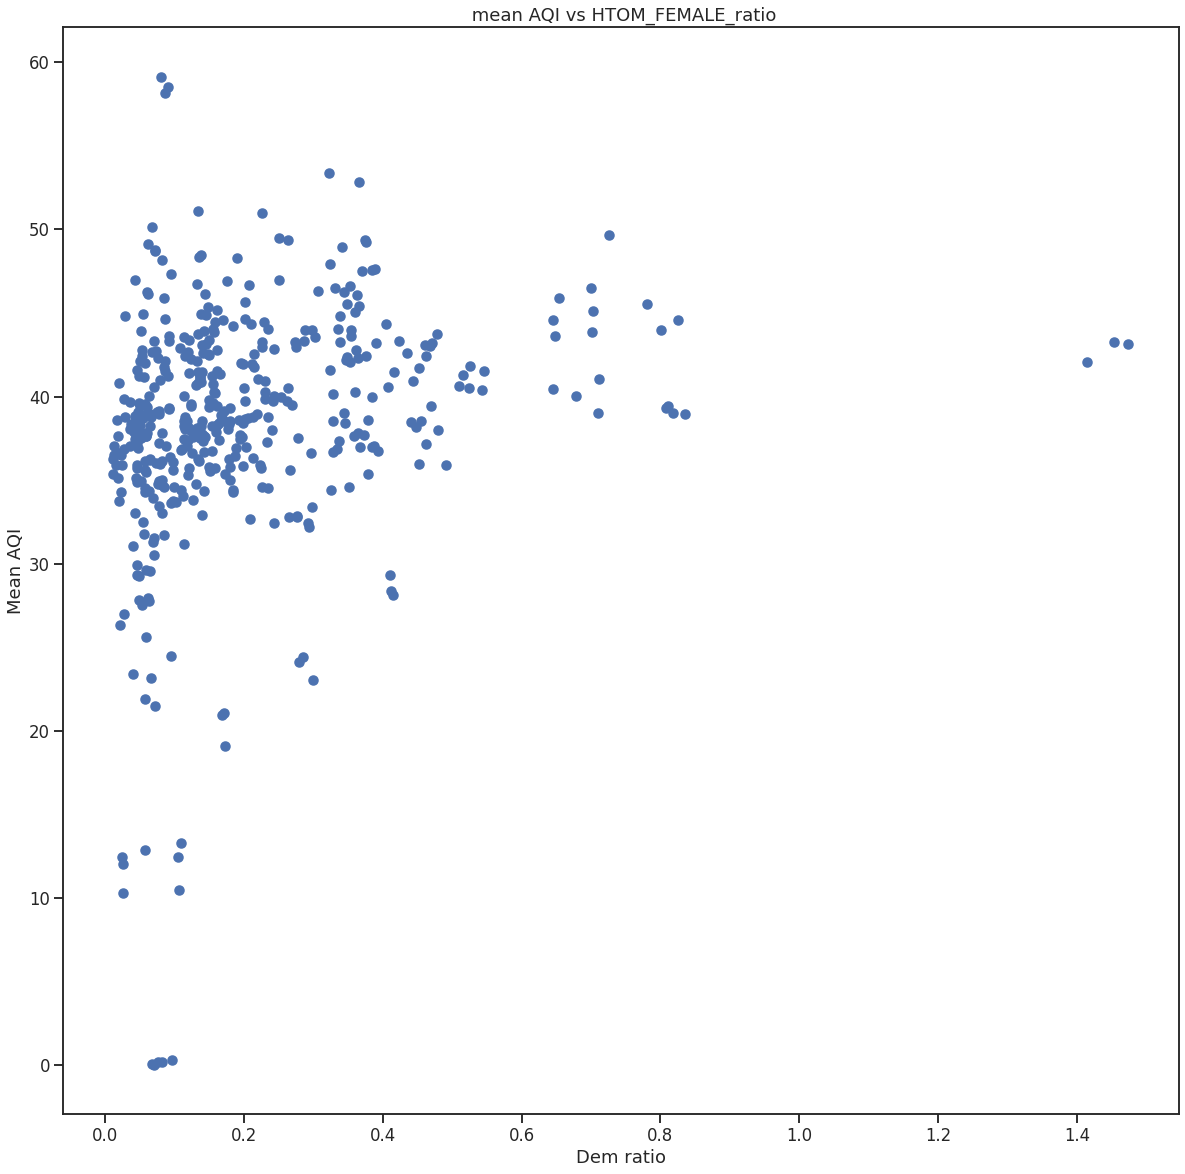

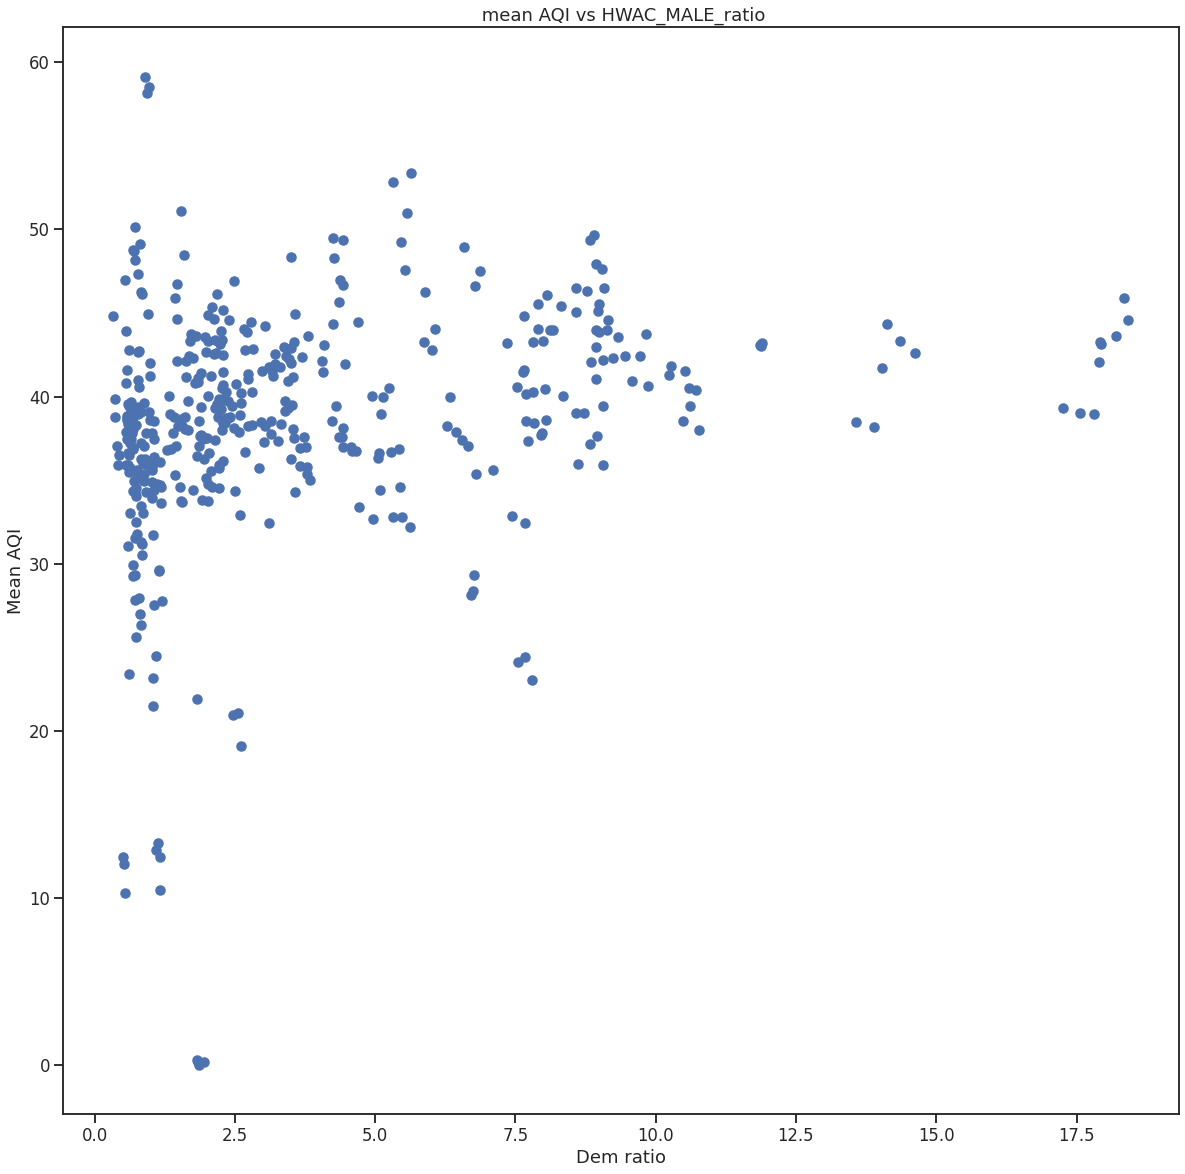

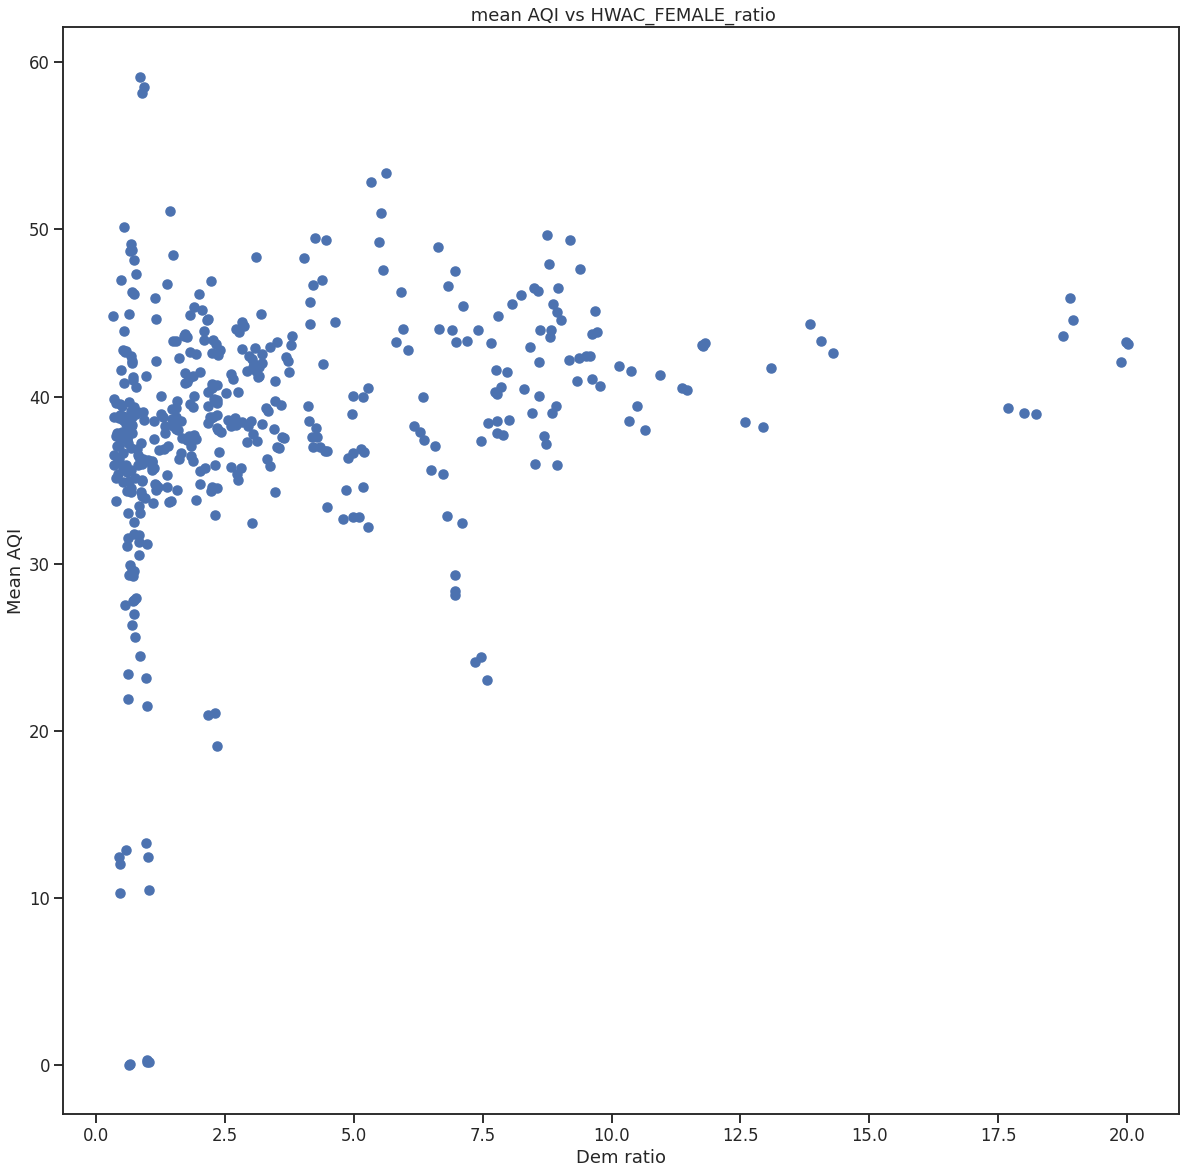

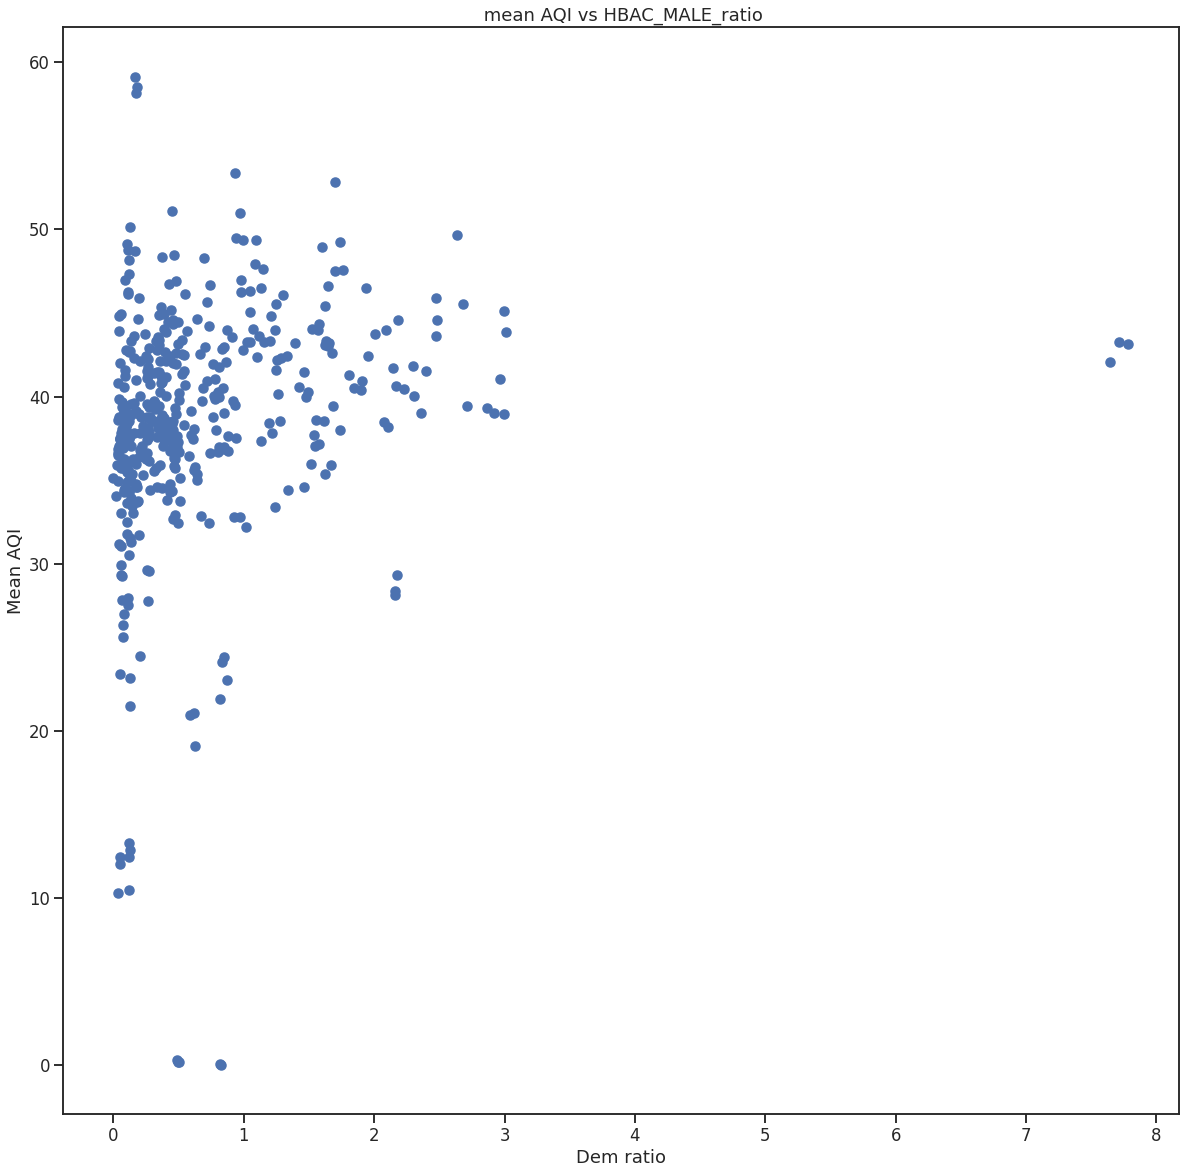

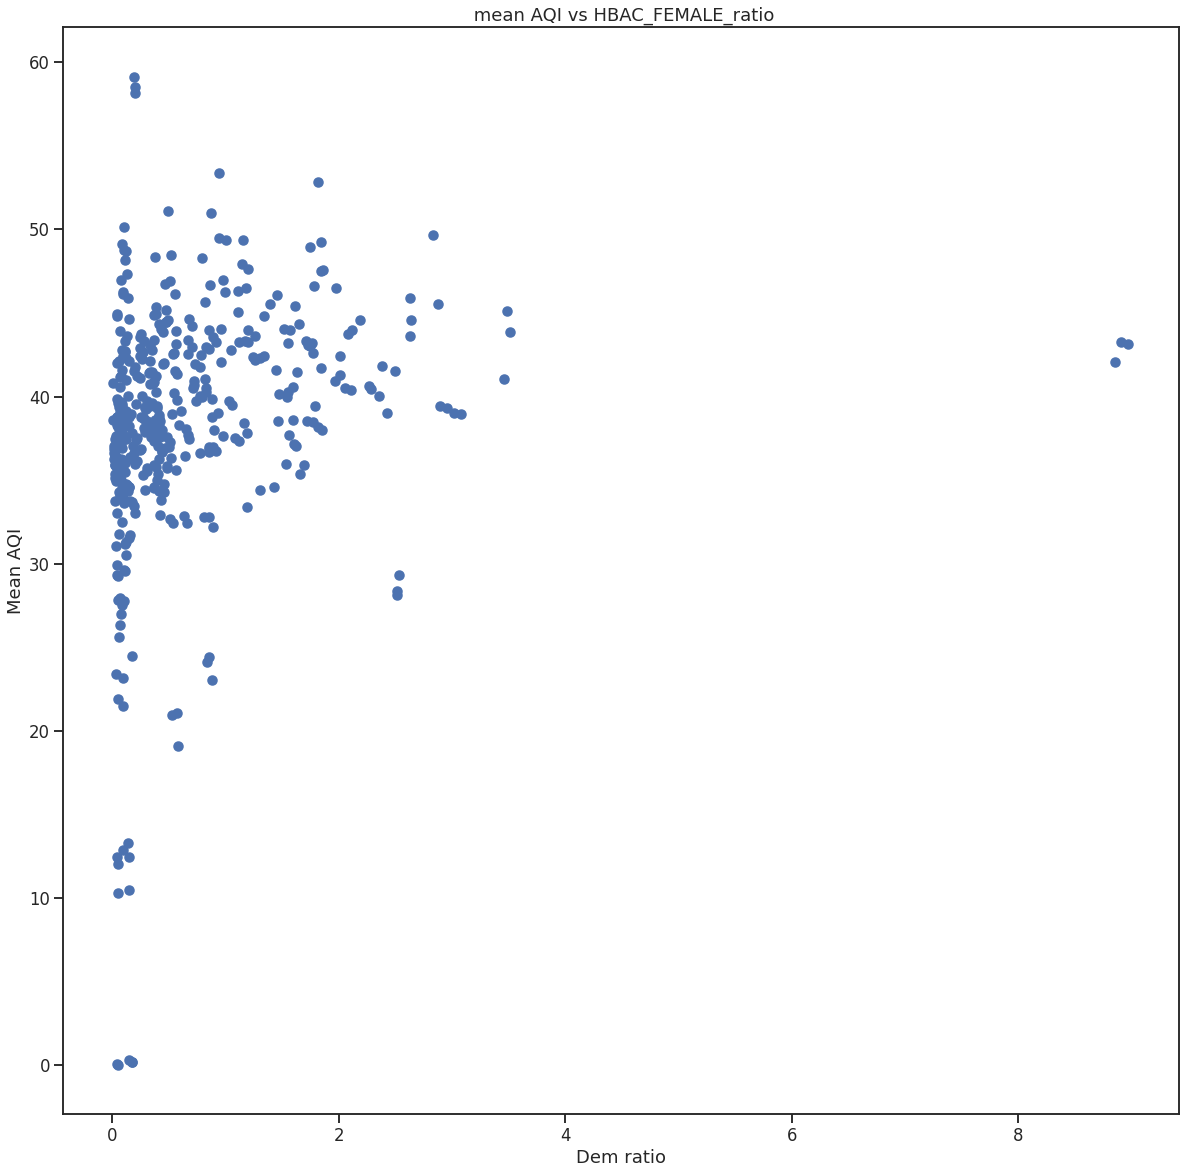

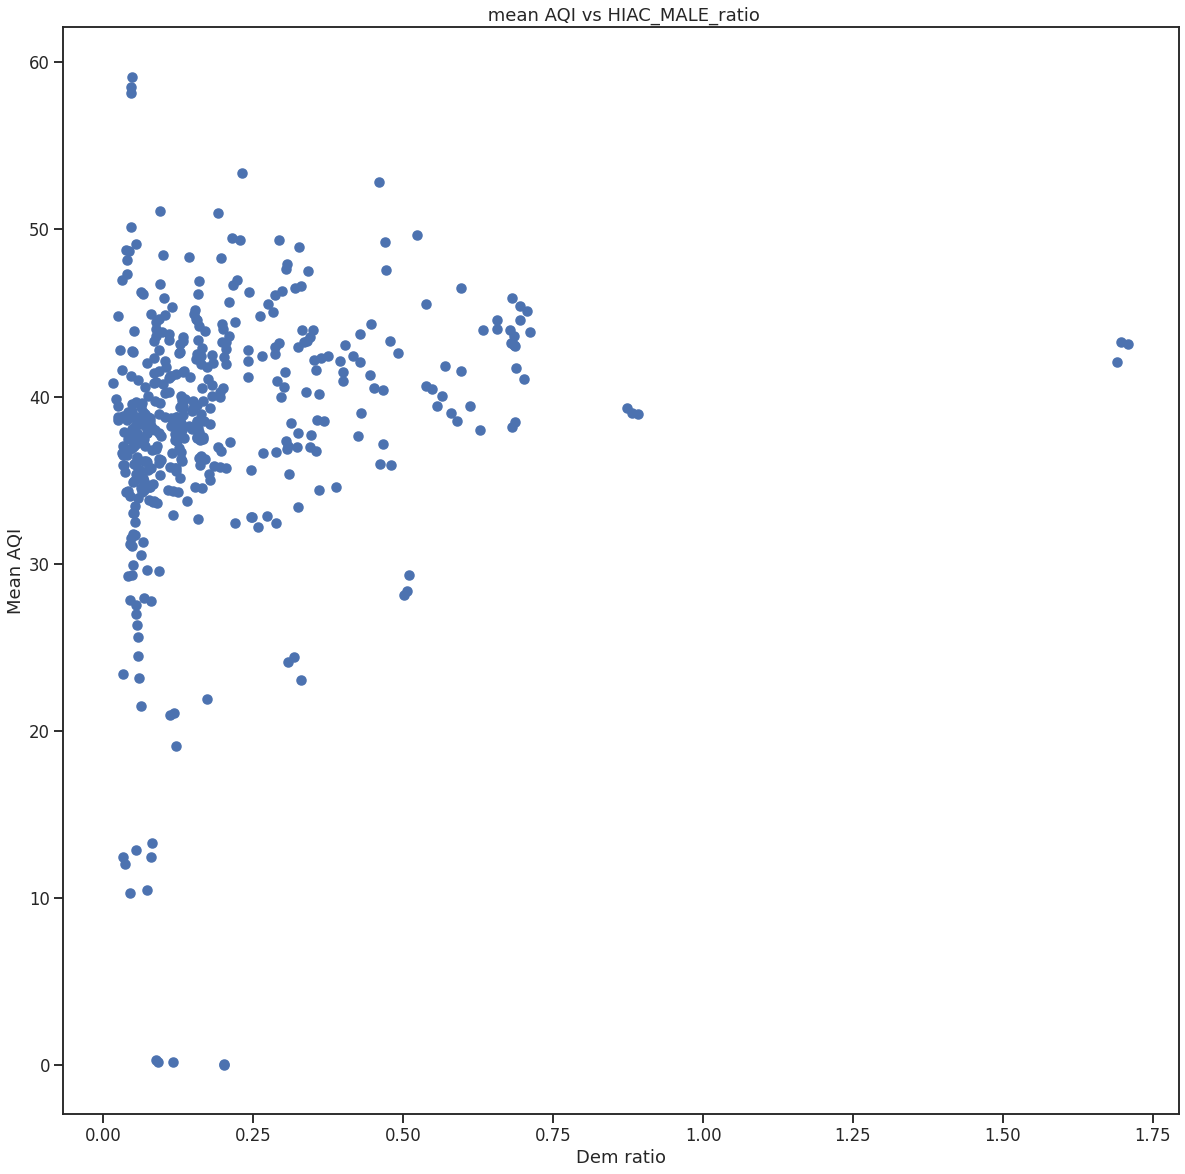

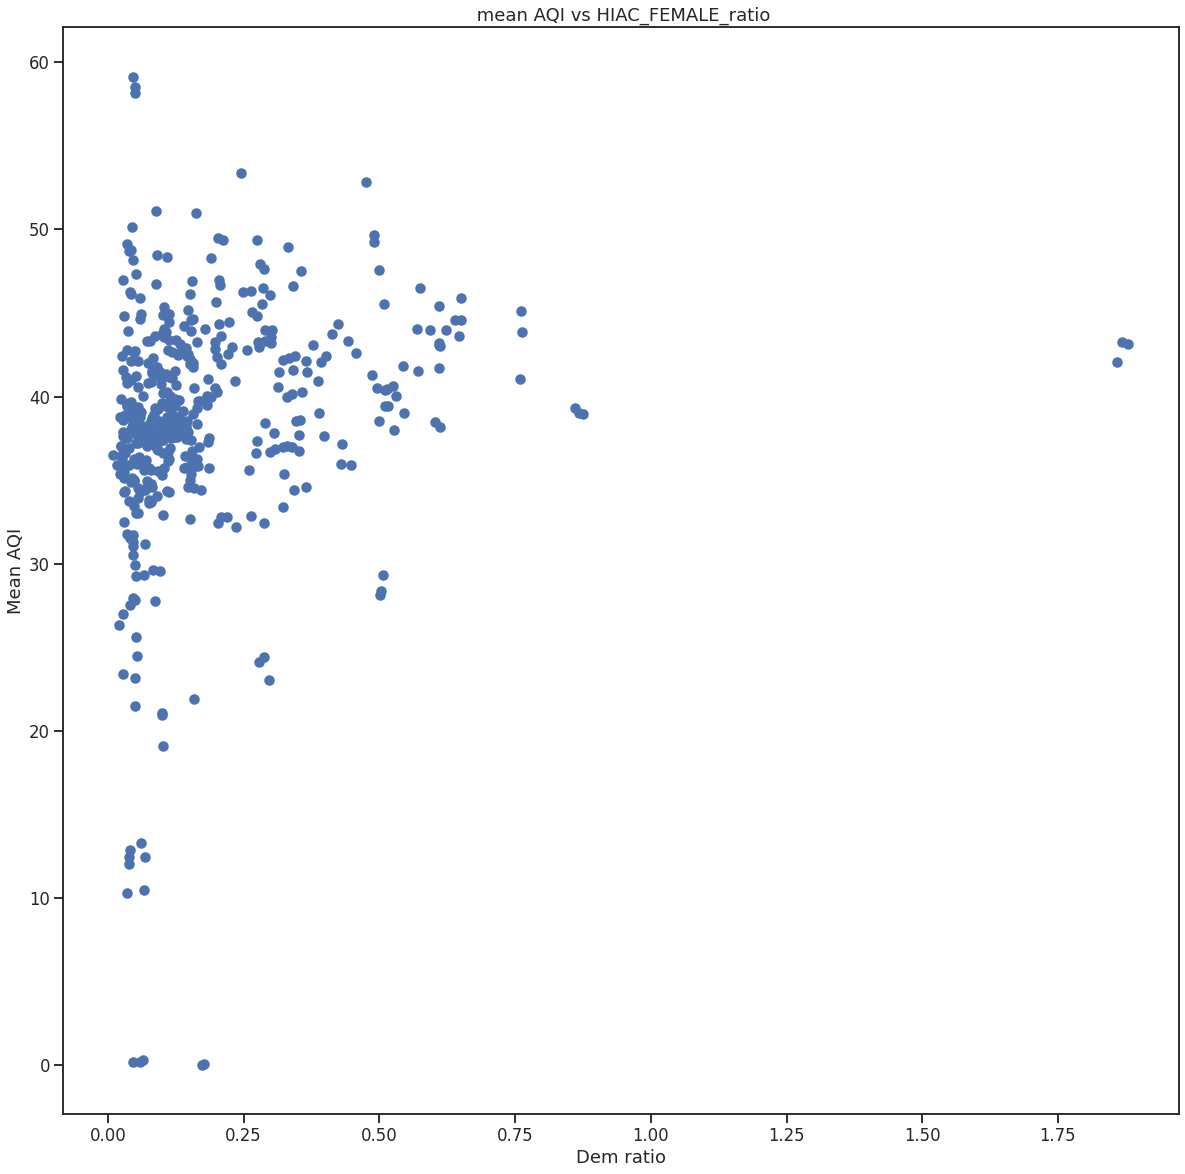

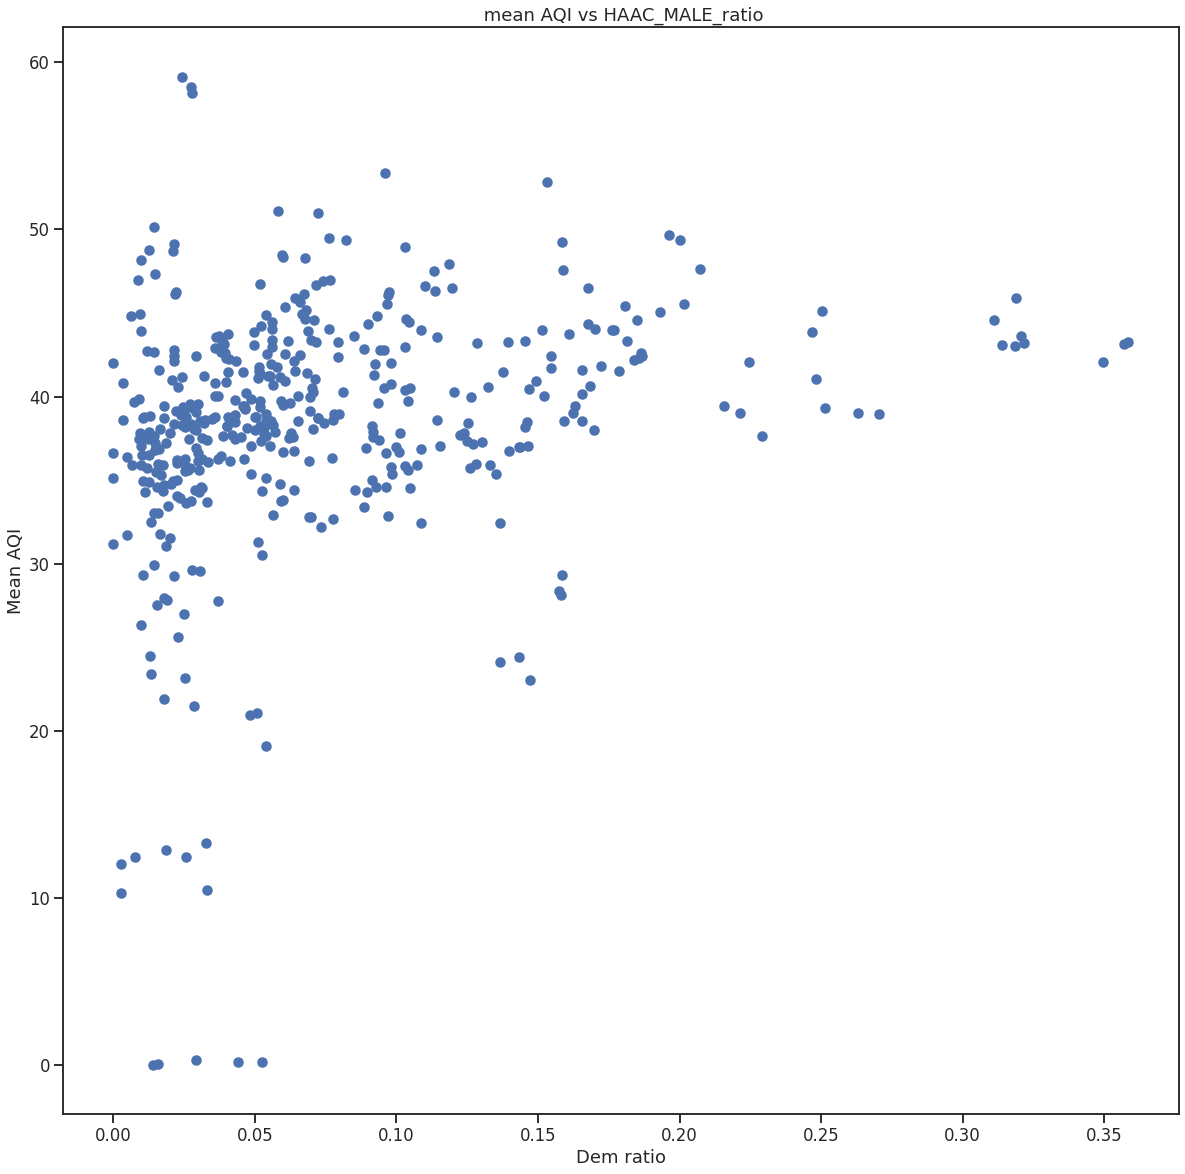

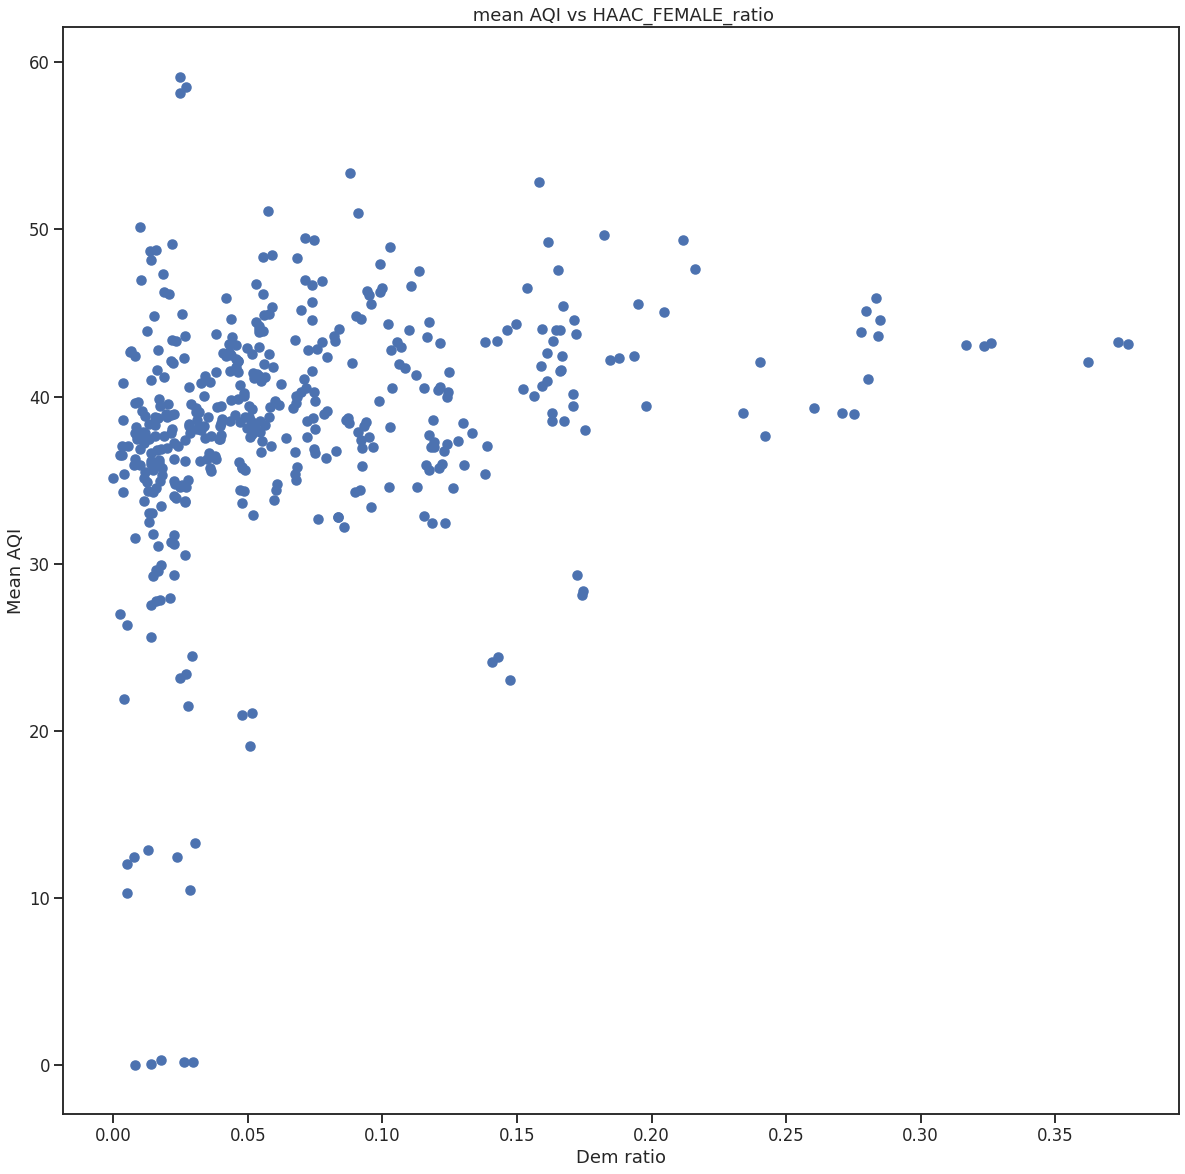

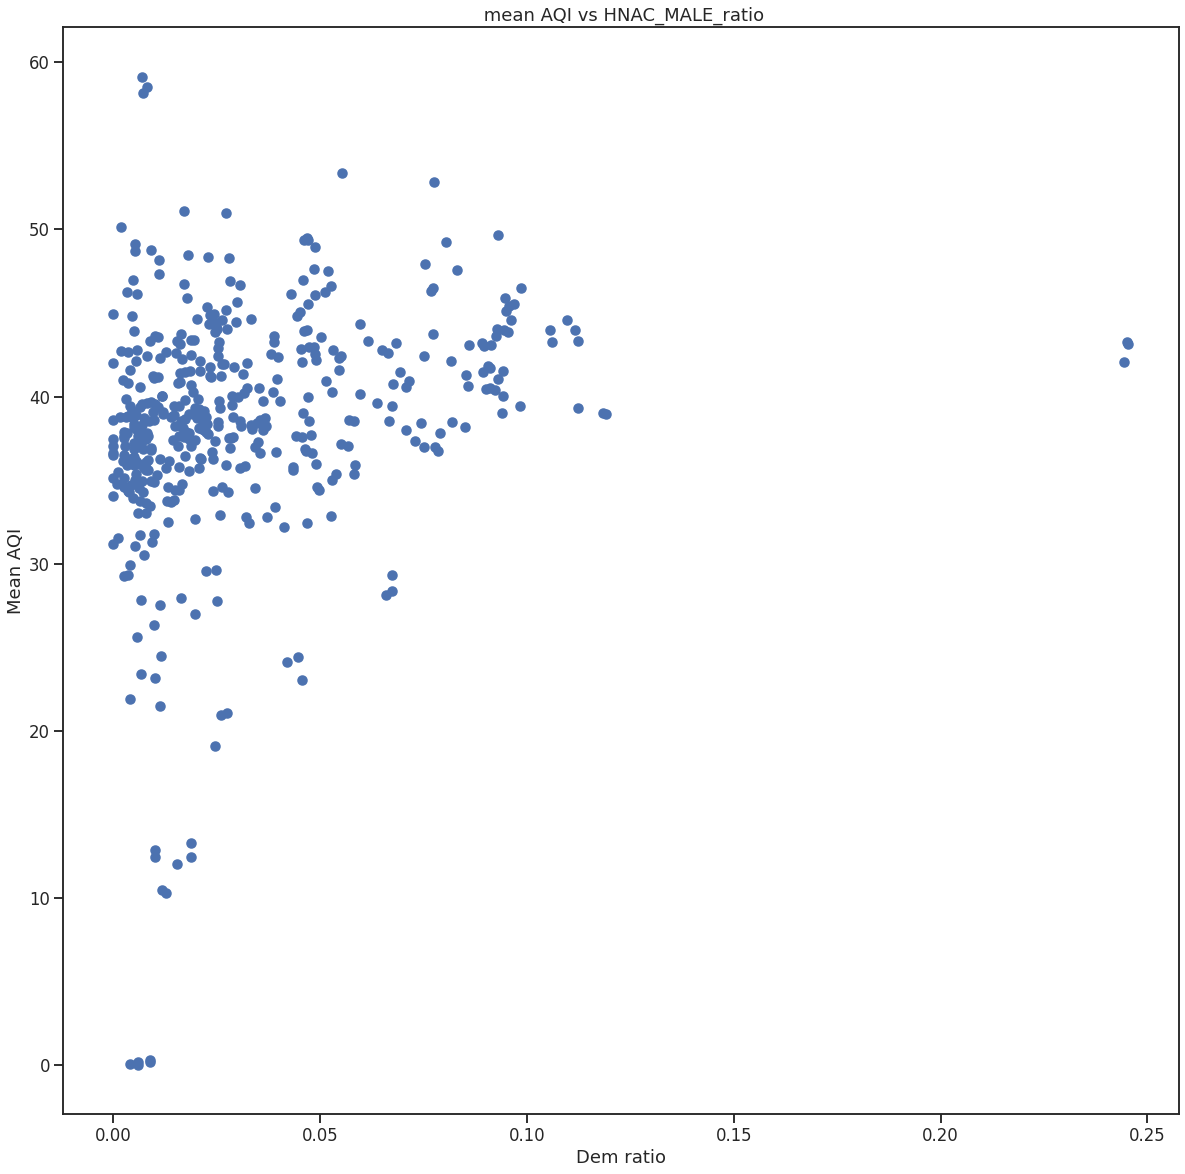

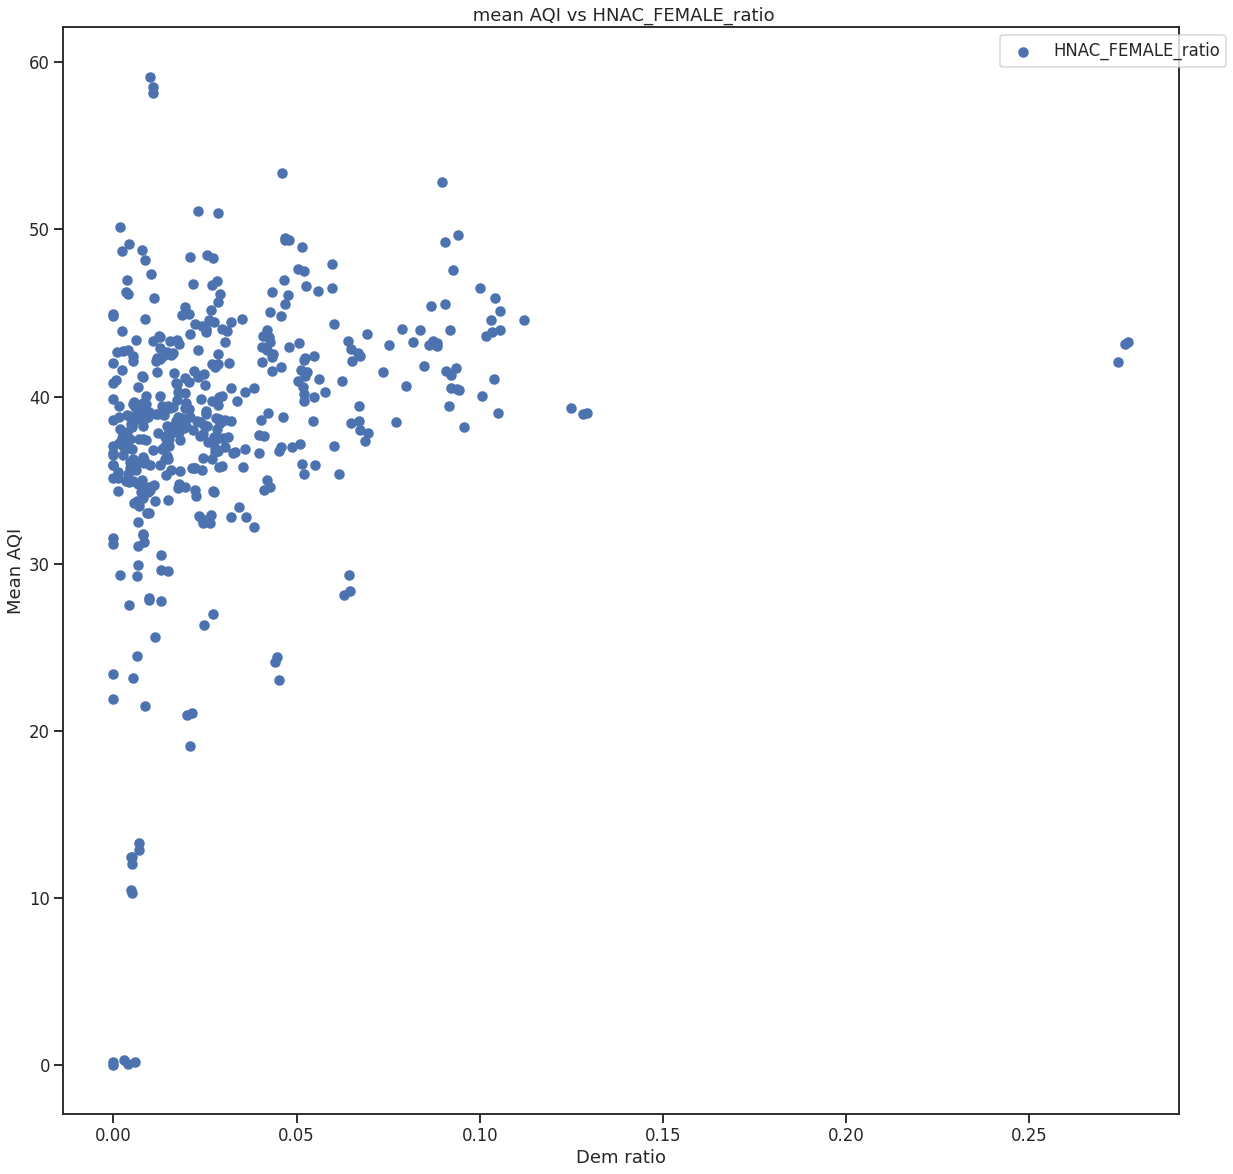

In [51]:
for dem in demographic:
    fig, ax = plt.subplots(figsize=(20,20))

    plt.title(' mean AQI vs ' + dem)
    plt.xlabel('Dem ratio')
    plt.ylabel('Mean AQI')
    ax.scatter(NE_avg_aqi_dem_2017_2019[dem], NE_avg_aqi_dem_2017_2019['AQI'], label=dem)

ax.legend(bbox_to_anchor=(1.05,1))
plt.show()

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

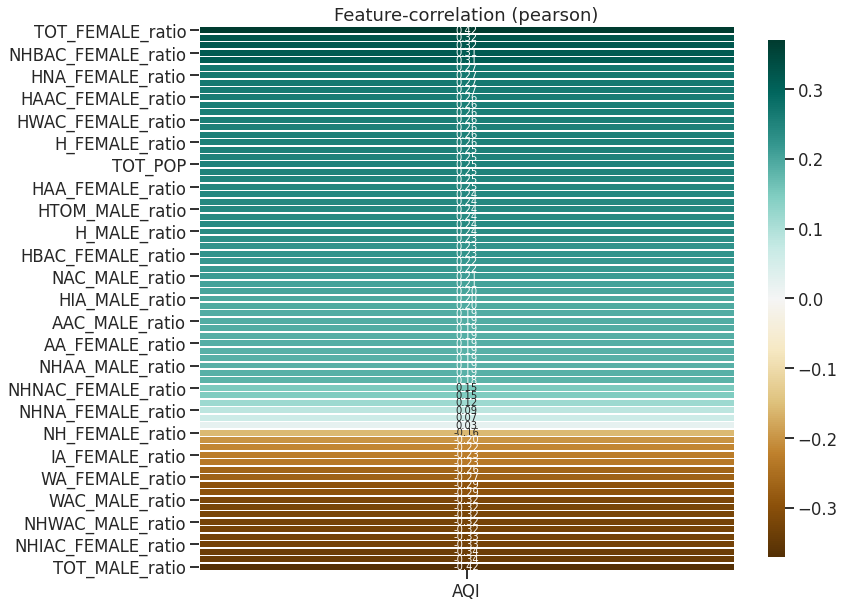

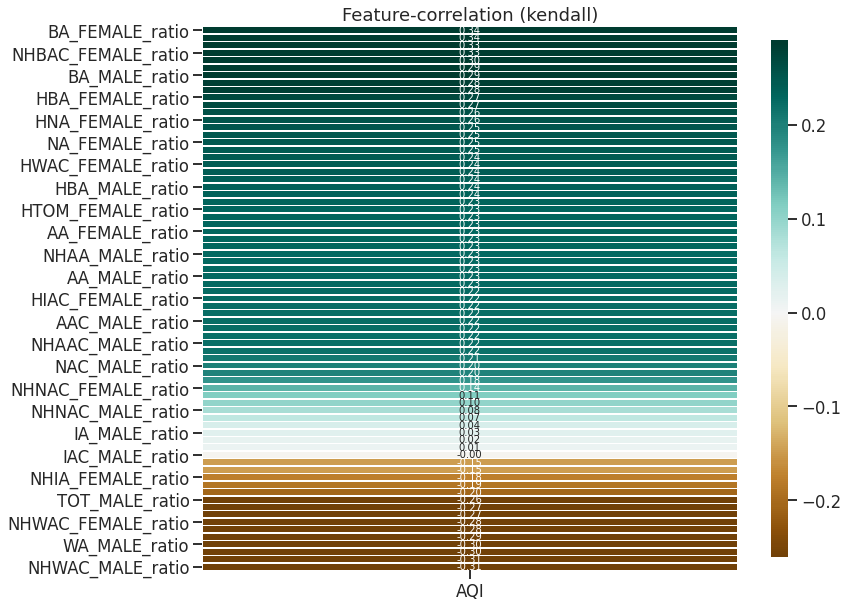

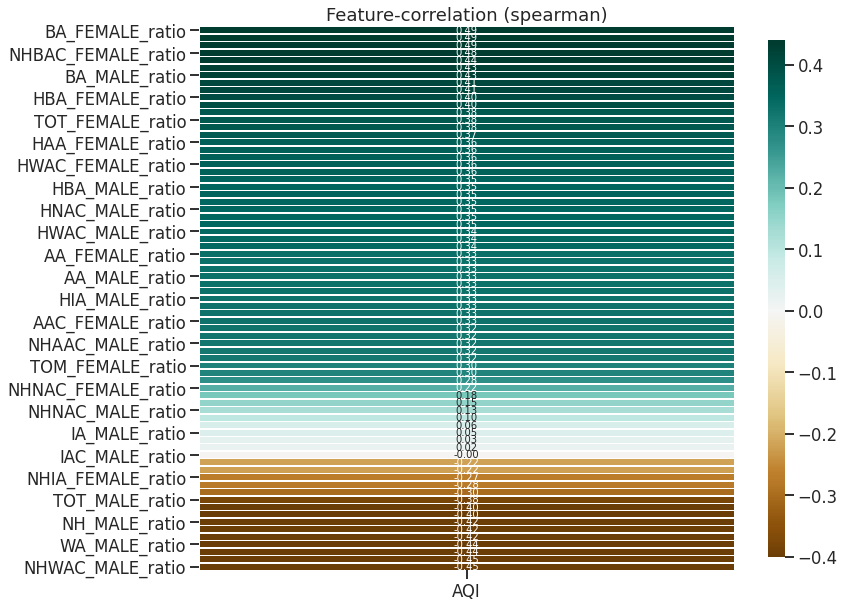

In [52]:
klib.corr_plot(NE_avg_aqi_dem_2017_2019, target='AQI', method='pearson')
klib.corr_plot(NE_avg_aqi_dem_2017_2019, target='AQI', method='kendall')
klib.corr_plot(NE_avg_aqi_dem_2017_2019, target='AQI', method='spearman')

In [53]:
NE_avg_aqi_dem_2017_2019.shape

(447, 76)

# results

* From spearman it is shown that black females have a .49 correlation with AQI positive
* whereas white males show negative AQI correlation; meaning higher white males; have cleaner air -.47
* these strenghts are moderate but not particularly strong

* it seems that including more reocrd data from other years it has reduced r value of correclation for spearman
* another note are BA_FEMALE are more prominent features in other correlation distributions with added recorded data of
2017 to 2019; compared to just singling out one year from previous data wrangling test

* debate about deciding to tackle a particular pollutant
* also debate to add more features to look at the target
* also need to look at more counties as when averaging aqis and grouping by counties we only get 389 records; even with 3 years added on

* maybe with demographic; a specific pollutant we want to be looking for